In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [3]:
T_data = [c.baryon_temp for c in clusters]

In [4]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-30, high=-10, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-21.91222696,  -9.94484954],
       [-12.0821469 ,  -3.58113942],
       [-12.31703457,  -4.69233715],
       [-12.78165714,  -2.84251206],
       [-28.77458629,  -4.02187345],
       [-27.83643892,  -2.65109067],
       [-11.4582667 ,  -8.9172002 ],
       [-22.50300884,  -1.16536765],
       [-26.8247864 ,  -6.19985861],
       [-11.11905829,  -3.80085132]])

In [11]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters])

In [12]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-21.91222696  -9.94484954]
[-12.0821469   -3.58113942]
[-12.31703457  -4.69233715]
[-12.78165714  -2.84251206]
[-28.77458629  -4.02187345]
[-27.83643892  -2.65109067]
[-11.4582667  -8.9172002]
[-22.50300884  -1.16536765]
[-26.8247864   -6.19985861]
[-11.11905829  -3.80085132]


You must install the tqdm library to use progress indicators with emcee


[-18.8880226  -4.7900598]
[-15.27526979  -4.30324443]
[-6.97801463 -2.91630532]
[-14.36746388  -8.40275174]
[-26.39492497  -2.6694195 ]
[-22.67532615  -0.99258769]
[-12.13796239  -5.24429644]
[-6.74332454 -0.91666254]
[-26.39020845  -2.6306829 ]
[-10.76069596  -5.65741482]
[-19.44820401  -9.44122016]
[-18.33088615  -4.95042207]
[-15.95748464  -1.22247058]
[-24.15041365  -1.1913655 ]
[-26.72240975  -5.35904225]
[-19.44904616  -9.44821249]
[-22.61705429  -1.44349451]
[-28.70802153  -4.0652461 ]
[-23.90388785  -1.69344173]
[-1.74277324 -7.15059297]
[-18.19697064  -5.48296717]
[-2.01950079 -0.75988393]
[-25.84055076  -2.42348443]
[-14.12633202  -9.49166489]
[-25.91086007  -5.88783638]
[-4.61476747 -1.37993714]
[-23.84413499  -1.28044266]
[-24.72335489  -5.33122661]
[-20.40010924  -3.27391334]
[-15.66614234  -2.5381261 ]
[-17.41701273  -7.58392478]
[-19.35671802  -9.42921734]
[-17.30685427  -7.61350316]
[-14.75098956  -6.67081067]
[-20.84106271  -2.83177595]
[-27.41268708  -4.50204922]
[-15

[-19.31839028  -2.99775253]
[-19.30721736  -0.77109327]
[-8.65465627 -0.05097343]
[-19.7597549   -6.29218864]
[-19.69887047  -5.80813647]
[-19.7628322   -4.39452611]
[-19.71390247  -2.75340176]
[-19.72330754  -3.82953101]
[-19.64609543  -5.38855677]
[-19.83550288  -6.19079977]
[-19.78836886  -5.99335345]
[-19.76792481  -6.79332026]
[-20.02128397  -6.4134389 ]
[-20.33065785  -6.76096353]
[-19.7730183   -5.03226914]
[-19.75930341  -4.17359193]
[-16.56513802  -3.90737164]
[-19.75140839  -7.08504192]
[-25.0507975   -0.10767382]
[-19.67447606  -6.15501307]
[-19.75813854  -4.60316245]
[-19.84648777  -4.81914107]
[-19.76140338  -2.15257049]
[-19.83802212  -4.35208296]
[-19.7514309  -4.9723071]
[-6.27049138 -0.04466099]
[-19.74491261  -9.48049569]
[-19.66562176  -7.75179861]
[-22.50008658  -5.52940836]
[-19.70900766  -3.74303106]
[-18.76427793  -0.29938994]
[-19.71230786  -4.78710911]
[-11.07036686  -0.79462534]
[-19.78925693  -4.73730566]
[-19.82203303  -7.56391588]
[-19.51343379  -4.72503386

[-9.42081812 -1.19774582]
[-19.76029486  -7.74576547]
[-19.75914433  -5.87711768]
[-18.81897175  -0.34139499]
[-22.22572414  -9.03316193]
[-19.75414307  -3.30612396]
[-28.67276313  -8.2282081 ]
[-19.76170062  -3.44656176]
[-20.37286744  -5.79908993]
[-19.75403827  -2.52261595]
[-12.10995853  -1.51780994]
[-19.75935388  -6.21746097]
[-19.75641731  -3.06049644]
[-19.75673501  -6.66656389]
[-19.76135411  -4.68860712]
[-19.76233577  -2.69660343]
[-19.74453128  -5.86575388]
[-19.75490778  -3.78761103]
[-19.76222316  -2.9251169 ]
[-19.75555838  -2.77722882]
[-19.70502573  -3.27339678]
[-19.75876667  -6.14270504]
[-19.76161463  -4.15996367]
[-19.75867094  -5.59844627]
[-19.75604467  -6.8445663 ]
[-19.75266047  -2.32873779]
[-12.12656209  -2.69430354]
[-19.7609583   -4.61689675]
[-20.37364286  -9.02286143]
[-19.67775592  -1.41121349]
[-19.75875505  -6.07665863]
[-19.76438673  -3.06004861]
[-19.75208439  -1.59369258]
[-15.7621051   -4.83197927]
[-21.13474068  -6.69162907]
[-19.75959733  -4.2416

In [13]:
n_steps=10000
sampler.run_mcmc(state, n_steps, progress=True)

You must install the tqdm library to use progress indicators with emcee


[-19.7586893   -7.32632502]
[-19.74853991  -2.42097442]
[-19.75606222  -3.74475598]
[-18.85476372  -0.23915176]
[-19.76060312  -2.11844465]
[-19.67543269  -1.23091685]
[-11.95816228  -1.60607518]
[-19.75651839  -3.09134525]
[-19.75897471  -5.0494662 ]
[-19.8455373   -1.33044882]
[-10.14698015  -1.48493845]
[-19.76588499  -9.8086964 ]
[-19.75714584  -3.59153471]
[-19.75115917  -3.68690135]
[-19.75462326  -6.57490786]
[-19.75178525  -1.3383399 ]
[-19.75046404  -0.28880749]
[-14.83645041  -0.12220338]
[-19.76110058  -6.7441512 ]
[-19.75519494  -6.68055478]
[-19.75118705  -1.07318442]
[-9.40308678 -0.90531075]
[-19.14115133  -1.23994972]
[-19.76590641  -9.76696936]
[-27.72795765  -4.89168581]
[-19.98295081  -2.96949729]
[-19.74532386  -3.40995912]
[-23.63814944  -8.66827316]
[-19.75469709  -1.98898461]
[-19.71930255  -4.27535042]
[-19.75970355  -5.61595753]
[-19.74831271  -2.90072572]
[-19.80395181  -3.35469557]
[-19.76187008  -7.31557956]
[-19.62433075  -0.64206593]
[-19.76202388  -5.0680

[-19.7810675   -7.49970687]
[-19.70256731  -1.43257864]
[-19.71090169  -3.37859226]
[-9.90561463 -0.39876478]
[-19.75608728  -2.09004008]
[-19.7452724   -2.40145195]
[-19.70419156  -1.29390679]
[-19.75468679  -6.07564027]
[-19.71828838  -1.60900173]
[-19.7455975  -1.9653385]
[-19.74718297  -5.10082618]
[-19.76493667  -2.2597828 ]
[-19.47153578  -0.92054481]
[-10.55805583  -1.96483707]
[-19.77813908  -3.13160071]
[-24.94605223  -1.70806054]
[-19.75421863  -5.93161251]
[-19.67254837  -0.98151039]
[-19.74911211  -5.238261  ]
[-19.77331513  -2.36389466]
[-19.60260555  -0.34899493]
[-8.97014648 -0.28438823]
[-19.73193909  -2.09482785]
[-19.70332024  -1.46946503]
[-19.7557398   -6.63144793]
[-19.72832709  -4.24472818]
[-22.19860277  -2.26590233]
[-19.69785473  -1.32249303]
[-15.48099544  -1.35742759]
[-19.3326278   -1.44094771]
[-24.98226384  -1.71128749]
[-19.69742943  -1.31943947]
[-19.74356342  -2.20126359]
[-19.69773415  -2.53462073]
[-19.74361912  -1.0551554 ]
[-19.73318206  -4.10338315

[-19.75940091  -5.81121282]
[-9.40089869 -0.34570263]
[-19.70397245  -2.43875714]
[-19.73176416  -1.67978124]
[-19.73470452  -1.74124619]
[-19.68643067  -2.36514165]
[-16.40150298  -0.77558294]
[-19.772347    -8.80678726]
[-14.76289657  -0.12152158]
[-13.15870635  -3.69668759]
[-19.68755751  -1.20591906]
[-19.70164095  -1.4749739 ]
[-19.72276582  -3.19237662]
[-19.80111937  -8.94316045]
[-19.57913121  -0.79642908]
[-19.70791858  -2.79721166]
[-19.75374954  -5.43390675]
[-19.67164757  -1.16575128]
[-19.58313377  -0.81162102]
[-20.42505727  -2.04298859]
[-12.9105259   -3.57459667]
[-20.21680611  -1.81952568]
[-29.81729134  -2.5148968 ]
[-20.41305088  -2.36078921]
[-7.68769055 -0.23989937]
[-19.73510838  -5.3480086 ]
[-19.12652714  -0.4998573 ]
[-19.70944464  -2.2457401 ]
[-16.23757305  -4.08179342]
[-19.64389945  -0.98527169]
[-19.36312026  -0.82534306]
[-19.68370058  -1.1433467 ]
[-19.66448398  -1.26698495]
[-19.67223903  -1.06625801]
[-19.69093654  -1.19901401]
[-19.75165957  -1.670408

[-19.57387333  -0.82743291]
[-19.49170841  -0.68110349]
[-19.4722584   -0.67069169]
[-19.46711232  -0.74349494]
[-19.6070808   -0.84963801]
[-19.61757917  -6.11448561]
[-19.61535808  -0.94610299]
[-11.46508434  -0.3563452 ]
[-19.57584174  -0.83407344]
[-19.78487443  -1.27235609]
[-24.24374511  -1.01647661]
[-15.58171303  -0.5737163 ]
[-18.70983665  -0.08811959]
[-19.36482638  -0.46392681]
[-19.79686738  -8.52060801]
[-19.44262177  -0.63736731]
[-19.57120854  -0.81844314]
[-19.80952294  -0.98186722]
[-11.74503767  -0.39055941]
[-19.57365356  -3.55058758]
[-19.59600955  -0.89015607]
[-19.28678622  -0.32987204]
[-11.4729872   -0.31727387]
[-19.60435973  -0.9143009 ]
[-18.64756697  -0.04621949]
[-19.42211635  -0.60357361]
[-16.37317903  -0.61496143]
[-16.76042514  -0.66476792]
[-23.53767177  -0.86467906]
[-19.44704501  -0.63134569]
[-19.59041195  -0.87893671]
[-19.25830652  -0.14700874]
[-19.63390055  -5.26487796]
[-19.55061103  -0.75030355]
[-19.48863168  -0.67659539]
[-19.92532093  -1.00

[-20.5458496   -4.21480369]
[-18.7691037   -0.11819546]
[-18.4763924   -0.07694263]
[-18.59875578  -0.10780628]
[-14.08948383  -5.22488036]
[-18.78953573  -0.14865963]
[-22.19916155  -0.76587536]
[-18.56485892  -0.23546019]
[-19.50885551  -1.64452327]
[-18.28754958  -0.0620835 ]
[-8.28106266 -0.04772368]
[-18.57538107  -0.11182314]
[-18.58562828  -0.10449514]
[-19.19266941  -1.06398035]
[-19.56008496  -4.02369175]
[-22.88926749  -0.30177515]
[-19.30897537  -1.31013593]
[-18.12349202  -0.03075746]
[-19.91458808  -9.55815131]
[-18.58752398  -0.03357642]
[-19.54213351  -3.61132366]
[-19.62203592  -1.63088233]
[-18.83862145  -1.92213599]
[-19.13529201  -0.3571319 ]
[-18.15249432  -0.03572067]
[-18.72038837  -0.12110203]
[-19.83146481  -0.95597091]
[-18.50157654  -0.08271038]
[-20.42197216  -3.62907499]
[-18.61177778  -0.10866751]
[-19.60182817  -4.98258722]
[-18.87512912  -0.31906776]
[-18.83533171  -0.18870819]
[-18.84583131  -3.78333544]
[-7.31553869 -0.36224924]
[-18.95697733  -0.163920

[-19.75316821  -8.94090631]
[-18.26090935  -0.05394388]
[-20.65615618  -3.59059414]
[-18.17055797  -0.03403974]
[-18.1196452   -0.05381644]
[-18.30678875  -0.06331101]
[-19.36432843  -0.62316354]
[-0.670216   -0.02782836]
[-18.63623637  -0.6117272 ]
[-18.95317157  -0.43867231]
[-18.12069444  -0.05306017]
[-20.26718214  -2.96482879]
[-20.22971489  -0.02789028]
[-19.00982578  -4.79490051]
[-18.24433924  -0.05270967]
[-19.42408287  -0.64955824]
[-18.85871815  -1.0465516 ]
[-19.74650647  -2.21470958]
[-16.48867084  -0.02787844]
[-19.0139106   -4.91608946]
[-18.25395523  -0.05292641]
[-18.20855056  -0.07813124]
[-18.19456554  -0.04595222]
[-18.98920786  -0.43770285]
[-18.1333282   -0.03076165]
[-20.23512184  -2.86548525]
[-18.60302646  -0.24920183]
[-18.46539653  -0.21907963]
[-18.14215528  -0.05099519]
[-19.06340693  -1.33898427]
[-18.92753835  -4.22903206]
[-20.20918145  -1.00411855]
[-18.11752109  -0.03012904]
[-18.18745636  -0.06131467]
[-18.62762032  -0.67872341]
[-18.69830412  -0.7060

[-20.18565668  -2.75275848]
[-18.10138576  -0.03144097]
[-19.15654471  -0.5314265 ]
[-18.08351785  -0.02972768]
[-18.13443919  -0.03360239]
[-18.87408223  -4.46243113]
[-18.89630991  -0.41531977]
[-18.07225855  -0.02872788]
[-20.40493166  -3.07438238]
[-18.03708203  -0.02797829]
[-11.01450275  -0.0279261 ]
[-18.09114228  -0.03048683]
[-17.95236942  -0.02798599]
[-18.17862137  -0.02849233]
[-10.05539198  -0.02774738]
[-18.24863705  -0.03576801]
[-18.70565839  -0.34698909]
[-19.74954524  -5.28287552]
[-18.04573278  -0.02876236]
[-18.43324213  -0.02877203]
[-18.08607967  -0.0290224 ]
[-21.25002659  -4.19857686]
[-22.47496453  -0.03429971]
[-25.66710752  -1.07810832]
[-20.24329609  -1.02649551]
[-18.07888167  -0.02871192]
[-17.887324    -0.02816533]
[-19.7455241   -1.22283216]
[-18.06587077  -0.02815072]
[-18.02591594  -0.02774581]
[-18.1818334   -0.03212118]
[-24.93948054  -3.3865911 ]
[-18.09855713  -0.03182588]
[-19.97300363  -0.69500729]
[-18.07294244  -0.02845575]
[-18.02959569  -0.02

[-18.07040411  -0.02875682]
[-14.77751432  -0.34428598]
[-18.00992187  -0.02963448]
[-18.44498982  -0.54173701]
[-19.75072818  -6.4772592 ]
[-18.19451772  -0.09915054]
[-18.05256475  -0.02781284]
[-22.69146752  -2.80985726]
[-14.96154125  -0.0280322 ]
[-17.73155635  -0.02871779]
[-19.38185684  -1.73913786]
[-18.05762551  -0.02849676]
[-18.00605504  -0.02923652]
[-19.21872175  -0.0276735 ]
[-15.41656089  -0.02845114]
[-18.3653214   -0.43933104]
[-18.02967689  -0.02846734]
[-19.97875589  -9.53689412]
[-20.08609384  -0.86912556]
[-18.01447914  -0.02924943]
[-18.05455575  -0.02768931]
[-18.83920223  -1.05661149]
[-18.02754061  -0.02854242]
[-19.71260868  -7.43782723]
[-19.69916321  -2.15385444]
[-3.64195105 -0.02771871]
[-18.00831268  -0.02883978]
[-18.06196416  -0.02818833]
[-19.35028839  -1.69796667]
[-18.03799741  -0.02871667]
[-18.03038785  -0.0284525 ]
[-19.75546368  -0.72997517]
[-18.37232162  -1.68139348]
[-18.6267942   -0.80661271]
[-20.04595527  -3.75081482]
[-18.09827849  -0.2873

[-18.22287623  -0.02807335]
[-20.51002939  -3.18041421]
[-17.93432759  -0.02908575]
[-18.00324099  -0.02866351]
[-21.37902264  -0.78311779]
[-18.05986867  -0.02778096]
[-18.05895664  -0.02805829]
[-18.0637329   -0.03845809]
[-18.01761264  -0.02792466]
[-18.77526639  -3.75921075]
[-18.59722746  -0.7250076 ]
[-18.06429579  -0.02774746]
[-21.05458482  -3.91239731]
[-19.38023585  -6.78550032]
[-19.44652886  -0.60224874]
[-18.01820133  -0.02784189]
[-20.70725768  -3.4273661 ]
[-17.27895874  -0.028548  ]
[-18.01681718  -0.02861852]
[-16.91179425  -0.35400029]
[-18.58873608  -0.25747621]
[-18.05142833  -0.02815838]
[-19.96152482  -2.47731453]
[-19.48423893  -7.24818538]
[-18.04086254  -0.02849579]
[-18.75258201  -0.32333078]
[-17.926015    -0.02946035]
[-18.80293526  -0.98730544]
[-17.98922214  -0.02838065]
[-15.67651532  -0.02808157]
[-18.91897089  -1.18425895]
[-18.01770483  -0.02791169]
[-18.03097851  -0.02821058]
[-20.14412063  -0.88212053]
[-20.79934733  -3.52197257]
[-19.8459772   -9.02

[-18.03645275  -0.02803744]
[-20.51789042  -3.18427274]
[-17.96865007  -0.02784161]
[-17.54727864  -0.02784139]
[-18.05913382  -0.02890579]
[-19.68558922  -7.16636898]
[-19.74761457  -3.6595098 ]
[-18.30772468  -0.02784179]
[-18.06248375  -0.02898772]
[-18.081366   -0.4618653]
[-18.59867831  -0.34451607]
[-17.55517681  -0.02784722]
[-19.79607473  -8.37786037]
[-18.53412326  -0.66477229]
[-19.07932205  -1.38894046]
[-18.04927025  -0.02782402]
[-17.38648629  -0.02772265]
[-18.91028914  -0.38758191]
[-17.97520247  -0.02784018]
[-18.28394976  -0.34241929]
[-19.87012995  -9.9272933 ]
[-17.94086234  -0.02836153]
[-17.96815374  -0.02773473]
[-18.5391143   -0.02780101]
[-17.99195697  -0.02808073]
[-19.12855726  -0.47283347]
[-19.63441124  -6.95824318]
[-18.01977358  -0.02792786]
[-19.9521556   -2.46916512]
[-17.36676978  -0.02789855]
[-18.09510109  -0.02890085]
[-18.92372266  -0.39881993]
[-17.81293661  -0.02783512]
[-19.85180251  -9.54383426]
[-17.99398297  -0.02806959]
[-21.0280802   -3.8631

[-17.9212147   -0.02777187]
[-20.48186892  -7.13164541]
[-18.02834532  -0.02794121]
[-21.09171304  -3.9937505 ]
[-17.974549    -0.02801387]
[-19.98713031  -0.80461952]
[-17.91906468  -0.02806234]
[-17.96365525  -0.02776323]
[-18.32130236  -0.15081219]
[-18.02500012  -0.02841428]
[-19.86815225  -5.39208984]
[-17.99825075  -0.02825213]
[-19.29363798  -1.67606358]
[-17.90603278  -0.02767722]
[-18.02962803  -0.02792607]
[-20.10770496  -0.86724957]
[-17.97491617  -0.02776117]
[-17.81945511  -0.02775045]
[-19.31388665  -3.79354438]
[-19.07916945  -0.45344716]
[-17.97533697  -0.0277614 ]
[-19.74332994  -3.27825993]
[-18.03472067  -0.0277938 ]
[-18.58913845  -0.2550209 ]
[-17.98187543  -0.02815287]
[-18.13405256  -0.02781299]
[-19.95552891  -5.62212985]
[-18.04513962  -0.02786472]
[-19.91353088  -0.79064918]
[-20.26561734  -2.90397171]
[-18.01418131  -0.02773919]
[-18.02169587  -0.0286252 ]
[-17.98771936  -0.02850275]
[-18.454249    -0.57297676]
[-18.01881938  -0.02828605]
[-18.9219415   -2.65

[-18.31442191  -0.35267487]
[-18.01478133  -0.02781444]
[-18.1101163   -0.13343337]
[-18.41637413  -0.50292741]
[-20.56598642  -2.91963312]
[-18.68589445  -0.28471731]
[-18.32625574  -0.38873093]
[-18.35420084  -0.41255014]
[-19.08125721  -0.43923277]
[-18.02325851  -0.02828121]
[-18.6613507   -3.05360412]
[-20.82041922  -3.19180999]
[-18.03662276  -0.02863229]
[-18.0068952   -0.02809856]
[-19.84032456  -8.38743012]
[-18.00305945  -0.02786768]
[-19.41176865  -0.56424924]
[-18.06868134  -0.08001027]
[-18.81652458  -3.7552071 ]
[-21.23895872  -3.69798495]
[-18.00729482  -0.02781403]
[-20.0219273   -9.23271361]
[-18.0214895  -0.028245 ]
[-18.00222111  -0.02829126]
[-18.36106399  -1.5998289 ]
[-17.99851846  -0.02781354]
[-18.00121649  -0.02782995]
[-18.02203549  -0.02795895]
[-18.20261101  -0.24825094]
[-19.74418039  -3.70579314]
[-19.0326797   -0.41826325]
[-18.01983189  -0.02819467]
[-18.00183448  -0.02811373]
[-19.71311794  -1.9528116 ]
[-17.99501712  -0.02784376]
[-19.68412647  -0.6699

[-18.0133167   -0.02811657]
[-19.74659641  -4.92036507]
[-18.08093666  -0.03040838]
[-18.04595223  -0.02778538]
[-19.50195023  -0.59843231]
[-19.74052744  -1.86939796]
[-18.91815595  -3.99769754]
[-18.77804643  -0.31541973]
[-17.99921191  -0.02779287]
[-18.62291357  -0.25364509]
[-18.03628768  -0.02782325]
[-18.01477357  -0.02780779]
[-18.06802878  -0.02824533]
[-18.09932014  -0.02794151]
[-19.75648316  -9.89058745]
[-20.49139408  -0.97598719]
[-18.06452115  -0.02819869]
[-17.96344621  -0.02776356]
[-19.40205074  -1.51142699]
[-18.00253712  -0.02792304]
[-18.44740044  -0.18449746]
[-18.09243346  -0.34973584]
[-18.6828968   -3.81118953]
[-20.35303259  -2.54227375]
[-18.03984452  -0.029071  ]
[-18.04406585  -0.02792668]
[-18.01605688  -0.02833904]
[-18.00822535  -0.02780309]
[-19.25165682  -0.50186259]
[-18.09004374  -0.02853807]
[-17.99561237  -0.02767964]
[-18.06206163  -0.02792334]
[-18.25851713  -0.26569894]
[-19.28198663  -0.17348953]
[-20.18651972  -2.35870401]
[-18.02193541  -0.02

[-18.55853517  -0.23418274]
[-20.92688707  -3.11456943]
[-18.05443139  -0.13858708]
[-17.90822223  -0.02808959]
[-19.29592388  -0.51944118]
[-17.98504305  -0.02789959]
[-20.99975167  -3.20617318]
[-17.9777608   -0.02843431]
[-18.03073633  -0.02822097]
[-19.41469849  -1.29692875]
[-18.02106564  -0.02833015]
[-18.03215677  -0.02792861]
[-17.92153957  -0.0281187 ]
[-18.00578367  -0.02833127]
[-17.9995897   -0.02838181]
[-20.46568568  -2.65027971]
[-17.88463116  -0.02835022]
[-17.97029838  -0.02845226]
[-19.59096255  -8.96903324]
[-19.29965424  -0.52183514]
[-18.8142797   -0.87098652]
[-17.88247541  -0.02810186]
[-19.75122283  -7.24613619]
[-18.03920947  -0.02818855]
[-20.47760162  -2.66389739]
[-17.98110044  -0.02836082]
[-17.99597139  -0.02848108]
[-19.3704987  -0.2861318]
[-17.9869662   -0.02827862]
[-19.93779169  -2.07071721]
[-18.12035325  -0.02767656]
[-20.280049    -9.34940974]
[-20.78023528  -1.07847292]
[-17.96195947  -0.02852285]
[-17.98741748  -0.02836756]
[-20.914942    -3.1013

[-18.02462217  -0.02774695]
[-18.09289071  -0.0280841 ]
[-18.49891232  -0.54197841]
[-18.02724711  -0.0283845 ]
[-19.74567473  -4.45702361]
[-18.11427127  -0.02818969]
[-18.02332903  -0.02882806]
[-18.01251734  -0.02870528]
[-17.91507438  -0.02992697]
[-20.10627066  -9.7246392 ]
[-19.44122586  -1.5540356 ]
[-18.0181535   -0.02793275]
[-18.05840761  -0.0277059 ]
[-18.0230938   -0.02772311]
[-18.08568365  -0.02800505]
[-17.97267018  -0.03014493]
[-18.02321419  -0.02828862]
[-18.04594359  -0.02800617]
[-19.82606236  -0.72886741]
[-18.05011927  -0.02796697]
[-18.15745515  -0.08009005]
[-18.03255669  -0.02829028]
[-18.02849294  -0.02835737]
[-18.07923273  -0.02799815]
[-18.0060572   -0.02852108]
[-19.32762671  -0.38797761]
[-18.02432539  -0.02779693]
[-18.01625365  -0.02844821]
[-18.02109438  -0.02813955]
[-19.58088529  -0.6291232 ]
[-18.04919324  -0.02785098]
[-18.10415644  -0.02793753]
[-18.4050808   -0.17678554]
[-20.08744508  -9.6269494 ]
[-18.04267809  -0.02842337]
[-18.19777545  -0.08

[-19.99719856  -0.79639019]
[-20.68403645  -2.96191794]
[-18.45708091  -0.20737842]
[-18.00154746  -0.02782756]
[-17.98876856  -0.02773571]
[-18.16938221  -0.02962853]
[-19.44916003  -0.84212986]
[-18.85737164  -0.97043928]
[-19.63222827  -0.65392195]
[-19.50005612  -1.65818137]
[-17.96895884  -0.02852047]
[-19.17207557  -5.70215448]
[-21.0511593   -3.42019325]
[-18.48410638  -2.44084019]
[-18.01900503  -0.02800252]
[-18.82973274  -0.3463952 ]
[-17.99007474  -0.02773374]
[-19.41112908  -6.89834926]
[-18.03294748  -0.02815918]
[-19.35138817  -0.1692764 ]
[-17.9556553   -0.02767404]
[-20.94430994  -3.21377308]
[-18.03180561  -0.02796297]
[-18.16078202  -0.029372  ]
[-17.9891929   -0.02798759]
[-19.66609126  -6.67761947]
[-20.01775743  -2.23853186]
[-17.94612037  -0.02834767]
[-18.0528939   -0.02828438]
[-18.89459219  -0.36321601]
[-18.02129769  -0.02801015]
[-18.56226692  -2.79429465]
[-18.75235014  -0.83932757]
[-18.02301068  -0.05245062]
[-18.08315009  -0.02871726]
[-17.93574294  -0.02

[-17.9872318   -0.02825584]
[-17.95834269  -0.02768799]
[-20.25161215  -2.1328668 ]
[-18.02518741  -0.02790422]
[-17.98364608  -0.0284537 ]
[-18.87976418  -0.3553851 ]
[-18.00022903  -0.03314059]
[-17.96913253  -0.02847185]
[-18.05300696  -0.02803763]
[-17.99121271  -0.02779432]
[-20.78121278  -2.67312214]
[-18.02111129  -0.02794198]
[-17.99594469  -0.02828347]
[-17.9792485   -0.02816144]
[-17.98233065  -0.0282403 ]
[-18.07173839  -0.0280938 ]
[-19.52934582  -0.60749458]
[-18.02013163  -0.0279517 ]
[-17.99436233  -0.02780987]
[-18.22542171  -0.10670452]
[-17.98638867  -0.02809512]
[-18.54178256  -0.23840283]
[-18.07616785  -0.02809154]
[-21.3386925   -3.21361691]
[-18.82088691  -0.34271525]
[-18.01872585  -0.02796566]
[-17.99133258  -0.02791826]
[-18.03698325  -0.02772661]
[-19.57195245  -7.5827634 ]
[-18.12655255  -0.02791418]
[-18.50696385  -0.50816461]
[-19.74804665  -4.88146995]
[-17.99454929  -0.02813576]
[-19.13907172  -0.45678357]
[-18.0270054  -0.0280186]
[-19.23782183  -1.1952

[-18.05583141  -0.02784554]
[-17.95122425  -0.02783494]
[-20.38590391  -0.78754616]
[-17.97243881  -0.02825498]
[-17.9883545   -0.02820716]
[-17.97166066  -0.02775767]
[-18.00114607  -0.02810144]
[-19.76699439  -9.0029647 ]
[-18.13839436  -0.05529603]
[-19.73808039  -0.88915046]
[-20.64452113  -0.86221034]
[-18.01947817  -0.02847383]
[-17.94452562  -0.02844204]
[-20.18733662  -2.08877486]
[-18.01021008  -0.02820712]
[-18.73210697  -0.25858241]
[-17.98501368  -0.02811721]
[-17.97766606  -0.02791937]
[-17.99110278  -0.02768914]
[-19.75116786  -6.13177397]
[-18.35486189  -0.31828566]
[-18.14490181  -0.14767462]
[-18.01262687  -0.02827263]
[-19.75990693  -9.63250119]
[-18.00643793  -0.02811322]
[-17.98787948  -0.02819437]
[-19.74406014  -3.28454159]
[-17.97832955  -0.02793723]
[-19.83241046  -0.61032654]
[-17.99160942  -0.02770315]
[-18.98540613  -0.33691014]
[-18.2191244   -1.28153116]
[-20.4550759  -2.3251435]
[-18.03539117  -0.02838901]
[-18.09755399  -0.02793804]
[-18.00295809  -0.0280

[-18.04911891  -0.02829303]
[-19.73010891  -7.64929969]
[-19.82404911  -1.74330911]
[-19.57120888  -0.5312428 ]
[-19.56985402  -1.50100184]
[-18.01765501  -0.02851123]
[-17.99061466  -0.02781912]
[-19.06889101  -0.36623992]
[-18.2468271  -0.0962059]
[-18.62395704  -0.21854321]
[-18.05477991  -0.02774874]
[-18.03931193  -0.02847109]
[-18.92700393  -0.89170877]
[-17.99364417  -0.02867774]
[-18.02824454  -0.02793576]
[-19.7794516   -8.11095963]
[-17.9902657   -0.02784198]
[-18.05195804  -0.02831671]
[-19.56277208  -0.52847146]
[-18.55795086  -2.50591418]
[-18.49715726  -2.24790725]
[-20.84246955  -2.69452916]
[-18.55541227  -0.19757088]
[-18.04176351  -0.02808186]
[-19.87272496  -9.45570808]
[-18.01466569  -0.02828383]
[-17.99293207  -0.02862609]
[-17.96355877  -0.02768013]
[-18.78667531  -0.75241562]
[-18.01072489  -0.0283132 ]
[-19.74299434  -1.66649466]
[-18.03601067  -0.02794934]
[-19.74517768  -0.5870484 ]
[-18.35128033  -1.43757655]
[-18.80956257  -3.50775594]
[-19.13683152  -1.0991

[-20.96895853  -2.82075729]
[-18.01022041  -0.02795126]
[-19.38794259  -0.46969094]
[-18.02864587  -0.02784872]
[-21.09720424  -2.94150724]
[-18.04507382  -0.02779254]
[-19.16789458  -0.39875424]
[-18.03774525  -0.02794644]
[-18.01661537  -0.02829297]
[-19.76631884  -7.61322965]
[-18.19550143  -0.2094043 ]
[-18.02923799  -0.02793817]
[-18.0289767   -0.02794798]
[-18.019093    -0.02816991]
[-19.32198704  -5.67481604]
[-19.21916138  -0.41567799]
[-17.99531349  -0.0279398 ]
[-19.36375736  -1.30398093]
[-18.36040076  -0.13601927]
[-18.66074319  -2.78572662]
[-20.50129386  -2.38715349]
[-18.04725311  -0.02794477]
[-18.03622193  -0.02783285]
[-19.33828123  -1.71598334]
[-18.00943341  -0.02824714]
[-18.44584675  -0.42627403]
[-19.23702371  -1.18274914]
[-18.02162296  -0.02781059]
[-19.04815334  -0.35898101]
[-17.9663019   -0.02793702]
[-18.03767627  -0.02782905]
[-18.02326835  -0.0279613 ]
[-19.10052045  -4.7187416 ]
[-18.03552935  -0.02784002]
[-19.14004784  -4.86899648]
[-18.03336748  -0.02

[-19.71260796  -1.63724338]
[-18.04328419  -0.02848107]
[-18.02732157  -0.02792141]
[-18.19932652  -0.08445885]
[-17.96974511  -0.02791396]
[-18.0259292  -0.0279518]
[-20.02982605  -0.67399489]
[-19.70066502  -1.56837805]
[-18.04910771  -0.02865867]
[-18.02742737  -0.02792936]
[-17.97996269  -0.02792371]
[-19.01584595  -4.83790616]
[-18.00774605  -0.02782374]
[-19.37845752  -0.75720488]
[-18.01225975  -0.03907323]
[-18.02479247  -0.02771869]
[-20.93466005  -2.80310813]
[-18.03578525  -0.02783926]
[-17.98210246  -0.02791601]
[-18.70101621  -0.24436203]
[-18.23608804  -0.21187615]
[-18.07469658  -0.02877119]
[-17.99896355  -0.02785534]
[-19.99631371  -1.90444095]
[-18.04879302  -0.02769903]
[-18.5196534   -0.19655473]
[-18.01230096  -0.02778478]
[-18.58454199  -0.56004726]
[-18.00386341  -0.02783997]
[-19.67143619  -0.55788825]
[-18.02039116  -0.02773437]
[-20.48777733  -2.38705502]
[-18.85459655  -4.0128653 ]
[-18.5658405  -0.2110444]
[-18.00736853  -0.02785327]
[-19.58569482  -0.534945

[-18.04886532  -0.02779154]
[-18.55712935  -2.83980994]
[-19.04249159  -0.99169799]
[-18.02963445  -0.02808392]
[-19.90615678  -9.59732981]
[-18.06474904  -0.02834402]
[-20.09112588  -0.69672533]
[-20.05694673  -1.96903016]
[-18.12622276  -0.42636921]
[-18.03869858  -0.02826441]
[-19.26308894  -0.70013447]
[-17.99972536  -0.02785221]
[-18.05058712  -0.04812045]
[-18.02259992  -0.02773526]
[-18.04043374  -0.02837804]
[-20.70743656  -2.58880063]
[-18.02342909  -0.02777636]
[-19.33908475  -6.68628423]
[-18.03256155  -0.02786252]
[-17.99164744  -0.02771924]
[-18.05462011  -0.02856961]
[-20.1921708   -0.73138732]
[-17.99690592  -0.0277642 ]
[-18.05479444  -0.02857299]
[-18.04180701  -0.02788802]
[-20.36851728  -0.7885999 ]
[-19.45338934  -1.38760218]
[-18.05468341  -0.02771201]
[-18.04932998  -0.02784618]
[-17.96336437  -0.02767171]
[-20.95983166  -2.83015989]
[-18.11182946  -0.02773676]
[-18.86576783  -4.30423169]
[-18.01666464  -0.02779066]
[-20.42850916  -0.79993263]
[-18.03690162  -0.02

[-20.13533278  -2.66267544]
[-18.42836412  -0.16606539]
[-18.03750644  -0.02778712]
[-18.03920589  -0.0278653 ]
[-19.64981859  -6.8046697 ]
[-19.35736803  -0.45985015]
[-18.02224928  -0.0277178 ]
[-17.98712262  -0.02797038]
[-18.0205582   -0.02817532]
[-19.36069954  -0.71249829]
[-18.01555664  -0.02780053]
[-18.98810626  -0.95038301]
[-18.04254837  -0.02787445]
[-18.07231576  -0.02792703]
[-18.34729001  -0.13382322]
[-21.38580841  -3.19934019]
[-19.48728924  -6.11783248]
[-18.01282148  -0.02777095]
[-19.01797869  -0.34968265]
[-18.02487609  -0.02777386]
[-20.94975547  -2.79245199]
[-18.05367785  -0.02837833]
[-19.49470808  -6.16604891]
[-20.41488267  -0.80956872]
[-17.99619125  -0.02798728]
[-18.03496483  -0.02789573]
[-18.01515173  -0.02773071]
[-18.02646474  -0.02778615]
[-19.2227084   -5.03778444]
[-18.01580214  -0.02784287]
[-17.99377082  -0.02798277]
[-17.99541517  -0.02793351]
[-18.02114941  -0.02821665]
[-18.01542984  -0.02777867]
[-19.29127327  -0.43924109]
[-20.68811993  -2.56

[-21.28077673  -3.10655839]
[-18.02567299  -0.02787823]
[-18.00995068  -0.02772097]
[-19.36706991  -1.82077374]
[-18.00664058  -0.02794637]
[-18.02200667  -0.02791016]
[-18.02619844  -0.02770501]
[-17.99469086  -0.02771009]
[-18.02171817  -0.02785201]
[-17.99253512  -0.02851625]
[-19.46284949  -5.22456614]
[-18.00869587  -0.02770625]
[-19.44582778  -0.9268128 ]
[-18.85329865  -0.80710802]
[-19.75466929  -7.56540604]
[-20.1437782   -0.71525081]
[-18.02693019  -0.02796743]
[-18.09317152  -0.02768532]
[-19.08044698  -1.02654011]
[-18.02142562  -0.0279034 ]
[-18.02055137  -0.02782618]
[-18.04348639  -0.02773512]
[-18.66863595  -0.64439248]
[-18.02179458  -0.02770267]
[-18.0201233   -0.02791309]
[-19.28963936  -1.23485362]
[-18.00020695  -0.02771292]
[-17.94947016  -0.02845229]
[-20.3635588  -0.7930738]
[-20.98720941  -2.83163189]
[-18.03131768  -0.02777256]
[-17.99601056  -0.02771076]
[-19.89586121  -0.63934631]
[-18.40827504  -1.7146317 ]
[-18.05197753  -0.0277014 ]
[-17.97173315  -0.0282

[-19.73794245  -1.77852591]
[-18.82719951  -4.0078363 ]
[-18.01838934  -0.02783061]
[-18.02485925  -0.02798356]
[-18.05914665  -0.02788695]
[-18.05304892  -0.02790413]
[-19.35919647  -0.70871423]
[-18.03679433  -0.02787483]
[-20.12537181  -2.03374773]
[-18.33628793  -1.72491736]
[-18.02755731  -0.02785264]
[-18.02044764  -0.02786897]
[-19.17202968  -1.12200331]
[-18.03454029  -0.02776958]
[-17.99662897  -0.02788396]
[-18.02107446  -0.02789409]
[-18.03965197  -0.02784879]
[-18.01899757  -0.02811312]
[-19.62824965  -0.54574252]
[-18.01997697  -0.0278602 ]
[-18.03729591  -0.02775243]
[-18.78766462  -0.7402419 ]
[-19.40564379  -0.47598179]
[-18.04443014  -0.02784489]
[-21.39793433  -3.26321548]
[-17.9508406   -0.02792138]
[-18.02414175  -0.02780682]
[-18.28739423  -0.11480174]
[-18.02530373  -0.02782705]
[-18.04877861  -0.02768098]
[-17.98272649  -0.02791155]
[-18.61292124  -2.84927307]
[-18.62666946  -2.93138619]
[-18.13225331  -0.10470658]
[-21.23139384  -3.10986268]
[-19.63892315  -7.76

[-18.74367121  -3.83471834]
[-18.04908904  -0.02803588]
[-18.32445842  -0.3131804 ]
[-17.99685837  -0.02780883]
[-18.00635647  -0.02789334]
[-19.73443724  -0.56585124]
[-18.04372248  -0.0280841 ]
[-17.97374802  -0.02872421]
[-20.04901875  -0.68351363]
[-19.75200752  -1.67470223]
[-18.02655489  -0.02790005]
[-17.99999263  -0.02767223]
[-18.02363088  -0.02789487]
[-18.6757631   -0.23557127]
[-17.96504658  -0.02784462]
[-18.01139172  -0.02783719]
[-18.0348804   -0.02777028]
[-19.0506875   -0.36350904]
[-18.10974859  -0.74151318]
[-17.99562938  -0.02822028]
[-19.73824451  -1.66198796]
[-19.50324193  -4.66292365]
[-18.05796833  -0.0277045 ]
[-19.58847015  -8.00624488]
[-18.04574295  -0.02801825]
[-18.92556961  -0.32448774]
[-20.18014563  -2.07746627]
[-18.04430246  -0.02808957]
[-18.50591436  -0.19360723]
[-17.9838723   -0.02788513]
[-18.12683418  -0.6123023 ]
[-18.03816652  -0.02776288]
[-18.33674438  -1.81440929]
[-18.80059793  -0.28448479]
[-20.6024251   -2.49553672]
[-19.31677301  -6.68

[-18.01823953  -0.02966096]
[-21.0290039   -8.35834466]
[-18.02609688  -0.02778931]
[-19.30667472  -0.44326138]
[-19.34427425  -1.4379623 ]
[-18.15301509  -0.02802621]
[-18.04177209  -0.02903328]
[-20.32870663  -0.76199761]
[-18.74948995  -2.10807011]
[-18.0735426   -0.02818588]
[-19.3221182   -3.56268146]
[-18.07340655  -0.02791423]
[-20.14735932  -3.07985593]
[-17.89326013  -0.02791593]
[-21.16509959  -8.78560107]
[-17.92088516  -0.02808742]
[-18.83420535  -0.87131327]
[-18.01857881  -0.02866052]
[-20.06818918  -0.70227059]
[-21.41485431  -3.68453969]
[-18.03342965  -0.02797544]
[-18.08187439  -0.02811393]
[-20.56414565  -7.01700748]
[-18.01259466  -0.02793562]
[-18.4104052   -0.48461676]
[-18.02574341  -0.02833001]
[-18.02574581  -0.0277804 ]
[-19.3107142   -0.44522207]
[-17.97521321  -0.02796478]
[-18.85400317  -0.91716002]
[-18.06289614  -0.02814216]
[-18.01388754  -0.02824432]
[-19.52649328  -4.17700187]
[-18.68523371  -0.24958206]
[-20.4130417   -2.59817354]
[-18.02857643  -0.02

[-18.00949858  -0.02793438]
[-18.03195422  -0.0289328 ]
[-19.709635    -5.45294007]
[-18.02999036  -0.02798182]
[-18.94569876  -0.32632005]
[-19.80384302  -1.94632201]
[-18.03017112  -0.02780859]
[-18.7811264   -2.53803982]
[-18.23121781  -0.67768617]
[-18.01990159  -0.02787108]
[-18.3578111   -0.42319722]
[-19.51265224  -1.19033955]
[-18.01662701  -0.02795088]
[-18.01795425  -0.02804492]
[-18.0158634   -0.02861218]
[-20.23952634  -7.16192488]
[-21.0211115   -3.25292103]
[-18.60154435  -1.92372658]
[-18.47341729  -0.17579316]
[-18.01940357  -0.02788322]
[-17.99777989  -0.02794436]
[-18.0175439   -0.02815625]
[-19.7480497   -4.36634598]
[-18.04138003  -0.02809804]
[-19.64293383  -0.55131614]
[-18.01766038  -0.02795124]
[-18.74422376  -2.35665877]
[-18.02904176  -0.02797214]
[-18.01968954  -0.02782433]
[-18.93144331  -1.00897559]
[-18.00175072  -0.02771119]
[-18.01394768  -0.02900665]
[-19.41869046  -4.51934228]
[-18.00290286  -0.02794614]
[-19.57030386  -1.36509655]
[-18.01859679  -0.02

[-17.98404452  -0.02857546]
[-19.31913167  -6.40520965]
[-18.07585882  -0.02796175]
[-18.01435689  -0.0277429 ]
[-18.12348209  -0.14317249]
[-18.77001295  -0.24703049]
[-18.84330411  -0.90368856]
[-18.00666194  -0.02806495]
[-18.17646878  -0.20345806]
[-18.07456618  -0.10587004]
[-21.17789803  -3.4385976 ]
[-18.00517803  -0.02819359]
[-18.00887161  -0.02775142]
[-19.33595669  -6.51818085]
[-20.21567962  -0.68619373]
[-18.86314317  -0.94264263]
[-18.02730403  -0.02992628]
[-20.03611709  -9.94710729]
[-19.17681498  -0.42914658]
[-19.58113901  -1.47402922]
[-18.04660725  -0.02822381]
[-18.00316855  -0.02823551]
[-20.85845337  -3.09866802]
[-18.00177884  -0.02838611]
[-18.3917127   -0.14062206]
[-18.410617    -0.14074426]
[-17.99837411  -0.02846959]
[-18.0097169   -0.02870613]
[-19.7514944   -5.91796435]
[-18.04128961  -0.02824306]
[-19.92636211  -0.59051303]
[-18.00921867  -0.02796474]
[-18.46456815  -0.1643736 ]
[-17.99352984  -0.02854689]
[-18.00980404  -0.02776072]
[-19.75579296  -6.98

[-19.12789637  -1.23212759]
[-20.42601093  -9.61555996]
[-18.04338935  -0.02794109]
[-17.97880829  -0.02780733]
[-17.99968011  -0.02783924]
[-18.03057621  -0.02843752]
[-20.15802537  -0.67039736]
[-21.0289694   -3.23066432]
[-18.28737615  -0.10198678]
[-18.04475208  -0.02818552]
[-20.90213351  -3.14497987]
[-18.04282928  -0.02867479]
[-19.25910738  -0.39638937]
[-18.01984265  -0.02770201]
[-18.00123594  -0.02786937]
[-19.7036887   -6.36556591]
[-18.05357872  -0.02835685]
[-17.9805806   -0.02779154]
[-18.00682359  -0.02781911]
[-18.07086742  -0.0284747 ]
[-21.45506546  -3.70733368]
[-19.45484279  -0.45447168]
[-21.3202135   -3.62785087]
[-17.97245776  -0.027783  ]
[-17.99260102  -0.0279412 ]
[-18.05021964  -0.02869425]
[-19.31468945  -0.70202573]
[-18.01289149  -0.02771389]
[-18.12109882  -0.02882776]
[-18.96161906  -1.04369583]
[-17.98266185  -0.02782209]
[-18.01282271  -0.02782541]
[-18.99425292  -0.31764518]
[-17.99620119  -0.02792059]
[-18.53256455  -0.17908854]
[-17.99859859  -0.03

[-20.27035164  -3.29122347]
[-18.02174238  -0.02826475]
[-17.9777009   -0.02784442]
[-18.07659084  -0.0278418 ]
[-17.98637464  -0.02843634]
[-18.0372544   -0.02793159]
[-19.44793301  -5.77877484]
[-20.15451358  -0.65434203]
[-17.96402252  -0.02827222]
[-18.03559793  -0.02796717]
[-19.00671913  -0.32400103]
[-17.96564695  -0.03457738]
[-19.19087429  -1.29930253]
[-18.012721    -0.02852987]
[-17.98759295  -0.02785245]
[-17.95929289  -0.02869447]
[-18.01566152  -0.02844345]
[-17.94312114  -0.02781633]
[-18.01087502  -0.02807254]
[-17.98703768  -0.02822551]
[-19.09043728  -0.34790954]
[-20.80896755  -3.02442178]
[-18.01884839  -0.02800088]
[-19.55289307  -6.1851887 ]
[-17.9956497   -0.02808342]
[-17.92786899  -0.02815234]
[-18.05108893  -0.02856092]
[-17.98735475  -0.02801249]
[-18.40284061  -1.51629404]
[-17.99804288  -0.02804394]
[-18.01311852  -0.02807754]
[-17.98680297  -0.0283832 ]
[-19.21089363  -0.38297254]
[-17.978989    -0.02817179]
[-21.26306866  -3.48910847]
[-18.0312754   -0.02

[-18.97733159  -4.15007226]
[-18.02021197  -0.02776767]
[-18.0240995   -0.02776443]
[-18.06706269  -0.02777883]
[-19.8377808   -8.50005125]
[-17.9825936   -0.02831727]
[-19.69342028  -1.82829886]
[-18.02621129  -0.02805414]
[-19.50850442  -0.47538959]
[-18.70052294  -2.94245852]
[-18.01522092  -0.02775481]
[-17.99291859  -0.02827852]
[-18.42725531  -0.46289362]
[-17.98368463  -0.02773456]
[-19.5462776   -1.67066304]
[-19.95603177  -8.30410413]
[-19.0581019   -0.33847712]
[-17.98905531  -0.02835083]
[-18.11615517  -0.12712083]
[-18.00884057  -0.02792943]
[-17.94860002  -0.02770277]
[-20.05564488  -2.22042708]
[-18.05459371  -0.02777221]
[-17.99563754  -0.02809811]
[-19.51038509  -0.4701893 ]
[-18.02018268  -0.02776769]
[-18.04498804  -0.02777095]
[-20.14778398  -9.14300443]
[-17.99693659  -0.02801191]
[-19.44775262  -0.45153569]
[-19.98584984  -2.14268793]
[-17.99290811  -0.02827922]
[-18.89684552  -0.98398981]
[-19.87613472  -8.99666648]
[-18.01931875  -0.02776841]
[-18.00032997  -0.02

[-18.1449506   -0.07456283]
[-18.46223784  -1.8080969 ]
[-18.95982914  -1.0565075 ]
[-18.021878    -0.02796876]
[-18.78577228  -0.25803245]
[-17.99603412  -0.02798848]
[-20.3814423   -2.56430568]
[-17.99476927  -0.02827437]
[-18.0167835   -0.02799839]
[-19.40535124  -0.44291817]
[-18.02172874  -0.02812519]
[-18.09304099  -0.03946224]
[-18.33898992  -0.37422162]
[-18.56960184  -2.4306723 ]
[-20.10001353  -2.26650942]
[-18.03843898  -0.02798036]
[-18.0549742   -0.02791187]
[-20.30231141  -0.70457383]
[-18.07748392  -0.02784009]
[-18.03553828  -0.02788711]
[-20.21224917  -0.67728179]
[-20.10791745  -2.28017138]
[-18.02470766  -0.02809937]
[-18.58576818  -0.19879274]
[-17.95798801  -0.02822116]
[-21.34410585  -3.64286586]
[-18.56936423  -2.36754505]
[-18.05420102  -0.0277818 ]
[-19.25301562  -1.0604951 ]
[-18.02621313  -0.0277879 ]
[-18.04360966  -0.02793555]
[-18.05957053  -0.0278834 ]
[-18.05635362  -0.02801719]
[-17.96988761  -0.02827046]
[-18.03219877  -0.02825311]
[-18.0569154   -0.02

[-18.02392099  -0.0279744 ]
[-19.34642132  -0.42306595]
[-20.66849856  -2.65798048]
[-18.00570783  -0.02799732]
[-18.05981316  -0.0278184 ]
[-18.01396765  -0.0279495 ]
[-18.00946795  -0.0283057 ]
[-18.03189304  -0.02793975]
[-17.9630254   -0.02875522]
[-20.20303521  -0.6773375 ]
[-18.00123522  -0.02776302]
[-19.8194163   -1.95365241]
[-18.0101786   -0.02823153]
[-18.28688811  -0.09793093]
[-19.03881914  -4.4110032 ]
[-19.62612338  -1.62469985]
[-18.0173936   -0.02809653]
[-19.00876651  -4.28304725]
[-19.61280134  -0.50224432]
[-18.01590644  -0.02812436]
[-19.11509271  -1.12223943]
[-18.01938111  -0.02802649]
[-18.80099612  -0.26043956]
[-18.02310418  -0.02795246]
[-18.05555645  -0.02784031]
[-19.75662689  -7.04139106]
[-18.00956535  -0.02831212]
[-18.01431149  -0.02792118]
[-19.57464515  -6.29107637]
[-19.16563234  -0.36955528]
[-17.99942759  -0.02774736]
[-17.9995466   -0.02776322]
[-20.20753667  -2.20456743]
[-18.0121566   -0.02786452]
[-18.02185053  -0.02807779]
[-18.02879058  -0.02

[-18.03966381  -0.02799952]
[-18.01344761  -0.02783698]
[-19.56172894  -4.85150461]
[-17.977763    -0.02793597]
[-17.94797356  -0.02798181]
[-18.00230585  -0.02814692]
[-17.9815203   -0.02794694]
[-19.37448871  -0.43273755]
[-18.01384872  -0.02773855]
[-18.51341503  -2.01401159]
[-18.07716535  -0.0282208 ]
[-20.55680803  -2.56343748]
[-18.00157433  -0.02816727]
[-19.66097567  -6.81567968]
[-17.97531208  -0.02793304]
[-19.05014995  -0.33439339]
[-18.4889558  -0.1688799]
[-18.09720953  -0.02823499]
[-17.95574914  -0.02783533]
[-18.01457569  -0.02811001]
[-17.99690044  -0.02773439]
[-19.58167852  -6.47584975]
[-21.43911557  -3.42690963]
[-18.03766596  -0.02797932]
[-20.1810581   -0.67083463]
[-18.06010065  -0.02785234]
[-18.13648215  -0.02867258]
[-19.55893855  -6.43570332]
[-19.34407364  -1.351448  ]
[-18.01777314  -0.02809191]
[-20.22709031  -0.68028505]
[-18.03031854  -0.02790504]
[-18.11280618  -0.02849226]
[-19.75198164  -6.06557671]
[-17.97277587  -0.02795637]
[-18.6742178  -0.22337

[-19.97328842  -2.03150065]
[-18.6245376   -2.54623282]
[-18.38692381  -1.56912802]
[-18.04017924  -0.02788178]
[-18.01697497  -0.02822105]
[-18.71543308  -0.61339266]
[-19.21822805  -0.38523339]
[-17.98986079  -0.02779915]
[-18.01792502  -0.02820917]
[-20.20526837  -0.67960547]
[-18.38122122  -0.3544472 ]
[-21.23577744  -2.75375705]
[-18.01078583  -0.02956814]
[-19.5717384   -4.97307051]
[-18.02916641  -0.02859995]
[-19.20811178  -0.55678827]
[-18.32934011  -0.27652073]
[-20.74173904  -2.35085511]
[-17.99684808  -0.02789925]
[-18.02897897  -0.02942454]
[-18.00317911  -0.02787776]
[-18.32291036  -1.36156357]
[-18.03030519  -0.02950405]
[-18.48348146  -0.43979848]
[-18.43936365  -0.14901507]
[-18.94996885  -0.81017688]
[-18.03405569  -0.02828111]
[-19.21849712  -4.96907053]
[-18.0095587   -0.02787845]
[-20.29549323  -0.70788469]
[-20.86512318  -2.4530009 ]
[-18.03980193  -0.0304286 ]
[-19.48208847  -3.88426291]
[-18.01620956  -0.02787918]
[-18.00851297  -0.02800256]
[-18.01782714  -0.02

[-17.98363581  -0.02778001]
[-18.24218341  -0.10036791]
[-19.77698185  -9.21637221]
[-20.94279058  -2.51819803]
[-17.93563499  -0.02770654]
[-18.0338825   -0.02785104]
[-20.13668416  -0.65060811]
[-18.24470342  -0.90331945]
[-21.23641959  -2.72506514]
[-17.98607148  -0.02786381]
[-20.29297853  -0.69846711]
[-18.01290258  -0.02772304]
[-17.93173326  -0.02800195]
[-17.97805722  -0.02854764]
[-20.17877914  -8.96840204]
[-18.12038057  -0.10157424]
[-18.03559778  -0.0276984 ]
[-18.00370198  -0.02778121]
[-20.77843037  -2.37911401]
[-18.02991317  -0.02837781]
[-19.68128917  -6.9165169 ]
[-19.81766168  -0.56151376]
[-18.01409641  -0.02773217]
[-17.99657462  -0.0277772 ]
[-17.9895882   -0.02820166]
[-19.6015605   -5.37339393]
[-18.0037117   -0.02769808]
[-19.55775158  -1.33560334]
[-18.01716128  -0.02821309]
[-18.03372903  -0.02779661]
[-19.99489827  -0.60959267]
[-18.95150239  -0.82537415]
[-18.01051599  -0.02838013]
[-17.98092986  -0.02779105]
[-17.98847141  -0.0282119 ]
[-19.66647707  -0.51

[-17.98850522  -0.0277929 ]
[-19.97984175  -8.14285792]
[-18.0192096  -0.0277067]
[-19.0473477   -0.91103344]
[-18.01615954  -0.02774213]
[-19.79065841  -0.56519383]
[-18.02644565  -0.02785604]
[-17.99826706  -0.02775953]
[-18.0180858   -0.02770986]
[-18.03393829  -0.02793901]
[-19.9649507   -1.67763841]
[-18.04515597  -0.02795713]
[-18.01378069  -0.02776976]
[-20.24480938  -9.22441164]
[-18.10963056  -0.10891147]
[-17.9919913   -0.02778098]
[-18.12867028  -0.02799515]
[-18.90901617  -0.29457853]
[-18.2302805   -0.84827761]
[-20.46783687  -2.10525102]
[-18.26631487  -0.10259719]
[-17.98954979  -0.02775378]
[-18.96091366  -3.9394475 ]
[-18.02663864  -0.02768643]
[-20.33764147  -2.00126619]
[-18.02291713  -0.02808804]
[-18.00749331  -0.02776561]
[-19.9798584   -0.60707007]
[-18.06118368  -0.02787086]
[-18.5637659   -2.26249779]
[-18.05839175  -0.02809935]
[-18.93359642  -0.81482114]
[-18.01474764  -0.02800693]
[-17.98994954  -0.02775823]
[-18.87398779  -0.28480568]
[-18.19961031  -0.0844

[-19.75815658  -6.79050466]
[-20.0431543   -2.14488131]
[-17.98532831  -0.02843865]
[-19.96028133  -7.56634819]
[-18.04506921  -0.02881792]
[-18.03197318  -0.02776701]
[-19.09926216  -0.19118055]
[-17.99703927  -0.02778539]
[-20.09212248  -2.24623734]
[-18.50300947  -0.16978256]
[-18.14418399  -0.07084627]
[-18.0773798   -0.02866679]
[-18.69124051  -0.58566681]
[-17.97343601  -0.02787477]
[-19.38013631  -0.77254361]
[-17.97575393  -0.02897273]
[-18.15613843  -0.51421415]
[-18.32443635  -0.11551136]
[-19.65067207  -1.41277436]
[-18.00006453  -0.02792929]
[-19.45176977  -5.58776009]
[-19.92042898  -0.58817145]
[-18.01453913  -0.0281616 ]
[-17.98642351  -0.0284121 ]
[-19.81154458  -0.55917607]
[-18.00910174  -0.02777904]
[-19.7102971   -1.45592191]
[-17.99657048  -0.02798738]
[-18.28926266  -0.11113035]
[-18.04277262  -0.02776132]
[-17.97788819  -0.02876936]
[-18.20945295  -0.67765312]
[-18.00777325  -0.02790398]
[-17.98936068  -0.02778943]
[-18.00926214  -0.02820472]
[-20.40373393  -9.25

[-18.56391889  -0.4447669 ]
[-17.99570042  -0.0278953 ]
[-19.7207461   -6.53600071]
[-18.03749293  -0.02862867]
[-18.61700063  -0.20931724]
[-21.08610144  -2.36004852]
[-18.0098107   -0.02844908]
[-18.02816249  -0.02779656]
[-17.99475608  -0.02787595]
[-19.71158981  -1.60001145]
[-18.0293444  -0.0285758]
[-17.99582596  -0.02780385]
[-17.99353177  -0.02806579]
[-17.9950354   -0.02794758]
[-18.04651494  -0.02928695]
[-19.75762672  -6.7314455 ]
[-19.66704743  -0.5202371 ]
[-18.02060634  -0.027831  ]
[-18.02354565  -0.02845036]
[-18.88288879  -3.40307276]
[-19.04620036  -0.33483279]
[-17.98575045  -0.02788258]
[-19.77794753  -1.44420869]
[-17.99053552  -0.02791608]
[-18.01304788  -0.02852529]
[-18.04925697  -0.02889245]
[-18.85644034  -3.30243657]
[-18.02625593  -0.02782265]
[-18.03285512  -0.02861453]
[-19.3086631   -5.00646338]
[-19.20837406  -0.42422214]
[-17.99591371  -0.02780317]
[-19.78900963  -1.38250831]
[-18.00646865  -0.02790183]
[-18.0168124   -0.02832503]
[-17.97478704  -0.0277

[-18.22735548  -0.08703768]
[-17.994454    -0.02899338]
[-18.01891621  -0.02773026]
[-19.57405301  -6.155339  ]
[-17.93924556  -0.02782513]
[-18.03756574  -0.02877702]
[-18.01359573  -0.02850196]
[-18.02016521  -0.02790754]
[-18.01253831  -0.0277979 ]
[-19.24780317  -0.96818991]
[-18.04008784  -0.02805462]
[-20.46553731  -9.66267601]
[-18.02591791  -0.02853149]
[-17.90682068  -0.02785633]
[-19.67688799  -1.15795909]
[-18.01944918  -0.02817682]
[-19.99952947  -0.62146154]
[-17.93974421  -0.02784337]
[-18.03665864  -0.02874697]
[-18.01096443  -0.02854639]
[-18.94269202  -0.65250356]
[-18.04068532  -0.02793399]
[-18.01925405  -0.02801333]
[-19.58844023  -0.49497661]
[-17.92318202  -0.02767989]
[-18.17392579  -0.07668722]
[-18.01898564  -0.02778843]
[-18.05395241  -0.02777203]
[-18.05960551  -0.02786396]
[-19.4873757   -0.46552371]
[-18.07481747  -0.02776225]
[-20.43567558  -1.68817083]
[-18.01657186  -0.02846772]
[-17.99069942  -0.02780804]
[-20.28389616  -9.02399893]
[-18.02026558  -0.02

[-18.00727051  -0.02773424]
[-18.00689551  -0.02774987]
[-18.70802299  -0.4722768 ]
[-18.06789044  -0.02775144]
[-19.69906859  -6.6519603 ]
[-19.40235729  -0.4409258 ]
[-18.06624623  -0.02784633]
[-18.35675435  -0.2389023 ]
[-19.66677861  -6.51628032]
[-19.62547965  -0.50819004]
[-18.00572628  -0.02774968]
[-19.72507349  -1.20629661]
[-18.05805289  -0.02803183]
[-18.03605776  -0.02772437]
[-18.01478017  -0.02774851]
[-18.07398275  -0.03420536]
[-18.12180654  -0.08462607]
[-19.34108502  -5.21413602]
[-17.99479711  -0.02771053]
[-18.09337836  -0.02778245]
[-20.54243658  -1.69092271]
[-18.04003036  -0.02783489]
[-18.33241513  -1.19734223]
[-18.6667736  -0.2185848]
[-18.50118965  -1.96601646]
[-18.89716138  -0.59382431]
[-18.03846451  -0.02768399]
[-19.85235352  -7.26358007]
[-17.99875238  -0.0277247 ]
[-19.60862138  -0.50553052]
[-18.05226128  -0.02792899]
[-18.73791519  -2.78155544]
[-19.44932836  -3.41641637]
[-17.98400715  -0.0277678 ]
[-18.43811867  -1.57614946]
[-19.70113004  -1.1317

[-18.04929342  -0.02771882]
[-18.02404957  -0.02771116]
[-19.72088402  -0.53056567]
[-18.06221089  -0.02783833]
[-19.84932673  -1.23304881]
[-18.03440292  -0.02852582]
[-18.59193815  -0.19984545]
[-18.02032405  -0.02811201]
[-18.0370738   -0.02795641]
[-18.33925855  -1.24339565]
[-19.073904    -0.71323298]
[-18.02310759  -0.02844266]
[-18.03888389  -0.02776059]
[-19.10705933  -4.4416098 ]
[-18.03638733  -0.02830759]
[-19.48193922  -0.98714324]
[-18.05248087  -0.02774831]
[-20.12226413  -8.73015712]
[-19.17688205  -0.37299291]
[-17.98763367  -0.0283256 ]
[-18.0340182   -0.02772419]
[-18.0676041   -0.02776388]
[-18.02829066  -0.02772529]
[-19.92390395  -1.28396273]
[-18.02495788  -0.02818657]
[-19.72831427  -0.53869834]
[-20.48580333  -1.6535674 ]
[-18.04524826  -0.02798546]
[-20.02279022  -8.29374674]
[-18.70611061  -0.23145642]
[-18.0202538   -0.02771667]
[-17.98205217  -0.02835855]
[-18.05884141  -0.02783138]
[-18.04317824  -0.0279632 ]
[-18.13640946  -0.02783471]
[-19.89945605  -1.26

[-18.00873074  -0.02789876]
[-18.00852573  -0.02808815]
[-19.28270279  -0.85898256]
[-17.99996863  -0.02807564]
[-20.41027908  -9.86256505]
[-18.88687139  -0.28299443]
[-18.62331056  -2.56807458]
[-18.58764893  -2.3873918 ]
[-19.89391724  -0.59526496]
[-17.98921436  -0.02819437]
[-18.01185211  -0.02785842]
[-21.25083534  -2.1365351 ]
[-18.00554911  -0.02800203]
[-18.11430969  -0.02771163]
[-19.78035165  -7.28279535]
[-18.01008248  -0.0280167 ]
[-18.07733195  -0.02774495]
[-19.49911197  -6.13830907]
[-18.75501332  -0.24957918]
[-18.01061298  -0.027944  ]
[-19.6733086   -2.82389951]
[-17.99538705  -0.02815939]
[-18.62858579  -2.59612169]
[-19.80831241  -1.35595297]
[-18.00620408  -0.02805436]
[-17.99916048  -0.02782184]
[-18.01973314  -0.02768975]
[-18.02016064  -0.02802416]
[-17.99592945  -0.02814893]
[-19.74063449  -6.21564759]
[-20.24671127  -0.69199118]
[-18.00482678  -0.02800877]
[-19.08340164  -0.7262424 ]
[-18.00156964  -0.02830511]
[-17.99868236  -0.02787024]
[-18.01995954  -0.02

[-18.02002696  -0.02788295]
[-18.01965233  -0.02783609]
[-18.05294222  -0.02785325]
[-18.28025587  -0.10555739]
[-19.70510111  -6.9235048 ]
[-18.4041623   -0.14880757]
[-18.0426593   -0.02778091]
[-18.92768535  -0.63331198]
[-18.02033552  -0.02792155]
[-18.00788913  -0.02817889]
[-19.16161474  -0.15373231]
[-18.04420138  -0.02786207]
[-19.81238289  -1.2066192 ]
[-18.02975634  -0.02789807]
[-18.01714707  -0.02784501]
[-19.81155489  -0.56608322]
[-17.980924    -0.02767472]
[-18.0623484   -0.02787352]
[-18.08831298  -0.21705666]
[-19.72720342  -1.22912579]
[-18.00682166  -0.02788177]
[-18.0108996   -0.02793234]
[-17.96705769  -0.02840784]
[-18.02082248  -0.02779364]
[-19.98028289  -0.60993867]
[-18.59882189  -0.38965754]
[-18.03897168  -0.02779129]
[-18.16193589  -0.12656305]
[-18.02455725  -0.02777013]
[-20.21699455  -9.00396749]
[-19.2586243   -0.49642563]
[-18.07693408  -0.02792482]
[-19.60711645  -1.04135017]
[-18.00885274  -0.02790696]
[-18.00787001  -0.02818045]
[-18.03857425  -0.02

[-18.02046889  -0.02785801]
[-17.92347274  -0.0278385 ]
[-19.59455593  -1.07325186]
[-18.51521401  -2.05182226]
[-18.11356902  -0.29978396]
[-18.01748083  -0.0282107 ]
[-17.97106996  -0.02788665]
[-18.01914539  -0.02801423]
[-18.79189392  -0.25849399]
[-18.04478013  -0.02790087]
[-18.25545795  -0.09842366]
[-21.26090464  -2.17761826]
[-17.99820879  -0.02782049]
[-18.0400179   -0.02791436]
[-17.94126612  -0.02801919]
[-19.53641416  -0.92441458]
[-18.07355778  -0.02835161]
[-18.03105419  -0.02795725]
[-20.17023451  -8.48684921]
[-18.71610848  -0.23870476]
[-18.03684826  -0.02799089]
[-17.96729742  -0.02790343]
[-18.05444926  -0.02843706]
[-18.02628384  -0.0278149 ]
[-18.02204362  -0.02800036]
[-19.74514838  -1.1734885 ]
[-18.03273783  -0.02800748]
[-19.19735411  -0.37906004]
[-17.98067741  -0.02788335]
[-19.63358094  -0.12951341]
[-18.02627271  -0.02811092]
[-19.1246578   -0.35714705]
[-17.98923402  -0.02790375]
[-18.05175656  -0.02805283]
[-18.01344315  -0.02791511]
[-18.05488247  -0.02

[-19.25026531  -4.86860416]
[-18.80571053  -0.26242701]
[-17.98990601  -0.02778636]
[-18.00668393  -0.02809134]
[-18.03872604  -0.15112229]
[-18.24956281  -0.8751378 ]
[-19.63499711  -0.15185956]
[-18.00602269  -0.02848745]
[-18.17049828  -0.68577564]
[-18.95958301  -0.30711535]
[-18.02207237  -0.02811689]
[-18.01068706  -0.02820122]
[-20.44345398  -9.56669157]
[-17.99667214  -0.02808069]
[-20.3309331   -1.55808161]
[-17.99692859  -0.02774489]
[-19.96424111  -0.60580357]
[-18.00135059  -0.02790396]
[-18.00116676  -0.02794477]
[-18.02874213  -0.02822597]
[-18.62233886  -0.4339713 ]
[-18.01731253  -0.02770451]
[-19.46905714  -0.45939379]
[-18.04295386  -0.0284584 ]
[-20.53192419  -1.69856318]
[-18.01527537  -0.02791966]
[-19.1353491  -4.4361348]
[-17.98917778  -0.02812317]
[-19.70368033  -1.14566274]
[-18.37440464  -0.13460019]
[-19.05246067  -4.07650975]
[-18.00774162  -0.0281714 ]
[-18.00112332  -0.02774992]
[-18.00026585  -0.02884071]
[-18.01726122  -0.02770993]
[-20.00353849  -0.6132

[-19.4600335   -0.98076372]
[-18.01450427  -0.02783074]
[-18.06756424  -0.02914634]
[-19.07420055  -4.07113363]
[-17.98968769  -0.02780745]
[-19.41624733  -0.73171881]
[-17.98159885  -0.02771307]
[-18.89446215  -0.6029023 ]
[-18.06385243  -0.02813306]
[-19.87470983  -0.57607053]
[-17.98089931  -0.02771388]
[-18.01152521  -0.02821792]
[-20.49708076  -9.75126304]
[-18.77435787  -0.53930156]
[-18.01148373  -0.02768527]
[-18.89756918  -0.61217637]
[-18.00185454  -0.02805876]
[-19.35585968  -5.23579607]
[-17.98596052  -0.02776777]
[-19.60295251  -0.49964113]
[-18.11475398  -0.02819406]
[-18.02536896  -0.02773868]
[-17.99701848  -0.02812459]
[-17.99139266  -0.02770406]
[-20.33704058  -1.55979721]
[-18.12341443  -0.0281406 ]
[-18.01320492  -0.02772629]
[-18.02183055  -0.02767559]
[-17.99271373  -0.02798568]
[-18.81882148  -3.15333452]
[-19.20931267  -0.39832648]
[-18.79608333  -3.04660413]
[-19.32151365  -0.89169685]
[-18.09616612  -0.02833102]
[-19.0803921   -4.15516701]
[-17.99557922  -0.02

[-21.13403624  -2.06969517]
[-18.00094948  -0.02774001]
[-18.06840494  -0.02778949]
[-18.98632717  -3.71171868]
[-20.04058961  -0.48054553]
[-18.04358744  -0.02794447]
[-18.4731825   -0.13634006]
[-17.94751007  -0.02932117]
[-18.04680352  -0.0278976 ]
[-18.41914758  -1.69811371]
[-18.0854178   -0.04201529]
[-19.9509298   -1.31276851]
[-18.00927172  -0.02769221]
[-18.03293186  -0.02778785]
[-19.94675172  -7.53984117]
[-19.20380526  -0.29742162]
[-17.96756254  -0.02911738]
[-18.02466394  -0.02787706]
[-18.05844233  -0.02773685]
[-19.76044301  -1.18398185]
[-18.97408188  -3.72112008]
[-17.9967356  -0.027719 ]
[-18.02639991  -0.02782689]
[-18.03975269  -0.02771425]
[-20.16268472  -8.36362131]
[-18.00245912  -0.02771873]
[-18.01480084  -0.02795044]
[-19.68817464  -3.17848729]
[-18.00983926  -0.02771872]
[-18.03784138  -0.02797102]
[-18.23356109  -0.89403177]
[-18.52595825  -0.14108539]
[-18.02671949  -0.02771759]
[-19.80004193  -9.54547455]
[-17.99856252  -0.02771873]
[-18.87083326  -0.2215

[-18.0342136   -0.02809719]
[-18.0423195   -0.02839959]
[-19.30875592  -0.68854735]
[-18.11537704  -0.0289352 ]
[-18.39387688  -0.10685343]
[-18.03560542  -0.02802868]
[-19.86739466  -1.25632225]
[-18.09729007  -0.02874846]
[-18.0040759   -0.02790429]
[-19.52706913  -5.14427853]
[-18.03102619  -0.02812696]
[-18.02754637  -0.02805452]
[-18.25577561  -0.1593984 ]
[-18.05261007  -0.02864801]
[-19.19241276  -0.29518216]
[-18.08728366  -0.02871932]
[-18.02545889  -0.02790978]
[-20.01117158  -8.10938565]
[-19.22679462  -0.30286246]
[-20.22545212  -1.50819941]
[-18.0273797   -0.02805105]
[-18.06095591  -0.02785397]
[-18.41880029  -0.11467864]
[-20.1061005   -1.41487208]
[-18.07634844  -0.0283599 ]
[-17.95229581  -0.02795009]
[-18.04001025  -0.02812798]
[-18.05202481  -0.02786187]
[-18.08552248  -0.02915235]
[-18.5375297   -0.13982837]
[-18.03466691  -0.02820275]
[-18.01470959  -0.02797113]
[-18.05061358  -0.0278518 ]
[-18.04179436  -0.02820162]
[-18.64564902  -0.16251291]
[-18.03249946  -0.02

[-21.17893487  -2.12382335]
[-17.96741783  -0.02784482]
[-18.02021987  -0.0306804 ]
[-18.0109308   -0.02769555]
[-19.47255266  -5.92599652]
[-18.0230692   -0.02872864]
[-17.99118928  -0.02774506]
[-21.10330214  -2.07601417]
[-18.05651271  -0.02819237]
[-17.96443104  -0.02785032]
[-18.02213217  -0.03051853]
[-18.00742281  -0.02772922]
[-19.82084122  -7.32476403]
[-18.02071872  -0.02844615]
[-18.01167264  -0.02768842]
[-19.15062684  -0.78015992]
[-18.04553615  -0.02782105]
[-19.54186362  -6.21467689]
[-18.0276566   -0.02927999]
[-18.01347955  -0.02805581]
[-18.03843654  -0.02791862]
[-17.99945268  -0.02799588]
[-18.02020839  -0.02841863]
[-18.01250335  -0.02768045]
[-19.34326047  -0.90732214]
[-18.04247245  -0.02782215]
[-18.96589785  -3.86469737]
[-18.03062095  -0.02962281]
[-18.00344443  -0.02786233]
[-18.16621373  -0.11568005]
[-18.0088633   -0.06572226]
[-18.31392485  -0.25225211]
[-18.71493148  -2.84662855]
[-18.03758129  -0.02856529]
[-18.00850459  -0.02846837]
[-19.70996164  -4.41

[-18.91169298  -0.6119158 ]
[-18.02689919  -0.02795086]
[-18.01149821  -0.02802364]
[-18.05534871  -0.02790588]
[-18.04947017  -0.02822227]
[-18.00267041  -0.02865788]
[-18.40570493  -0.28799339]
[-18.06157478  -0.02791963]
[-18.00462349  -0.02824494]
[-18.00860667  -0.02789927]
[-19.57708523  -1.06217766]
[-18.05630047  -0.02827625]
[-19.78142627  -7.17207164]
[-18.02955301  -0.02798576]
[-18.03001375  -0.02796922]
[-18.0069457   -0.02797542]
[-21.08920446  -2.0867007 ]
[-18.03692092  -0.02826451]
[-19.5534522   -6.23108489]
[-17.98907427  -0.02918207]
[-20.63438939  -1.77806015]
[-18.00297301  -0.0284365 ]
[-19.08099273  -4.27477766]
[-18.0201109   -0.02858625]
[-18.00378323  -0.02777687]
[-18.54247817  -0.35847519]
[-18.04980945  -0.02819922]
[-18.06448683  -0.02772945]
[-17.98679175  -0.02798084]
[-19.96548822  -1.32539943]
[-18.00266361  -0.02868839]
[-18.01517535  -0.02834159]
[-18.01971848  -0.02804083]
[-18.07221324  -0.02772341]
[-18.01505793  -0.02855979]
[-17.98079718  -0.02

[-19.14621912  -0.77760132]
[-18.03214256  -0.02800341]
[-18.05906556  -0.02811587]
[-18.054897    -0.02778162]
[-17.98002702  -0.02794272]
[-17.97316742  -0.02786262]
[-18.02395116  -0.02873611]
[-19.7515691   -6.78661724]
[-18.01167975  -0.02780736]
[-17.94262681  -0.02769088]
[-19.69070606  -3.32256448]
[-18.05186244  -0.02808578]
[-18.00227441  -0.02782086]
[-17.97562434  -0.02781907]
[-17.94594543  -0.02801606]
[-18.02030495  -0.02795396]
[-18.02188353  -0.02869876]
[-18.05648009  -0.02777821]
[-19.09691703  -0.73560406]
[-18.02084255  -0.02820761]
[-18.97766112  -3.70933244]
[-17.98057891  -0.02794036]
[-17.97217424  -0.02788023]
[-18.05426012  -0.02931445]
[-18.00518459  -0.02780947]
[-17.9509213   -0.02784767]
[-18.1019818   -0.22737504]
[-18.01910827  -0.02877261]
[-18.01491863  -0.02779921]
[-18.02443904  -0.02796029]
[-19.41975385  -5.5262719 ]
[-18.05278117  -0.02778008]
[-18.40560278  -0.30345207]
[-17.96213224  -0.02789926]
[-18.0516541   -0.02815511]
[-18.01515084  -0.02

[-18.00484307  -0.02818081]
[-18.01560552  -0.02780669]
[-18.02262825  -0.02784403]
[-17.97807     -0.02791757]
[-19.21622021  -0.8248191 ]
[-18.01412203  -0.02771453]
[-19.56426981  -5.97747064]
[-18.017241    -0.02781102]
[-17.99839053  -0.02794395]
[-20.1499239   -1.44111923]
[-18.03687123  -0.02788164]
[-19.21879623  -4.65022901]
[-17.95937907  -0.0277338 ]
[-17.99264962  -0.02776019]
[-18.01952607  -0.02804366]
[-18.58527018  -2.21634639]
[-18.04996529  -0.0514299 ]
[-18.03953606  -0.02785155]
[-20.26490048  -1.51692172]
[-18.17192918  -0.6148522 ]
[-18.76619241  -2.86454198]
[-18.01718829  -0.02780938]
[-18.05744321  -0.02787786]
[-18.01667198  -0.02781045]
[-19.73224291  -5.68665706]
[-17.96387454  -0.0277404 ]
[-19.41373452  -0.9515608 ]
[-18.56675178  -2.13506574]
[-18.48032832  -1.81018208]
[-18.00248243  -0.0277554 ]
[-18.05602158  -0.02794044]
[-18.05022939  -0.02792872]
[-18.01533492  -0.02776015]
[-17.96696802  -0.0277416 ]
[-20.04471841  -1.37202158]
[-18.01587279  -0.02

[-18.03065726  -0.02767577]
[-18.04633303  -0.02775756]
[-18.03387651  -0.02779216]
[-18.0456144   -0.02865389]
[-19.82708209  -1.22865027]
[-17.97778967  -0.02894974]
[-19.96757599  -7.5280213 ]
[-17.9725615   -0.02815107]
[-17.96030304  -0.02853275]
[-18.03108533  -0.02769125]
[-18.04982964  -0.02774784]
[-18.76501289  -2.90178149]
[-17.92172908  -0.02844861]
[-18.9088734   -0.61858371]
[-18.03327368  -0.02777036]
[-18.04762101  -0.02822258]
[-20.00859325  -1.35259189]
[-18.01130871  -0.02818015]
[-18.03603447  -0.02769598]
[-18.04372688  -0.02815828]
[-17.97340379  -0.02814329]
[-18.02471875  -0.02792997]
[-18.00952043  -0.02781425]
[-18.04601467  -0.0277335 ]
[-18.02382653  -0.02782971]
[-20.80996644  -1.88204531]
[-18.0254763   -0.02771808]
[-18.02867244  -0.02779927]
[-18.91641077  -3.4732837 ]
[-18.0577143   -0.02814885]
[-20.94253392  -1.9806367 ]
[-18.01950478  -0.02817462]
[-18.21763533  -0.69884095]
[-18.03221501  -0.02776326]
[-18.69531324  -2.65328048]
[-18.02867466  -0.02

[-18.01680665  -0.02793818]
[-18.01870363  -0.0277316 ]
[-18.26396546  -0.20088304]
[-20.72354514  -1.8288613 ]
[-18.00887091  -0.02862902]
[-20.14554378  -9.3285041 ]
[-18.02609601  -0.02828361]
[-18.03442356  -0.02800802]
[-21.10170958  -2.06671594]
[-19.30051851  -5.64536025]
[-18.02446301  -0.02813953]
[-17.99445898  -0.02789662]
[-18.02877287  -0.02814534]
[-18.00807031  -0.02858833]
[-18.03487414  -0.02790939]
[-18.00916476  -0.02788264]
[-17.99705923  -0.0288898 ]
[-18.01430992  -0.02774295]
[-18.03722144  -0.02781862]
[-19.76059539  -7.66208688]
[-21.02933749  -2.03565449]
[-18.0198766   -0.02772858]
[-18.04079671  -0.02769234]
[-17.99768726  -0.02789073]
[-18.01448777  -0.02795395]
[-18.84790871  -0.57751322]
[-17.98303053  -0.02964308]
[-18.02094228  -0.02768398]
[-19.23377278  -5.35877302]
[-18.00488498  -0.02775455]
[-18.04501562  -0.02788308]
[-18.00510403  -0.02775428]
[-19.66600312  -7.25265866]
[-18.00489413  -0.02788957]
[-18.01810279  -0.02800239]
[-20.09672425  -1.40

[-18.05050921  -0.02768144]
[-20.77564291  -1.82433015]
[-18.41977762  -1.84133829]
[-18.83321508  -3.8185743 ]
[-17.99335453  -0.027699  ]
[-18.03851696  -0.02797547]
[-17.95986395  -0.02773548]
[-19.04676343  -4.57837022]
[-18.0058343   -0.02809281]
[-18.03684478  -0.0276958 ]
[-18.54642101  -0.40337326]
[-17.83667798  -0.02772178]
[-19.41239488  -6.15048128]
[-18.00454829  -0.02811353]
[-19.20973823  -0.82035763]
[-18.15393808  -0.68727758]
[-18.03699469  -0.02772406]
[-18.07404739  -0.02769098]
[-18.03298561  -0.02769256]
[-18.57092547  -0.43555538]
[-19.44086828  -0.96974173]
[-18.03597946  -0.0283319 ]
[-18.09548751  -0.02814931]
[-17.98497549  -0.02833965]
[-18.5663436   -2.37590961]
[-17.97809431  -0.02787718]
[-18.27181298  -1.49185246]
[-18.03708342  -0.02774078]
[-18.03356709  -0.02768399]
[-18.8220807   -0.59256675]
[-18.03844872  -0.02798506]
[-20.26116332  -9.80595121]
[-17.99056009  -0.02802603]
[-18.03589174  -0.02830834]
[-18.03976662  -0.02806634]
[-17.96643061  -0.02

[-21.10632956  -2.05245966]
[-18.04762059  -0.02822648]
[-18.04196909  -0.02778299]
[-18.01486902  -0.02798758]
[-18.01035763  -0.027869  ]
[-17.95294169  -0.02783233]
[-18.00830964  -0.02853231]
[-18.99509244  -4.25062825]
[-18.05853955  -0.08040808]
[-18.92237681  -0.63934804]
[-17.99706112  -0.02816843]
[-18.04199519  -0.02772483]
[-18.03578593  -0.02795151]
[-18.05008024  -0.02844582]
[-18.0362898   -0.02804898]
[-18.34343367  -1.46480789]
[-20.85192303  -1.9159836 ]
[-17.9359555   -0.02781732]
[-18.00316285  -0.02829334]
[-19.39128984  -6.01395997]
[-18.05184273  -0.02845155]
[-18.00298708  -0.02797016]
[-18.02011302  -0.02785061]
[-17.98327311  -0.02788618]
[-18.02057318  -0.02811091]
[-20.04513201  -1.37246122]
[-18.78150746  -3.45657285]
[-18.03111296  -0.02792142]
[-18.04761592  -0.02813962]
[-17.96476257  -0.02787792]
[-19.06668059  -4.6479158 ]
[-18.02171826  -0.02784906]
[-18.01452201  -0.02795017]
[-18.80506476  -3.41743079]
[-17.95966762  -0.02786879]
[-18.04659957  -0.02

[-18.77131639  -0.53708796]
[-18.0155214   -0.02785667]
[-18.05176256  -0.02789135]
[-20.44210517  -1.63457996]
[-17.98428334  -0.02833031]
[-18.01107179  -0.028002  ]
[-19.94564817  -8.4716431 ]
[-18.03115971  -0.02778399]
[-18.00454172  -0.02927295]
[-18.01678777  -0.02786392]
[-18.04152483  -0.0278615 ]
[-19.59634444  -1.07420639]
[-17.99980469  -0.0285663 ]
[-17.99362469  -0.02819134]
[-17.98685608  -0.02768644]
[-18.49354678  -2.01143421]
[-18.78629482  -0.54465448]
[-18.02917469  -0.02783352]
[-18.01832351  -0.02772874]
[-19.28105956  -0.86857885]
[-18.01694205  -0.02824018]
[-18.9623599  -4.2050413]
[-18.04012075  -0.02785347]
[-19.94156328  -1.29990178]
[-18.02083236  -0.02831179]
[-18.00099174  -0.02805354]
[-18.02457843  -0.02778914]
[-18.19893174  -0.69754046]
[-18.70298578  -3.08172851]
[-18.01452264  -0.02779997]
[-18.03269708  -0.02802986]
[-19.09170691  -0.74064276]
[-18.03569366  -0.02801728]
[-18.00178354  -0.02850092]
[-19.95385905  -8.51009392]
[-18.01474014  -0.0278

[-19.65966109  -7.41375811]
[-18.05731618  -0.0277367 ]
[-18.01924757  -0.02775877]
[-19.53113475  -0.96003229]
[-18.00346137  -0.02770085]
[-19.45824817  -6.50798291]
[-18.02769641  -0.02772278]
[-18.02894429  -0.0287472 ]
[-18.02476656  -0.02777213]
[-18.49379492  -2.21546635]
[-18.22087598  -0.93574821]
[-17.986631    -0.02806245]
[-18.03257273  -0.02889385]
[-18.03999362  -0.027807  ]
[-18.03598738  -0.02768746]
[-18.08148736  -0.02774255]
[-18.18516729  -0.90563411]
[-19.0150261  -0.6394953]
[-18.00430365  -0.02775129]
[-18.02193275  -0.02771315]
[-19.29832     -5.74140988]
[-18.02846838  -0.02775342]
[-18.04228036  -0.02781889]
[-18.00599069  -0.02775082]
[-18.55628625  -2.44619488]
[-18.00220159  -0.02790838]
[-20.19130234  -1.36472949]
[-18.03165127  -0.0292194 ]
[-18.02175519  -0.02771616]
[-18.05588341  -0.02773339]
[-18.00901972  -0.02774184]
[-19.02267887  -4.57155222]
[-18.01880654  -0.02776064]
[-18.00836759  -0.02818287]
[-19.13947589  -0.71917507]
[-18.03093428  -0.0277

[-19.06142729  -0.66667443]
[-18.00392488  -0.02808622]
[-18.00980083  -0.02789104]
[-18.09534525  -0.02860294]
[-18.73629843  -0.47874529]
[-18.02223547  -0.0277025 ]
[-18.73296261  -3.22952585]
[-20.01068577  -1.25462161]
[-18.03499903  -0.02885756]
[-18.09927649  -0.02878755]
[-17.98591128  -0.02823019]
[-18.03680055  -0.04817988]
[-19.32509986  -5.92980673]
[-18.00976282  -0.02788958]
[-20.36350973  -1.47530831]
[-17.99098453  -0.02773297]
[-18.01116792  -0.02790798]
[-18.04739755  -0.02810651]
[-18.18349028  -0.14269543]
[-18.01595341  -0.02770057]
[-18.03544781  -0.02888644]
[-17.99115822  -0.02810374]
[-18.00056131  -0.027758  ]
[-19.7071835   -4.53483327]
[-18.05088587  -0.02928694]
[-18.97851952  -0.62446533]
[-18.28713525  -1.23988457]
[-18.57796996  -0.3800675 ]
[-18.39576317  -0.26163573]
[-18.04547042  -0.26917537]
[-18.03132354  -0.02837792]
[-21.1491821   -1.94890872]
[-17.97768547  -0.02832281]
[-18.01368945  -0.02835277]
[-19.97225848  -8.81247761]
[-18.03371728  -0.02

[-18.05278     -0.02831878]
[-17.9881475   -0.02810452]
[-17.96196947  -0.0277266 ]
[-18.08148589  -0.02862802]
[-18.02806458  -0.02773165]
[-18.0297416   -0.02782117]
[-18.01873516  -0.0281556 ]
[-20.49287749  -1.55714296]
[-17.97497922  -0.02778051]
[-18.01266073  -0.02781986]
[-17.97039527  -0.02773474]
[-19.0522511   -0.66323726]
[-17.99048485  -0.02816203]
[-19.66941469  -7.17944843]
[-18.02893011  -0.02784583]
[-18.07587178  -0.02877671]
[-17.99678327  -0.02780691]
[-18.40263405  -1.71149405]
[-18.01075716  -0.02839801]
[-17.98964341  -0.02817501]
[-18.02082621  -0.02783289]
[-19.59469458  -0.99980706]
[-18.02857345  -0.02809751]
[-18.00952101  -0.0278173 ]
[-18.98638744  -4.27517012]
[-18.00057986  -0.02878985]
[-18.00108936  -0.02815223]
[-18.00422693  -0.02781298]
[-18.39886578  -1.64007091]
[-19.340993    -0.84521764]
[-18.00780102  -0.02796602]
[-18.0121707   -0.02776989]
[-18.91770644  -3.95266654]
[-18.00006939  -0.02892658]
[-19.87532458  -1.17261326]
[-18.00964099  -0.02

[-18.00402273  -0.0282316 ]
[-18.03881697  -0.02781555]
[-18.04428685  -0.02792339]
[-17.99523778  -0.027773  ]
[-20.13820524  -9.2621405 ]
[-18.05693926  -0.02777022]
[-19.62842314  -1.66513956]
[-18.0749592   -0.02778504]
[-18.01071954  -0.02771367]
[-18.0210478  -0.0277108]
[-19.67440447  -3.73010493]
[-18.09413793  -0.02780634]
[-18.02566884  -0.02786462]
[-17.9834216   -0.02781828]
[-18.04399522  -0.02784608]
[-18.02110234  -0.02767389]
[-18.01347862  -0.02842132]
[-19.16918436  -0.7358833 ]
[-17.98169986  -0.02781639]
[-18.95930129  -4.05391679]
[-18.01065297  -0.02769648]
[-18.10535431  -0.02772511]
[-18.01658538  -0.02768365]
[-18.01400819  -0.02785183]
[-18.34501783  -0.21683649]
[-18.04163374  -0.02895726]
[-19.49484174  -0.93805337]
[-18.05347871  -0.02800734]
[-17.97225603  -0.0278555 ]
[-18.06360571  -0.02796229]
[-18.02331894  -0.02788851]
[-18.02931647  -0.02825741]
[-18.02120863  -0.02772422]
[-18.01361031  -0.02790128]
[-18.11869539  -0.49364819]
[-18.02973705  -0.0282

[-18.04385532  -0.02817264]
[-18.01524956  -0.02779298]
[-20.19395198  -9.47762537]
[-18.03268003  -0.0280487 ]
[-19.64944656  -2.60927587]
[-17.98434942  -0.0282296 ]
[-17.91921484  -0.02838911]
[-18.09019907  -0.02860362]
[-18.03868123  -0.02814989]
[-18.02848029  -0.02786004]
[-18.66813209  -0.42942606]
[-18.22396726  -0.96134187]
[-17.93830152  -0.02812214]
[-18.03432769  -0.02804854]
[-19.17327222  -0.73697021]
[-17.98771917  -0.02802714]
[-19.86358387  -8.02489355]
[-18.0746278   -0.02874279]
[-18.04693867  -0.02816101]
[-18.01899626  -0.02796989]
[-18.73724304  -0.46556934]
[-18.06334175  -0.02818311]
[-19.1756859   -0.75153257]
[-18.01584787  -0.02778789]
[-17.99726939  -0.02822156]
[-19.88749208  -8.1049237 ]
[-18.10050728  -0.02869314]
[-18.00161002  -0.02809722]
[-18.02773248  -0.02835817]
[-19.24984048  -0.79111861]
[-18.00428605  -0.02788623]
[-19.26459818  -5.46329043]
[-17.9173091   -0.02822265]
[-18.06180403  -0.02818194]
[-20.61368314  -1.60373577]
[-17.99610961  -0.02

[-18.87658469  -3.4223587 ]
[-19.31709974  -0.82686166]
[-18.05114042  -0.02780456]
[-18.02174837  -0.02879062]
[-17.99656583  -0.02791388]
[-18.00790703  -0.02788276]
[-17.96789079  -0.02847577]
[-18.05831263  -0.02842706]
[-18.00937769  -0.02790099]
[-18.06741965  -0.02833651]
[-17.98970235  -0.02792674]
[-18.92218693  -0.59246253]
[-18.03183374  -0.02784299]
[-18.01826001  -0.02869658]
[-18.03455715  -0.02821308]
[-18.0823649   -0.02775318]
[-18.04064597  -0.02782547]
[-17.96932214  -0.02860746]
[-18.0269311   -0.02839688]
[-18.96601869  -3.84914453]
[-18.06745789  -0.02852538]
[-19.98681601  -1.24820867]
[-18.00612014  -0.02790886]
[-18.04265251  -0.02819895]
[-18.04694323  -0.02770518]
[-18.73143094  -0.47807373]
[-19.68054511  -4.00587355]
[-18.03428595  -0.02808885]
[-18.00972034  -0.02784926]
[-20.69630731  -1.67323733]
[-18.02417999  -0.02830934]
[-18.10712461  -0.02863835]
[-18.04756597  -0.02768631]
[-19.16698938  -0.7379008 ]
[-18.52954337  -2.16784307]
[-18.01066609  -0.02

[-18.05800803  -0.02826635]
[-18.05309308  -0.02831583]
[-17.91297185  -0.02778278]
[-18.50752898  -1.97346413]
[-20.16067141  -1.35154015]
[-18.00660957  -0.02769422]
[-19.16449544  -4.58207771]
[-18.0215926   -0.02788329]
[-21.14016051  -1.94727978]
[-18.02807978  -0.02794461]
[-18.03143443  -0.02806296]
[-18.00027655  -0.02769734]
[-18.00415619  -0.02769543]
[-18.04674784  -0.02822166]
[-19.81710055  -7.25236018]
[-18.01573926  -0.02783223]
[-17.97153643  -0.02785351]
[-20.53942913  -1.57889716]
[-18.0400882   -0.02805141]
[-18.00510454  -0.02768104]
[-18.07726247  -0.02856595]
[-19.23811481  -4.90994855]
[-20.55504921  -1.59050077]
[-18.04131362  -0.02806438]
[-18.09180096  -0.02872998]
[-18.62949918  -2.6000303 ]
[-18.01144497  -0.02772706]
[-18.02613536  -0.0279266 ]
[-19.28541369  -0.81111986]
[-18.00472454  -0.02767828]
[-18.04223922  -0.02817494]
[-18.01453929  -0.02780284]
[-18.29716942  -1.06918113]
[-17.98568403  -0.02777881]
[-18.0541513   -0.02839013]
[-19.64850604  -2.32

[-18.01059259  -0.0282902 ]
[-18.00982143  -0.02773506]
[-18.01625802  -0.02796089]
[-20.11280992  -1.32030398]
[-18.06204576  -0.02783492]
[-17.97232415  -0.02769535]
[-18.750387    -3.14763809]
[-18.33954655  -0.2463517 ]
[-18.03763458  -0.02800503]
[-18.01190823  -0.02780828]
[-18.02049491  -0.02795753]
[-18.01220817  -0.02827316]
[-19.7859526  -9.0403779]
[-18.0109447   -0.02773721]
[-18.00443146  -0.02775656]
[-17.98416183  -0.02809206]
[-19.48910828  -0.93645296]
[-18.04484294  -0.02780223]
[-17.98480121  -0.02782397]
[-17.97260853  -0.02770488]
[-18.02476162  -0.02777953]
[-17.99004652  -0.02780595]
[-18.18969128  -0.13722721]
[-18.0247495   -0.02774886]
[-17.94800538  -0.0281509 ]
[-21.07258185  -1.91429954]
[-18.04023477  -0.02805672]
[-19.19044052  -5.00578491]
[-17.99086432  -0.02772028]
[-18.022611    -0.02774101]
[-18.00808076  -0.02818615]
[-17.99344019  -0.02776072]
[-17.98611492  -0.0279971 ]
[-19.65673835  -2.0379922 ]
[-18.00377976  -0.02777857]
[-18.05450142  -0.0283

[-19.82728083  -1.14315037]
[-18.14646637  -0.59461975]
[-17.97595743  -0.02821946]
[-18.01682718  -0.02805142]
[-18.02089179  -0.02804178]
[-18.02508804  -0.02792421]
[-18.19229877  -0.11815567]
[-20.08366944  -8.81385331]
[-18.0086478   -0.02772843]
[-17.99858709  -0.02823872]
[-18.41277354  -1.71115338]
[-19.62599462  -1.0188891 ]
[-18.02165901  -0.02802028]
[-18.01209193  -0.02844198]
[-19.78625797  -7.54960672]
[-18.01029631  -0.02768628]
[-18.6317392   -2.62860509]
[-18.04151781  -0.02810861]
[-18.01659124  -0.02826272]
[-18.28297796  -0.19497173]
[-20.85125145  -1.78504772]
[-18.01740001  -0.02783266]
[-17.96836129  -0.02833033]
[-18.01662767  -0.02804027]
[-20.70882189  -1.69598588]
[-18.02502138  -0.02803524]
[-18.0198029   -0.02786015]
[-18.03377816  -0.0278516 ]
[-18.03571318  -0.02808279]
[-18.0159865   -0.02833853]
[-18.58995693  -0.38822277]
[-19.0486696   -0.66471024]
[-18.02377739  -0.028077  ]
[-18.05792618  -0.02798949]
[-19.6295171  -6.8853135]
[-18.78943508  -0.5027

[-18.02449505  -0.02878067]
[-18.02149227  -0.02847492]
[-19.34962805  -5.73710185]
[-17.99598902  -0.02772045]
[-18.01868201  -0.03000839]
[-20.88967034  -1.79635114]
[-18.81937183  -3.51608092]
[-18.14746596  -0.48271428]
[-19.9228475   -1.20121407]
[-18.02619974  -0.02884408]
[-17.99694988  -0.02780446]
[-18.00148414  -0.02916759]
[-18.09846595  -0.02770713]
[-17.98642274  -0.02843124]
[-18.01274186  -0.02770386]
[-18.63896589  -0.40962402]
[-17.99789562  -0.02822255]
[-17.95691047  -0.0277128 ]
[-18.021679    -0.02848956]
[-17.9931696   -0.02781231]
[-17.99939495  -0.0286174 ]
[-21.12859849  -1.93367232]
[-18.0266881   -0.02888237]
[-17.99525941  -0.02774422]
[-18.04394775  -0.02770687]
[-19.64856403  -2.12972238]
[-18.00363992  -0.02806104]
[-18.02650896  -0.02886723]
[-17.99817023  -0.02812493]
[-17.9857618   -0.02776615]
[-18.02951122  -0.02769901]
[-18.03400673  -0.02906984]
[-18.00162926  -0.02822494]
[-20.07149367  -8.75200486]
[-18.37150914  -0.23293026]
[-19.14762611  -0.72

[-18.00507958  -0.02857866]
[-19.71234713  -5.26903318]
[-18.02097352  -0.02805677]
[-18.07999159  -0.02837149]
[-19.9524881   -1.22279048]
[-18.05071974  -0.02775935]
[-18.87964929  -3.65226851]
[-17.99243253  -0.02769218]
[-17.98693028  -0.02833836]
[-19.1599738   -0.72785024]
[-18.05167842  -0.02775105]
[-19.20543273  -5.05015374]
[-18.00464125  -0.02769415]
[-17.9441195   -0.02840647]
[-18.21963308  -0.80514909]
[-18.03149285  -0.02834055]
[-18.0270898   -0.02818775]
[-18.04713305  -0.0283394 ]
[-18.99701031  -0.63367646]
[-18.04536319  -0.0276898 ]
[-18.05164965  -0.02775189]
[-17.98292519  -0.02880872]
[-18.05315026  -0.02838492]
[-18.03525173  -0.02834825]
[-18.01322719  -0.02838266]
[-17.96079192  -0.02769361]
[-18.05132818  -0.02774871]
[-19.13101435  -4.73593479]
[-17.9813015  -0.0289994]
[-18.0601201   -0.02843765]
[-19.23922442  -0.78582921]
[-18.04722153  -0.02839128]
[-18.00746596  -0.0285432 ]
[-18.01227543  -0.02845609]
[-18.0223198   -0.02771287]
[-18.06894523  -0.0283

[-20.18313767  -1.3543252 ]
[-18.02160954  -0.02767297]
[-19.55070082  -6.54886463]
[-18.01432088  -0.02784415]
[-18.01768563  -0.02800084]
[-18.02092943  -0.0277298 ]
[-18.7062229   -0.43755771]
[-17.96344996  -0.02890955]
[-20.16702326  -1.34462328]
[-18.07814694  -0.02795835]
[-19.98405442  -8.37073381]
[-18.01754919  -0.02799448]
[-18.07831244  -0.02886534]
[-17.95854024  -0.02852931]
[-18.01038795  -0.02767668]
[-18.0175596   -0.02799366]
[-18.04506934  -0.02811625]
[-18.00931742  -0.02776431]
[-18.09138962  -0.02899805]
[-18.06106374  -0.02841847]
[-18.21162577  -0.16734771]
[-18.94395486  -3.95942087]
[-20.6285573   -1.63591064]
[-18.01899817  -0.02772104]
[-18.02283989  -0.02790215]
[-18.02692293  -0.02793762]
[-18.01041594  -0.02796182]
[-18.61536827  -2.55873114]
[-18.03802966  -0.02804001]
[-18.0194757   -0.02794388]
[-18.01757064  -0.02803614]
[-18.46623348  -0.30754092]
[-18.86001127  -0.54906747]
[-18.04623268  -0.02831034]
[-17.98526753  -0.02839329]
[-18.02147324  -0.02

[-19.20781059  -0.75792784]
[-17.99779546  -0.02843275]
[-18.02175479  -0.0281448 ]
[-18.03757569  -0.02791251]
[-18.63435983  -0.40518803]
[-18.05120863  -0.02775018]
[-19.05178941  -4.46651084]
[-19.91332637  -1.19651168]
[-18.05672991  -0.02772489]
[-18.02181197  -0.02813907]
[-18.59766951  -2.57317701]
[-18.01349688  -0.02789861]
[-18.00553264  -0.02811236]
[-19.77217243  -8.21354678]
[-18.00922511  -0.02778222]
[-17.99709914  -0.02767314]
[-18.03681857  -0.0278049 ]
[-18.07319064  -0.0277334 ]
[-19.13926629  -4.8043098 ]
[-18.02468912  -0.02822228]
[-17.9891071   -0.02772952]
[-20.23769424  -1.39732439]
[-18.01747475  -0.02801365]
[-18.01814305  -0.02840628]
[-17.9924713   -0.02776846]
[-18.0271672   -0.02790905]
[-20.34462454  -9.92407456]
[-17.97653744  -0.02870763]
[-17.96169619  -0.02778182]
[-18.2723614   -0.19924418]
[-19.13563187  -0.72196721]
[-18.00811718  -0.02792188]
[-18.04265375  -0.02774666]
[-18.7042144   -2.97890537]
[-19.23179817  -0.77212933]
[-18.01840746  -0.02

[-17.97604387  -0.02781423]
[-18.53980924  -0.33717891]
[-19.92133675  -8.13624942]
[-18.04000503  -0.02791353]
[-18.99709857  -0.62418221]
[-18.06274621  -0.02841003]
[-17.86609005  -0.02777402]
[-21.07927555  -1.89299757]
[-18.05226846  -0.02767323]
[-17.99561431  -0.02779458]
[-17.9676717   -0.02838691]
[-18.46803121  -0.32348837]
[-18.073107    -0.02882799]
[-18.08073598  -0.02796937]
[-18.02339536  -0.02818112]
[-18.82012829  -3.37226698]
[-18.06641269  -0.02832022]
[-19.01052912  -0.63252656]
[-18.07777186  -0.02777369]
[-18.05704373  -0.02805686]
[-18.00664004  -0.02784805]
[-19.63471429  -1.44805819]
[-18.0186967   -0.02790651]
[-17.95022526  -0.027821  ]
[-18.00694747  -0.02810017]
[-19.71627749  -7.25836577]
[-18.04474316  -0.0280297 ]
[-18.08158413  -0.04958829]
[-18.86993477  -0.53984722]
[-18.0036129   -0.02813557]
[-19.74363677  -7.3696563 ]
[-18.00245758  -0.02782777]
[-17.99324929  -0.02779713]
[-20.46721358  -1.54685381]
[-18.01244389  -0.02842395]
[-18.06412644  -0.02

[-18.02331876  -0.0277887 ]
[-18.04787359  -0.02803467]
[-18.2179533  -0.8116147]
[-18.00538545  -0.02779321]
[-18.03507449  -0.02800125]
[-18.86920638  -3.68068971]
[-20.86208452  -1.7768571 ]
[-18.01622049  -0.02785369]
[-18.01489333  -0.0278196 ]
[-18.03459101  -0.02799807]
[-18.01332132  -0.02771019]
[-18.04012052  -0.0281707 ]
[-19.60716539  -6.72203008]
[-17.99833511  -0.02773873]
[-18.02652687  -0.0279119 ]
[-18.01353273  -0.02779827]
[-18.04988642  -0.02815835]
[-19.70509037  -1.06815518]
[-18.04197732  -0.02822867]
[-18.00816509  -0.02771414]
[-18.01218909  -0.02783093]
[-19.21704235  -5.07970602]
[-19.42171903  -0.89376455]
[-18.01911802  -0.02784711]
[-19.40309591  -5.85474009]
[-18.019242    -0.02767887]
[-18.70292083  -0.44159454]
[-18.01674474  -0.02772788]
[-18.00172266  -0.02776998]
[-18.0589802   -0.02815853]
[-18.03291774  -0.02826605]
[-18.00629281  -0.02779659]
[-18.01593948  -0.02783093]
[-20.6167804   -1.63278027]
[-18.02335016  -0.02768445]
[-18.04663267  -0.0282

[-20.14057225  -1.34414613]
[-18.04287484  -0.02797998]
[-18.01827135  -0.0277502 ]
[-18.003734    -0.02790921]
[-18.48920579  -1.97718018]
[-18.26855657  -0.18184867]
[-18.08790168  -0.02773082]
[-18.01743433  -0.02780462]
[-18.91844319  -0.57166298]
[-18.04168632  -0.0280002 ]
[-19.54151625  -6.45011064]
[-17.98954921  -0.02797321]
[-18.04175599  -0.02791902]
[-18.01917213  -0.02814603]
[-18.05984817  -0.03623822]
[-18.30767431  -0.21105261]
[-18.03752454  -0.02799805]
[-18.0306372   -0.02806164]
[-19.53536346  -6.43434658]
[-18.0100083   -0.02774968]
[-18.01815984  -0.02794715]
[-20.29447339  -1.4289312 ]
[-18.0055072   -0.02825622]
[-18.01456039  -0.02779702]
[-18.03997227  -0.02781816]
[-17.97995929  -0.02807798]
[-18.03808323  -0.02800273]
[-19.16245173  -4.8482654 ]
[-18.00271314  -0.02767382]
[-18.0096712   -0.02791133]
[-18.57214249  -2.39787154]
[-18.01010081  -0.02767893]
[-18.03991456  -0.0278238 ]
[-18.01640453  -0.02793105]
[-20.59769191  -1.62240995]
[-18.05436626  -0.02

[-18.03014041  -0.0278539 ]
[-18.07437765  -0.02799317]
[-18.75704612  -0.48964425]
[-17.99225814  -0.0283157 ]
[-19.20490297  -0.75321954]
[-18.03331858  -0.02851033]
[-18.02227653  -0.02796698]
[-18.02137971  -0.02784259]
[-19.60974025  -0.16459134]
[-18.07577172  -0.02792241]
[-17.96013496  -0.02771941]
[-18.01566341  -0.0280438 ]
[-18.01769366  -0.0289333 ]
[-19.98337964  -8.28542539]
[-18.00751428  -0.02788422]
[-18.02071691  -0.02775065]
[-18.16702536  -0.13428541]
[-17.96352183  -0.02772533]
[-19.77693304  -8.26044721]
[-18.02774022  -0.02778409]
[-17.9795305   -0.02867566]
[-19.72144537  -1.07784764]
[-18.07249549  -0.02905101]
[-18.02393881  -0.02811448]
[-18.00507648  -0.02795317]
[-18.03021457  -0.02816411]
[-17.97518618  -0.02852381]
[-19.70773855  -1.06849343]
[-18.05472344  -0.0290297 ]
[-17.99111377  -0.02775497]
[-18.02292868  -0.02798318]
[-18.07530163  -0.03001395]
[-18.02467582  -0.02795186]
[-18.01699756  -0.02778828]
[-20.88206265  -1.81018933]
[-18.03866445  -0.02

[-18.01502632  -0.02767247]
[-18.03712398  -0.02892894]
[-20.59029714  -1.60621753]
[-18.02206256  -0.02829965]
[-19.73851216  -7.27468718]
[-18.03968657  -0.02788851]
[-18.02340288  -0.02864313]
[-18.34208909  -1.38101238]
[-17.98194709  -0.02777961]
[-18.77703417  -3.26632512]
[-18.02101652  -0.02803157]
[-19.68864942  -3.77018368]
[-17.98316502  -0.0277808 ]
[-18.00645715  -0.02779563]
[-18.02463389  -0.0289586 ]
[-19.43963823  -0.90424883]
[-17.96191191  -0.02781621]
[-18.02092241  -0.02810068]
[-18.0168296   -0.02787633]
[-18.03272042  -0.02782748]
[-17.99911791  -0.02778673]
[-18.02539158  -0.02770471]
[-17.9543983   -0.02777999]
[-19.92709483  -8.07037681]
[-18.21550001  -0.15102571]
[-19.02944261  -0.64948329]
[-18.02252761  -0.02795846]
[-18.01898759  -0.02783308]
[-18.0122447   -0.02774575]
[-17.91905678  -0.02781747]
[-18.02049301  -0.02785257]
[-18.42008844  -0.27691079]
[-18.02930396  -0.02830536]
[-19.11497232  -0.70103033]
[-18.03514511  -0.02773504]
[-18.01999194  -0.02

[-18.01573117  -0.02776819]
[-18.04778992  -0.04866648]
[-18.04441932  -0.02927757]
[-18.02861663  -0.02829452]
[-19.42331176  -0.8943108 ]
[-19.45884354  -5.72050526]
[-18.04476786  -0.02813814]
[-18.02911073  -0.02771192]
[-18.01618534  -0.02778675]
[-18.04438615  -0.029386  ]
[-18.02828803  -0.02775204]
[-18.59835952  -0.38163595]
[-20.21590095  -1.38796911]
[-18.0050818  -0.028884 ]
[-18.03671292  -0.02794943]
[-18.02927673  -0.02868791]
[-18.02138769  -0.02853504]
[-18.04332056  -0.02800179]
[-20.46306371  -1.54093947]
[-19.63968108  -1.57121457]
[-18.0325521   -0.02792037]
[-18.01642016  -0.02767847]
[-18.02769098  -0.02771362]
[-18.03336677  -0.02848809]
[-18.0133325   -0.02910221]
[-18.0420849   -0.02919849]
[-20.4078768   -9.46407805]
[-18.04856848  -0.02804147]
[-18.02809051  -0.02773933]
[-18.03319814  -0.02794587]
[-18.02028545  -0.02786313]
[-18.01521452  -0.02840975]
[-18.03552564  -0.02852183]
[-18.51712416  -0.32236348]
[-18.88004059  -0.55032847]
[-20.02051152  -7.9469

[-18.00307751  -0.03854217]
[-18.5311852  -0.3366357]
[-18.12039792  -0.0279658 ]
[-20.85188588  -1.76628429]
[-18.01941313  -0.02776114]
[-19.48602552  -5.83641845]
[-18.06450125  -0.02793431]
[-18.04603758  -0.02777673]
[-18.06614717  -0.02839647]
[-18.08927146  -0.02788619]
[-18.03947203  -0.02795239]
[-19.65053119  -2.05844891]
[-17.98850665  -0.02784515]
[-20.1593406   -1.34173574]
[-18.11477419  -0.02782301]
[-18.02456479  -0.02773313]
[-18.69053446  -2.56428737]
[-17.97627867  -0.02788314]
[-18.04672816  -0.02793992]
[-18.0229674  -0.0277844]
[-18.0606159   -0.02836488]
[-19.52907038  -6.01682078]
[-20.07601085  -1.29654287]
[-18.04038776  -0.02809102]
[-18.05894015  -0.02782547]
[-19.58376957  -0.99217222]
[-18.03753947  -0.0280266 ]
[-19.127239    -4.34858068]
[-18.04149429  -0.02777977]
[-18.03762212  -0.02789075]
[-18.32169577  -1.22257051]
[-18.07745308  -0.02888009]
[-18.71991838  -0.44585373]
[-20.55809718  -1.6086984 ]
[-18.03752497  -0.02805042]
[-19.64422243  -6.460948

[-18.01059857  -0.02816798]
[-17.9559347   -0.02783847]
[-18.05895174  -0.02797077]
[-18.91626905  -0.57146048]
[-20.32935092  -9.11751143]
[-18.04706424  -0.02815924]
[-19.55458412  -0.97549749]
[-18.0169226  -0.0280402]
[-18.10685766  -0.02921609]
[-19.14282753  -4.50004304]
[-18.0448244   -0.02789099]
[-18.04718201  -0.02816551]
[-17.9912356   -0.02794896]
[-18.0405259   -0.02815176]
[-20.99336938  -1.87695029]
[-18.02139939  -0.02810454]
[-19.49297005  -5.83521558]
[-18.00802313  -0.0279308 ]
[-18.05523404  -0.02773737]
[-18.07565328  -0.02888437]
[-18.04377696  -0.0281451 ]
[-18.03363497  -0.027993  ]
[-20.32370623  -1.44973657]
[-18.07537677  -0.02915034]
[-18.04687547  -0.02815071]
[-18.02701198  -0.02783595]
[-18.03504218  -0.02767535]
[-18.43634058  -1.70985013]
[-20.13251193  -1.33285622]
[-18.07647102  -0.02918068]
[-17.99692831  -0.02788269]
[-20.39184063  -9.42781243]
[-18.04552287  -0.02812928]
[-18.6651808   -2.57551244]
[-18.0418997   -0.02798706]
[-18.36268927  -1.4206

[-18.0047594   -0.02791168]
[-18.94582038  -3.69207498]
[-18.03938613  -0.02806017]
[-18.07630309  -0.02801553]
[-18.00935693  -0.02787251]
[-17.99677911  -0.02829324]
[-20.9560365   -1.83427343]
[-18.02659549  -0.0278853 ]
[-19.37321681  -5.36121541]
[-18.01845513  -0.0280053 ]
[-18.01640074  -0.02778358]
[-18.10075377  -0.02813381]
[-17.97933025  -0.02876396]
[-18.02058726  -0.02773073]
[-18.04719025  -0.02816687]
[-20.09108624  -1.31075275]
[-18.00074439  -0.0277468 ]
[-18.01581105  -0.02775783]
[-19.55023961  -6.06523656]
[-18.08031972  -0.02787356]
[-18.40512571  -1.60914   ]
[-18.03880918  -0.04191445]
[-18.63223581  -0.41467803]
[-18.01827853  -0.02802804]
[-21.07635417  -1.90344069]
[-18.95672502  -3.77355631]
[-18.0080814   -0.02770527]
[-18.03529055  -0.02771883]
[-18.08533031  -0.02807126]
[-18.08885855  -0.0278523 ]
[-18.0104205   -0.02790948]
[-18.01967512  -0.02784211]
[-18.19543895  -0.12750911]
[-19.46843528  -0.91786044]
[-18.00233935  -0.02813682]
[-19.62383069  -6.36

[-18.27493576  -0.20018776]
[-18.39576365  -1.4893916 ]
[-18.03278815  -0.02770138]
[-20.57979913  -1.61097692]
[-18.02631936  -0.02852526]
[-17.95265533  -0.02779522]
[-18.40143944  -1.51193393]
[-18.04349637  -0.02819589]
[-17.99570118  -0.02777243]
[-19.1531755   -4.54836684]
[-18.03247235  -0.02770175]
[-18.00745016  -0.0278308 ]
[-18.02844116  -0.02860335]
[-20.49848462  -9.7785723 ]
[-18.03847269  -0.02807098]
[-18.03022485  -0.02806147]
[-18.03232959  -0.02770369]
[-19.66787043  -2.83708375]
[-17.99508775  -0.02775686]
[-17.99581186  -0.02779331]
[-18.01077612  -0.02786449]
[-20.34361142  -1.45505154]
[-18.02571576  -0.02775044]
[-19.14859456  -4.47870847]
[-18.0287582   -0.02805978]
[-18.01023243  -0.02786076]
[-18.04529272  -0.02929059]
[-17.98152299  -0.02767774]
[-18.00295119  -0.02781434]
[-21.05353119  -1.90678278]
[-17.98879628  -0.02771131]
[-18.92041234  -3.57219438]
[-18.05253062  -0.02828587]
[-20.5286474   -1.56542758]
[-18.02570915  -0.02775049]
[-18.0394143   -0.02

[-18.0246668   -0.02777746]
[-18.02096553  -0.02773951]
[-18.09695867  -0.07896881]
[-19.19860761  -4.65596086]
[-18.02550891  -0.02768593]
[-17.99799367  -0.02771138]
[-17.99792391  -0.02772779]
[-18.02143601  -0.02816609]
[-18.02286132  -0.02774047]
[-17.99797154  -0.02771659]
[-20.81245718  -1.74124298]
[-19.15498871  -4.51362667]
[-18.08174376  -0.02771334]
[-18.02548614  -0.02768841]
[-17.99838838  -0.02773681]
[-19.12550149  -0.70506399]
[-18.03980072  -0.02851789]
[-18.0212978   -0.02777225]
[-18.02468016  -0.02792912]
[-18.0245322   -0.02770733]
[-18.0242238   -0.02771278]
[-19.88901068  -7.41813529]
[-18.00273447  -0.0277686 ]
[-18.02156058  -0.02852107]
[-17.95141879  -0.02771839]
[-17.99922627  -0.02773641]
[-20.90228194  -1.79650709]
[-18.02002265  -0.02779817]
[-18.05431139  -0.0277144 ]
[-18.02470619  -0.02770425]
[-19.65811357  -2.13386099]
[-18.02648958  -0.02778237]
[-17.99959274  -0.0281109 ]
[-18.03547195  -0.02769067]
[-18.06933759  -0.30636574]
[-18.0188485   -0.02

[-19.33887879  -0.84210436]
[-18.03345733  -0.02787877]
[-19.01314044  -3.97218273]
[-17.99622085  -0.02772081]
[-18.02970562  -0.02797216]
[-18.05460861  -0.02802904]
[-19.26933769  -4.97912993]
[-18.02696926  -0.02792735]
[-17.99670613  -0.02853752]
[-18.75856855  -2.9716238 ]
[-18.04883531  -0.02773883]
[-18.02957668  -0.02776343]
[-19.32862091  -0.83814528]
[-18.04664228  -0.02794451]
[-18.02395684  -0.02802492]
[-18.02625606  -0.02797219]
[-17.99663177  -0.02812819]
[-18.00960386  -0.02778018]
[-18.56138518  -0.3717791 ]
[-18.04283885  -0.02790415]
[-20.29048359  -9.04065182]
[-18.02799468  -0.02779286]
[-18.2255351  -0.1513998]
[-19.02113432  -0.65123878]
[-18.01111861  -0.02805795]
[-18.04149335  -0.02781471]
[-18.00964992  -0.0278332 ]
[-18.03561655  -0.02782752]
[-19.11476363  -0.70815159]
[-18.03543659  -0.02793452]
[-17.99302228  -0.02820287]
[-19.22884792  -4.8354125 ]
[-18.02794789  -0.02779296]
[-18.02532629  -0.02807068]
[-18.01821332  -0.02790003]
[-18.01156839  -0.0281

[-20.13864247  -1.32787674]
[-17.9986022  -0.028084 ]
[-18.57352074  -2.34253335]
[-17.99884359  -0.02813679]
[-18.00701969  -0.02768978]
[-18.00571481  -0.0277059 ]
[-18.02359199  -0.02782848]
[-18.04700765  -0.02824677]
[-19.49148013  -0.9356231 ]
[-18.01236065  -0.02817149]
[-18.15647581  -0.12420284]
[-17.98341534  -0.02806538]
[-18.19422106  -0.7423757 ]
[-18.0671386  -0.0282905]
[-18.02155345  -0.02783112]
[-18.01523572  -0.0284308 ]
[-18.0310818   -0.02819355]
[-18.95437712  -0.60164904]
[-17.96054064  -0.02800387]
[-20.25719883  -9.35208492]
[-18.02467242  -0.02788114]
[-18.00764507  -0.02768206]
[-21.27781692  -2.01540062]
[-18.0043241   -0.02777983]
[-18.02314456  -0.02788796]
[-18.04163302  -0.02822914]
[-17.99251917  -0.02813258]
[-17.98827124  -0.02804369]
[-18.02231582  -0.02785836]
[-21.09332791  -1.91971047]
[-17.99633268  -0.02821238]
[-18.03114327  -0.02797152]
[-18.05598497  -0.02827901]
[-17.98100699  -0.02789169]
[-18.71512494  -0.45962887]
[-17.94397034  -0.027832

[-20.70048167  -1.68651796]
[-18.0024371  -0.0279318]
[-18.00070969  -0.02776961]
[-18.00573597  -0.02801657]
[-18.04764501  -0.02821475]
[-18.03276239  -0.02790232]
[-19.78534374  -8.46753029]
[-18.00176725  -0.02810889]
[-18.01504436  -0.027974  ]
[-18.02723553  -0.02802118]
[-19.27354674  -0.80038225]
[-17.99586411  -0.02790811]
[-17.9960424   -0.02771058]
[-18.04543952  -0.02783501]
[-18.01557556  -0.02783116]
[-18.04902006  -0.02796963]
[-18.35877452  -0.24829195]
[-18.05109937  -0.02777712]
[-20.01074988  -8.06931833]
[-18.01443822  -0.02799189]
[-19.00300177  -0.62732163]
[-17.97700141  -0.0278433 ]
[-18.0238808   -0.02788243]
[-18.85525769  -3.41478347]
[-18.03228277  -0.02796956]
[-18.11108484  -0.02772355]
[-18.00783454  -0.02786904]
[-18.01266829  -0.02804412]
[-18.02631807  -0.02796954]
[-20.74576599  -1.70654379]
[-17.96481307  -0.02783313]
[-18.04830025  -0.02803628]
[-19.095311   -4.3594707]
[-18.01320299  -0.02797473]
[-18.52077069  -1.95856766]
[-18.52549391  -0.344894

[-18.00908871  -0.02855929]
[-18.02452159  -0.02796169]
[-19.29290978  -5.17893314]
[-20.28242333  -1.42487625]
[-18.02819245  -0.02773131]
[-18.00873187  -0.02772278]
[-18.01752001  -0.02808157]
[-18.02484126  -0.02781507]
[-18.02928657  -0.02803379]
[-18.02830507  -0.0277285 ]
[-19.01918074  -0.64500765]
[-18.01380936  -0.02843647]
[-19.90978876  -7.64726947]
[-17.98923147  -0.02776042]
[-18.02414075  -0.02783258]
[-18.02989763  -0.02822385]
[-18.01196661  -0.02826338]
[-18.76852055  -3.04028682]
[-18.01917279  -0.02836559]
[-18.08409317  -0.0623335 ]
[-19.53538744  -6.1408121 ]
[-18.28385903  -0.18500329]
[-18.04900135  -0.02844156]
[-18.00438608  -0.02832793]
[-19.02307157  -4.08184228]
[-17.9823875   -0.02768272]
[-20.08245258  -1.29537351]
[-18.01501686  -0.028355  ]
[-17.98134348  -0.02768168]
[-18.0200563   -0.02792854]
[-18.08583878  -0.40445034]
[-18.0377272   -0.02841284]
[-18.2999186   -0.19497986]
[-18.01989088  -0.02782259]
[-17.9910648   -0.02767193]
[-18.70971613  -2.82

[-20.96912898  -1.84106273]
[-18.70349092  -2.75671851]
[-18.00474981  -0.02768235]
[-18.05062533  -0.02800352]
[-17.97819084  -0.0277381 ]
[-18.04118621  -0.02792609]
[-17.94312005  -0.02776875]
[-18.0068055   -0.02786106]
[-17.95826232  -0.02777993]
[-20.52367693  -1.56806919]
[-18.00780771  -0.02780947]
[-18.8843998   -3.61218948]
[-17.98082219  -0.02768495]
[-18.08215765  -0.02807986]
[-18.46223121  -0.29512908]
[-18.00655092  -0.02787417]
[-18.02202854  -0.02769122]
[-18.02559059  -0.02782825]
[-19.62832735  -1.31126302]
[-17.99221557  -0.02771327]
[-18.00767361  -0.02781637]
[-18.03641547  -0.02784834]
[-17.94182462  -0.02781443]
[-18.42233547  -1.69360194]
[-18.34544549  -1.33496997]
[-19.33119672  -0.84350092]
[-17.99204676  -0.02771137]
[-18.03906346  -0.0278446 ]
[-20.65212273  -1.64656429]
[-18.03339477  -0.02786964]
[-18.00715574  -0.02784303]
[-18.03767822  -0.02783213]
[-18.00584964  -0.02791027]
[-19.72841555  -6.92430801]
[-17.93489286  -0.02775203]
[-19.52397131  -0.95

[-18.03302462  -0.02794418]
[-19.37539037  -5.50049435]
[-17.95781265  -0.0283629 ]
[-20.63401573  -1.62681539]
[-18.03307098  -0.02785186]
[-18.38928572  -1.57311669]
[-18.01368387  -0.02803634]
[-20.51004501  -1.55490802]
[-17.95696353  -0.02770838]
[-18.00550022  -0.02777925]
[-19.05434728  -4.25601227]
[-18.53699718  -0.34126897]
[-17.99208915  -0.02767348]
[-18.6746329  -0.4341189]
[-17.97674059  -0.02830315]
[-19.40747507  -0.88345385]
[-18.04693216  -0.02775774]
[-17.89797917  -0.02772806]
[-18.00838868  -0.02780203]
[-18.00795895  -0.02800324]
[-17.9839787   -0.02855322]
[-19.62998411  -1.02108797]
[-17.99861741  -0.02768351]
[-18.02959332  -0.02784064]
[-17.98286258  -0.02796611]
[-18.0420854   -0.02778091]
[-20.09470645  -8.38742194]
[-18.37898749  -0.25516543]
[-18.01415159  -0.02768511]
[-18.04268261  -0.02774227]
[-19.73969906  -6.24201134]
[-18.00355537  -0.02778027]
[-18.96762517  -0.61775111]
[-17.96746505  -0.02772458]
[-18.01110311  -0.02816244]
[-17.96745606  -0.0282

[-18.918098    -0.59309552]
[-18.00994222  -0.02776359]
[-19.51656232  -6.07698631]
[-17.99549861  -0.02842055]
[-18.02957766  -0.02821469]
[-19.41469197  -0.89033521]
[-18.05181437  -0.02798609]
[-18.00660614  -0.02768062]
[-18.0374629   -0.02828377]
[-17.98816243  -0.02799742]
[-18.01870042  -0.02792913]
[-18.01268714  -0.02836453]
[-17.96583607  -0.02784759]
[-19.07182373  -0.68795209]
[-18.06570239  -0.02769801]
[-18.03490281  -0.02780059]
[-18.91499299  -3.60627943]
[-18.01233439  -0.02782309]
[-17.98515086  -0.02871072]
[-18.03799147  -0.02838353]
[-18.07140587  -0.09085653]
[-17.99354991  -0.02885032]
[-18.04611948  -0.02844652]
[-17.94675025  -0.02792576]
[-18.0128728   -0.02818889]
[-18.02226834  -0.02780754]
[-18.60022924  -0.37984008]
[-19.61196361  -6.44789379]
[-19.36825215  -5.45390659]
[-17.99694325  -0.02876418]
[-18.01303756  -0.02782466]
[-18.60673266  -0.41733664]
[-20.11003507  -1.31575114]
[-17.99762627  -0.02786967]
[-18.05190773  -0.02778186]
[-18.04612808  -0.02

[-18.00194021  -0.02791855]
[-18.02491252  -0.02789182]
[-18.02245625  -0.02791753]
[-18.00183344  -0.02845794]
[-18.11317429  -0.07705226]
[-18.00265364  -0.02780781]
[-18.01359257  -0.02816949]
[-18.63892224  -0.40878546]
[-19.96053666  -1.22284865]
[-17.99025811  -0.02791914]
[-19.5991704   -6.40890485]
[-18.04351942  -0.02809625]
[-18.00065628  -0.02845131]
[-18.04546183  -0.02937138]
[-17.99031221  -0.02782316]
[-20.13931569  -8.58074448]
[-18.05730177  -0.02821319]
[-17.99550531  -0.02818769]
[-19.04151685  -0.65275761]
[-17.99021353  -0.02799822]
[-18.74682881  -2.95027611]
[-18.02144021  -0.02791454]
[-19.74201664  -1.09026092]
[-18.00351111  -0.02786191]
[-17.9825393   -0.02802176]
[-18.05263469  -0.0281964 ]
[-17.98055618  -0.02834513]
[-18.07660168  -0.03003929]
[-18.02042714  -0.02793766]
[-20.12090995  -8.47625779]
[-18.66611513  -0.42731974]
[-18.00230993  -0.02811602]
[-18.47071351  -1.95706856]
[-18.00792221  -0.02828866]
[-20.78060106  -1.71467043]
[-18.00825428  -0.02

[-19.53340353  -0.96332656]
[-18.05876855  -0.0278677 ]
[-17.98055218  -0.02782555]
[-18.03864733  -0.02788569]
[-18.01468318  -0.0277768 ]
[-18.03443659  -0.02817779]
[-17.96812203  -0.02810894]
[-19.86936368  -7.48344293]
[-17.99906139  -0.02784675]
[-19.32674886  -0.82940237]
[-18.01247106  -0.02845772]
[-17.93384988  -0.02831171]
[-20.31123877  -9.22763579]
[-18.00615577  -0.02785487]
[-18.05584017  -0.02790502]
[-17.975916    -0.02793125]
[-18.03834311  -0.02789966]
[-19.80643938  -1.12901884]
[-17.97374109  -0.02781837]
[-19.20654031  -4.79894638]
[-18.04633684  -0.02781739]
[-18.03896327  -0.02785551]
[-18.0311385  -0.0284126]
[-18.10236301  -0.02795413]
[-18.00651157  -0.02785367]
[-18.00823424  -0.02817547]
[-20.18142049  -8.70888186]
[-18.03818537  -0.02788779]
[-18.02401615  -0.02790283]
[-19.92322222  -1.2040534 ]
[-18.05561981  -0.02790481]
[-17.97609878  -0.02805736]
[-17.97396527  -0.02781874]
[-18.01245903  -0.0279143 ]
[-19.12168891  -0.70150579]
[-18.0375175   -0.0278

[-18.03421055  -0.02836628]
[-19.49568429  -5.98657981]
[-18.02575263  -0.027822  ]
[-18.03633172  -0.02842788]
[-19.8816719   -7.54031583]
[-21.13552872  -1.96111324]
[-18.01977872  -0.02799152]
[-18.40955391  -1.60977089]
[-18.01665751  -0.02805076]
[-17.9937576   -0.02778274]
[-19.03621888  -0.66063048]
[-18.04579496  -0.02857128]
[-18.80329361  -3.19643437]
[-18.02802326  -0.02775167]
[-18.0220768   -0.02791445]
[-18.02133461  -0.02796199]
[-17.99931844  -0.02786701]
[-19.60983376  -0.09093952]
[-18.019495   -0.0279969]
[-18.04393222  -0.028538  ]
[-18.01886613  -0.02785137]
[-17.98276109  -0.02769154]
[-18.03874104  -0.02800894]
[-19.66823013  -6.68905745]
[-18.01120818  -0.02772933]
[-18.01645054  -0.02806944]
[-19.46807026  -0.92107689]
[-18.0327332   -0.02775793]
[-18.01292304  -0.02816661]
[-18.03563775  -0.02774135]
[-18.02875755  -0.02810506]
[-18.01620928  -0.02805374]
[-18.01511499  -0.02787665]
[-19.39199531  -5.54557359]
[-18.43153741  -0.29833661]
[-18.0184746   -0.0279

[-19.89952094  -1.18335623]
[-18.00586797  -0.02789249]
[-18.00309537  -0.02779973]
[-19.09006889  -4.28856487]
[-18.06086078  -0.02811043]
[-17.951406    -0.02806878]
[-18.4311827   -0.28367182]
[-18.09300416  -0.02801351]
[-18.00681363  -0.03610543]
[-20.565841    -1.61197161]
[-17.99907774  -0.02814353]
[-18.01311987  -0.02814254]
[-18.00082737  -0.02772385]
[-18.05210954  -0.02805747]
[-18.00735808  -0.0278374 ]
[-18.56484995  -0.34858093]
[-17.96956116  -0.02773224]
[-18.26849195  -0.19489872]
[-18.0063484   -0.02781984]
[-18.00894783  -0.02800043]
[-18.06754201  -0.027931  ]
[-18.04581481  -0.02806769]
[-17.96769905  -0.02773274]
[-19.6644465  -1.0422005]
[-17.99423615  -0.02808015]
[-17.98982418  -0.0277268 ]
[-17.99622859  -0.02776101]
[-17.98933921  -0.02801604]
[-18.0093623   -0.02804294]
[-19.26641769  -5.07363752]
[-18.00396957  -0.03246754]
[-18.96508572  -0.61366779]
[-18.00710806  -0.02781176]
[-18.06032627  -0.02795812]
[-18.05754575  -0.02813911]
[-17.97240528  -0.0277

[-18.01383442  -0.02832012]
[-17.96043316  -0.02929821]
[-18.02881911  -0.02775351]
[-19.61164378  -0.71184648]
[-18.03315161  -0.02794207]
[-17.99827033  -0.02862472]
[-17.97854732  -0.02901705]
[-18.06712227  -0.0284479 ]
[-18.01064495  -0.02810119]
[-17.96229344  -0.02913544]
[-19.84964725  -7.42393743]
[-19.90766815  -1.18820135]
[-18.05068095  -0.02819793]
[-18.02981981  -0.02773437]
[-19.64418912  -2.09681627]
[-18.62069373  -2.469215  ]
[-18.00279106  -0.02774459]
[-19.39447452  -5.58149738]
[-18.04972743  -0.02818344]
[-20.86557299  -1.78004462]
[-18.01419342  -0.02868562]
[-20.44553752  -9.89878598]
[-18.0715166   -0.02838716]
[-18.74333245  -2.96248947]
[-17.9992759   -0.02831869]
[-18.06981441  -0.02795198]
[-18.04994914  -0.02811941]
[-18.0058793   -0.02799946]
[-20.17442716  -8.71860408]
[-18.04313837  -0.02772933]
[-19.89967218  -1.19003984]
[-18.02379734  -0.02811926]
[-18.01550323  -0.02890134]
[-18.00181249  -0.02770016]
[-18.8706324   -0.55775138]
[-18.84686693  -3.35

[-18.04663047  -0.0276844 ]
[-18.04693608  -0.02841376]
[-18.00887742  -0.02898344]
[-18.04644042  -0.02777161]
[-18.00679728  -0.02773998]
[-19.8678849   -1.16662542]
[-18.01747423  -0.02847294]
[-18.05329887  -0.0281094 ]
[-18.00440377  -0.02773807]
[-18.00994707  -0.02891993]
[-18.05098875  -0.02811648]
[-20.25326813  -8.66045119]
[-18.04684057  -0.02818582]
[-18.04586478  -0.0277807 ]
[-19.67653985  -3.47350448]
[-18.02851066  -0.02813498]
[-18.0141841   -0.02982328]
[-18.03634666  -0.02799754]
[-18.04689829  -0.02832357]
[-18.05069731  -0.02809223]
[-18.00687492  -0.02775814]
[-18.93091963  -0.58276791]
[-17.98057454  -0.02951652]
[-18.0485473   -0.02787663]
[-19.28178279  -4.87475339]
[-18.04518677  -0.02773699]
[-18.19158174  -0.66131756]
[-18.03812534  -0.02910603]
[-18.80715234  -0.50379004]
[-17.98372042  -0.02773862]
[-18.77239272  -2.89906842]
[-18.25164726  -0.15445989]
[-18.04417539  -0.02777383]
[-19.39643777  -0.8747336 ]
[-18.0250084   -0.02828307]
[-18.0483846   -0.02

[-18.07808701  -0.02798838]
[-18.02273697  -0.02772173]
[-21.07346186  -1.91255018]
[-17.95515905  -0.02768725]
[-17.99919832  -0.02783462]
[-18.83497251  -3.20814874]
[-20.86676364  -1.76261126]
[-18.05018167  -0.02793401]
[-18.02689463  -0.02771888]
[-18.03433534  -0.02798654]
[-18.03951088  -0.02782043]
[-18.01649524  -0.02832171]
[-18.28673122  -0.20305605]
[-18.00069566  -0.02784109]
[-18.0038657   -0.02769712]
[-20.87584146  -1.79660831]
[-17.96957624  -0.02767654]
[-18.87343175  -3.33257194]
[-18.05309111  -0.03937509]
[-18.02562651  -0.02767327]
[-19.8770042   -1.17192131]
[-19.2295587   -4.72014193]
[-17.98321589  -0.02780827]
[-17.9809333   -0.02773659]
[-18.01090949  -0.02815179]
[-18.05931177  -0.0280312 ]
[-18.03476843  -0.02797264]
[-18.29019311  -1.00748017]
[-18.02273304  -0.02806301]
[-18.80154091  -3.08818559]
[-18.00710261  -0.02769951]
[-20.43636086  -1.51932635]
[-17.98583372  -0.0277625 ]
[-19.07727837  -4.10455555]
[-18.07253897  -0.028172  ]
[-18.03072684  -0.02

[-20.45729896  -1.53095947]
[-18.02467456  -0.02780209]
[-18.03612242  -0.02797912]
[-17.97436871  -0.02782169]
[-18.02247129  -0.02786584]
[-18.01832952  -0.02781541]
[-18.09209256  -0.02863382]
[-18.02196389  -0.02789179]
[-18.02798559  -0.02781403]
[-18.03557937  -0.02797461]
[-18.08297866  -0.02844648]
[-18.7755892   -2.98904045]
[-20.24137894  -8.61990203]
[-18.64409068  -0.42953537]
[-18.03139819  -0.02796767]
[-18.96678419  -0.60288391]
[-20.11611522  -8.1291447 ]
[-18.03773183  -0.02803992]
[-18.01615396  -0.02779378]
[-18.03964657  -0.02806062]
[-21.05623822  -1.89885681]
[-18.03443652  -0.02802037]
[-18.46094455  -1.8597049 ]
[-18.75671806  -2.91692684]
[-18.07028136  -0.02780799]
[-18.0629038  -0.0282435]
[-18.03632219  -0.02801757]
[-19.71464621  -1.07487256]
[-18.04700525  -0.02811889]
[-17.95114356  -0.0278372 ]
[-18.65989886  -2.46033678]
[-18.0214077   -0.02790441]
[-18.052494   -0.0277695]
[-18.05113945  -0.02788113]
[-18.02267695  -0.02780128]
[-19.69016649  -4.020519

[-20.13252165  -1.32980182]
[-18.10289609  -0.0281401 ]
[-18.04138355  -0.02771258]
[-18.03140395  -0.02799682]
[-18.03545381  -0.02798202]
[-18.29708088  -0.21527788]
[-17.99775994  -0.02783076]
[-18.03140663  -0.02767183]
[-18.25332684  -0.17530564]
[-19.10366051  -0.70079437]
[-18.03045944  -0.02792697]
[-18.04365296  -0.02769627]
[-19.74058055  -6.75579108]
[-20.27050767  -1.42823783]
[-18.00653412  -0.02805863]
[-18.03053145  -0.0277906 ]
[-18.0285451   -0.02803781]
[-17.98483262  -0.0277239 ]
[-18.02913074  -0.02772338]
[-19.7737987   -7.68549391]
[-17.95972295  -0.02794223]
[-17.98930859  -0.02808696]
[-18.02723458  -0.02775151]
[-17.99142634  -0.0277784 ]
[-18.00796474  -0.02787748]
[-20.35157573  -1.46826302]
[-17.99175518  -0.02828847]
[-18.05368172  -0.02771627]
[-18.02814683  -0.02808875]
[-18.04675982  -0.02776654]
[-18.09331107  -0.06848358]
[-18.59105181  -0.39127307]
[-19.76864387  -1.10513273]
[-18.02807224  -0.02774169]
[-17.9887984   -0.02803392]
[-19.81970702  -7.05

[-17.97581927  -0.02819173]
[-18.03344781  -0.02795394]
[-18.005874    -0.02836137]
[-17.96259892  -0.02824628]
[-20.75664584  -1.60348721]
[-18.00213067  -0.0278514 ]
[-18.04674185  -0.02798803]
[-19.49907907  -0.88318023]
[-18.00539669  -0.02847418]
[-19.78309298  -6.92299619]
[-18.02314521  -0.02792752]
[-18.00829285  -0.0277897 ]
[-18.43551036  -0.27148906]
[-18.40396988  -0.25419227]
[-17.95504315  -0.02830772]
[-18.04578569  -0.02798557]
[-21.08046913  -1.79077568]
[-18.01335448  -0.02925708]
[-17.98644093  -0.02829316]
[-18.06446621  -0.02803348]
[-18.01013098  -0.02776006]
[-18.7784211   -0.46870761]
[-20.24589544  -8.75968416]
[-18.03182296  -0.02794977]
[-20.32786749  -1.36047669]
[-18.01175485  -0.02868121]
[-18.00340717  -0.02894438]
[-19.38941802  -5.38701823]
[-18.01867302  -0.02788602]
[-18.01430445  -0.0286433 ]
[-19.87561229  -1.09984798]
[-19.21075081  -4.69383912]
[-18.01733687  -0.02811763]
[-18.07092919  -0.02811693]
[-18.59574108  -0.36326696]
[-18.00166025  -0.02

[-17.97771779  -0.02815597]
[-18.01814325  -0.02803293]
[-18.01496623  -0.02785023]
[-20.05630981  -8.02288755]
[-17.90876257  -0.02807248]
[-19.93759589  -1.13616149]
[-18.04163756  -0.02837866]
[-17.99487811  -0.0282457 ]
[-18.00073664  -0.02769602]
[-17.94854555  -0.02774466]
[-18.03804679  -0.02809402]
[-19.6787506   -4.21765375]
[-17.99082465  -0.0283255 ]
[-18.06367496  -0.02780821]
[-19.10478265  -0.66210922]
[-18.10180244  -0.02878842]
[-18.2962249   -0.17754039]
[-18.71021776  -2.68371095]
[-18.02459431  -0.02784192]
[-17.99982886  -0.02862346]
[-18.87298073  -3.40067502]
[-19.20548813  -0.71255831]
[-17.96121536  -0.02790793]
[-17.96420235  -0.02793148]
[-18.06247477  -0.02780924]
[-18.05557268  -0.02881752]
[-18.04572623  -0.02823793]
[-17.90046622  -0.02801075]
[-19.0501923   -0.63136483]
[-18.05559028  -0.02779596]
[-19.55573096  -6.05044858]
[-18.0042836   -0.02859738]
[-18.0737811   -0.02767743]
[-18.04920097  -0.02812104]
[-18.10268124  -0.02770129]
[-18.86415807  -3.43

[-17.98623665  -0.02778475]
[-18.02073185  -0.0280145 ]
[-17.972762    -0.02827386]
[-18.02234845  -0.0277365 ]
[-17.99487672  -0.027739  ]
[-20.13787559  -1.25090316]
[-19.357703    -5.26488134]
[-17.98652198  -0.02778436]
[-18.04345323  -0.0282566 ]
[-18.00053346  -0.02769086]
[-19.8181514   -7.05987109]
[-18.01215416  -0.02790262]
[-18.04672688  -0.06187295]
[-18.02241798  -0.02800995]
[-18.00010037  -0.02769995]
[-20.4585179   -1.42745189]
[-18.04958062  -0.02807547]
[-17.9793563   -0.02803928]
[-18.0207785   -0.02776208]
[-18.42576702  -1.68843981]
[-18.0211412   -0.02776317]
[-17.99895102  -0.02776406]
[-18.01611643  -0.02792092]
[-18.02770076  -0.02812074]
[-19.61012593  -1.5474377 ]
[-18.03950863  -0.02802896]
[-17.95444317  -0.02811949]
[-17.98709231  -0.02778401]
[-19.28544546  -0.7594044 ]
[-18.04184819  -0.02803989]
[-17.97270469  -0.02806069]
[-20.51599157  -9.78881116]
[-18.02756581  -0.02811841]
[-18.57193962  -0.34849035]
[-18.0578111   -0.02811369]
[-18.5184833   -0.33

[-18.77408678  -0.46013523]
[-18.88693112  -3.37826871]
[-18.0216799   -0.02771231]
[-20.18215069  -1.27727458]
[-18.03111991  -0.02780037]
[-17.99942891  -0.02776231]
[-20.37636264  -9.26890319]
[-17.96531115  -0.02777503]
[-19.6279705   -2.19524155]
[-18.03172978  -0.02782349]
[-17.98504686  -0.02770409]
[-18.84041599  -3.34479895]
[-18.07685769  -0.02789595]
[-18.03663407  -0.02789186]
[-18.04785263  -0.02793598]
[-18.02332404  -0.02776633]
[-20.64727901  -1.53383547]
[-17.98007977  -0.02774386]
[-20.15430765  -8.34189885]
[-17.988389    -0.02772142]
[-18.06793615  -0.02794314]
[-20.92448403  -1.68830992]
[-17.93780156  -0.02783893]
[-18.48538229  -0.28545757]
[-17.97905239  -0.02774153]
[-18.00219974  -0.0277695 ]
[-18.95301188  -3.5867306 ]
[-18.00567363  -0.02768358]
[-19.6421284   -0.96572693]
[-18.05492674  -0.0279385 ]
[-17.99399989  -0.02772991]
[-19.07325582  -4.07021763]
[-17.97766493  -0.02774704]
[-17.95582272  -0.02767588]
[-18.00477689  -0.02778194]
[-18.07490362  -0.02

[-20.2644787   -1.33728924]
[-18.0295465   -0.02831669]
[-18.07477813  -0.02867795]
[-18.09026794  -0.02781406]
[-18.03863301  -0.02818821]
[-18.28799981  -0.21418819]
[-18.09264229  -0.02781705]
[-18.09217488  -0.02885825]
[-18.02430546  -0.02799817]
[-20.42203798  -1.46037791]
[-17.97584753  -0.02772592]
[-18.0331854  -0.0285391]
[-20.21006206  -8.64843337]
[-18.04433007  -0.02863056]
[-17.95229285  -0.02784869]
[-18.04971056  -0.02777304]
[-18.0652995   -0.02857971]
[-20.82890984  -1.69428327]
[-18.02879447  -0.02806243]
[-18.00085594  -0.02770018]
[-18.02104545  -0.02802706]
[-19.48765621  -0.89306913]
[-19.90355473  -7.39261066]
[-18.05777029  -0.02770161]
[-18.07460871  -0.02855714]
[-18.67795578  -2.54095789]
[-18.7389052   -0.47273992]
[-18.00336112  -0.02770041]
[-18.60220307  -2.2405982 ]
[-19.19004127  -0.72020455]
[-17.99839632  -0.02796223]
[-17.94849279  -0.02785408]
[-19.13812295  -4.36552171]
[-18.02079788  -0.02802461]
[-18.02099921  -0.0282911 ]
[-18.23597895  -0.8711

[-19.62915557  -1.46380886]
[-18.01614329  -0.02816657]
[-18.04603455  -0.02793988]
[-18.04165408  -0.0277746 ]
[-18.01204509  -0.02800623]
[-18.02765375  -0.0278372 ]
[-20.17178958  -8.43356376]
[-17.97216658  -0.02797337]
[-18.02125045  -0.02786583]
[-18.05442459  -0.0279025 ]
[-18.03822953  -0.02777239]
[-18.05640725  -0.02786121]
[-20.26138775  -1.33817349]
[-17.99387181  -0.02833548]
[-18.04927502  -0.0277528 ]
[-18.02060844  -0.02801329]
[-18.06517391  -0.02776959]
[-17.99533401  -0.02842646]
[-18.05181457  -0.02791105]
[-18.03315155  -0.02784181]
[-18.09361873  -0.02781166]
[-20.45813264  -1.47679973]
[-19.08692958  -4.14340077]
[-18.02742657  -0.02799095]
[-17.97806718  -0.02796064]
[-20.17698905  -1.30618055]
[-18.85620326  -3.30524206]
[-18.04194496  -0.02787444]
[-18.04999115  -0.02779742]
[-17.97319312  -0.02795765]
[-18.06148314  -0.02777791]
[-18.34487976  -0.2041866 ]
[-19.76044676  -7.0370569 ]
[-18.07380617  -0.02787572]
[-18.02748581  -0.02798941]
[-18.42871794  -1.68

[-17.99610483  -0.02776187]
[-18.00849911  -0.02785676]
[-17.99718622  -0.02783885]
[-19.1126535   -0.67416082]
[-18.00362995  -0.02829755]
[-18.04611239  -0.02767204]
[-19.50767782  -6.01698505]
[-18.01752612  -0.0277178 ]
[-19.17783175  -0.70990895]
[-17.99853711  -0.0283687 ]
[-17.99338348  -0.02785182]
[-18.01673657  -0.02771657]
[-18.01105892  -0.02826544]
[-18.03208179  -0.0278775 ]
[-19.68733076  -6.74703615]
[-18.03243044  -0.02789523]
[-20.39044861  -9.59195477]
[-19.62944458  -0.97675731]
[-17.98975978  -0.02881975]
[-17.98981314  -0.02863348]
[-18.03184734  -0.02786557]
[-18.06505122  -0.02771159]
[-18.00118159  -0.027854  ]
[-18.0080047   -0.02834493]
[-19.45763016  -5.83853306]
[-18.04533197  -0.02790957]
[-20.07192999  -1.23446129]
[-17.9830738   -0.02938508]
[-18.03328931  -0.02786612]
[-17.99455097  -0.02785311]
[-18.07199488  -0.02780287]
[-18.02700598  -0.02809986]
[-20.21989822  -8.90161361]
[-17.97655227  -0.0278331 ]
[-18.62812312  -0.3874789 ]
[-18.05486138  -0.02

[-18.01623657  -0.02775089]
[-18.00177591  -0.02811414]
[-20.37784311  -1.41719027]
[-18.01628129  -0.02775781]
[-18.01585577  -0.0279616 ]
[-18.01329945  -0.02775999]
[-18.01377695  -0.02772601]
[-18.03730515  -0.02783459]
[-19.02027333  -4.0625129 ]
[-17.98156298  -0.02779241]
[-18.02143748  -0.02812888]
[-18.99500169  -0.60244502]
[-18.01796667  -0.02777921]
[-18.71421538  -2.91463332]
[-17.99462579  -0.02770195]
[-18.01590989  -0.02789615]
[-18.00823163  -0.02773744]
[-18.0401757   -0.02783874]
[-18.01165396  -0.0279731 ]
[-19.12562425  -0.68416994]
[-18.01800954  -0.02802492]
[-20.26833691  -9.05310633]
[-17.94617411  -0.02780524]
[-18.0146552   -0.02771131]
[-18.01795915  -0.02773612]
[-18.01022194  -0.02772934]
[-18.03869559  -0.02783135]
[-18.00507084  -0.02784622]
[-18.01347116  -0.02798791]
[-19.03611856  -0.62800111]
[-18.01136303  -0.02773034]
[-19.83719069  -7.3457628 ]
[-17.98151463  -0.0277923 ]
[-18.01236358  -0.02805005]
[-18.42156763  -0.26560448]
[-18.05939178  -0.02

[-18.00506614  -0.02790477]
[-18.00125279  -0.02783168]
[-18.02539033  -0.02777316]
[-18.04102885  -0.0277509 ]
[-18.03705808  -0.02781012]
[-18.00541335  -0.02769526]
[-18.00060572  -0.02773367]
[-18.04662676  -0.02790319]
[-18.00419435  -0.02788806]
[-18.94538919  -0.57694073]
[-18.34137691  -1.38500138]
[-18.06804084  -0.02801123]
[-17.98577614  -0.02793175]
[-18.04443297  -0.02774605]
[-18.02012     -0.02782952]
[-18.00595096  -0.02769097]
[-19.88519522  -7.53392125]
[-18.03597149  -0.02783795]
[-18.03547166  -0.02779468]
[-18.00327333  -0.02787967]
[-18.77155037  -0.46588507]
[-19.44321521  -0.86587053]
[-17.97141398  -0.02772543]
[-18.04571573  -0.02783794]
[-17.97150574  -0.02797422]
[-18.0468581   -0.02783469]
[-20.7737079   -1.66246074]
[-18.04747442  -0.02783294]
[-18.02198988  -0.02782976]
[-18.52074763  -2.08434923]
[-18.0460559   -0.02783697]
[-17.98142255  -0.02794553]
[-18.85553629  -3.35900147]
[-19.02312252  -0.61569968]
[-18.05148302  -0.02783859]
[-19.23964692  -4.99

[-18.01300973  -0.02822111]
[-18.02066135  -0.02914599]
[-18.0144764   -0.02785168]
[-18.08260719  -0.05482486]
[-18.02235155  -0.02801667]
[-18.01100069  -0.02769908]
[-17.99870327  -0.02794983]
[-18.01656654  -0.02783712]
[-20.26761806  -1.35086137]
[-18.01092412  -0.02788925]
[-19.7962438   -7.06257217]
[-18.04204618  -0.02772423]
[-19.67338171  -1.00296599]
[-18.01085407  -0.02770207]
[-18.01000226  -0.02868114]
[-18.02675896  -0.02777281]
[-18.02779056  -0.02772402]
[-18.01092958  -0.02790383]
[-17.98869824  -0.02815384]
[-18.98593745  -0.59205865]
[-18.00935484  -0.0276954 ]
[-19.47075392  -5.76270621]
[-17.97978275  -0.02825186]
[-18.02177909  -0.02779011]
[-18.02337924  -0.02780079]
[-18.0241542   -0.02779784]
[-18.06623895  -0.02774557]
[-20.09268867  -1.25817927]
[-18.0103008   -0.02843089]
[-18.0030548   -0.02807825]
[-18.34160011  -0.21581676]
[-18.48938892  -0.28467668]
[-18.55261501  -2.13250407]
[-18.77851587  -0.47823156]
[-18.01277476  -0.02788856]
[-17.99125916  -0.02

[-18.00820704  -0.02837951]
[-18.03693923  -0.02846425]
[-19.53242428  -6.01670965]
[-18.00070911  -0.02802896]
[-18.05539351  -0.02797762]
[-20.84217575  -1.70313068]
[-18.03131302  -0.02815606]
[-17.97645092  -0.02774633]
[-18.01950925  -0.02822425]
[-17.97316836  -0.02781305]
[-18.79330385  -0.47886565]
[-19.00505967  -3.91575148]
[-17.99347135  -0.0286809 ]
[-19.90671343  -1.14051691]
[-18.02770291  -0.02798344]
[-18.00654273  -0.02837461]
[-18.05582724  -0.02798115]
[-17.98236638  -0.0278374 ]
[-18.04555329  -0.02891266]
[-19.76514621  -7.23753693]
[-18.00441873  -0.02841979]
[-19.63613851  -1.73403421]
[-18.0357305   -0.02794175]
[-18.01134045  -0.02833521]
[-18.32088788  -1.26377267]
[-18.02836872  -0.02780994]
[-19.74011855  -6.16985021]
[-17.97375217  -0.02770478]
[-18.04845267  -0.02787568]
[-18.0164216   -0.02826619]
[-17.94860095  -0.02785755]
[-18.05121499  -0.02769196]
[-18.00559598  -0.02838238]
[-18.08121917  -0.06458002]
[-20.23632197  -1.32611495]
[-18.00422756  -0.02

[-17.99703965  -0.02853471]
[-18.01561808  -0.0287606 ]
[-17.99552842  -0.02788318]
[-18.01390485  -0.02782172]
[-19.29121912  -5.10353318]
[-18.00861156  -0.02809586]
[-18.01487713  -0.02875159]
[-17.94796321  -0.02772332]
[-19.77758834  -1.06373135]
[-18.00886433  -0.02784731]
[-18.09274883  -0.02820994]
[-17.99432536  -0.02850171]
[-17.97326388  -0.02782998]
[-18.01281412  -0.02782726]
[-18.00838246  -0.02832113]
[-18.01354867  -0.0285518 ]
[-18.73796385  -0.4734183 ]
[-20.49470997  -1.48293132]
[-18.41780962  -1.52268674]
[-17.99360787  -0.02852663]
[-17.96816062  -0.02775861]
[-18.03761357  -0.02790997]
[-18.06192603  -0.02789338]
[-17.99384556  -0.02852693]
[-17.99381758  -0.02811743]
[-20.68471508  -1.58858552]
[-19.54874137  -6.15933537]
[-18.01362562  -0.02839407]
[-17.97671011  -0.02776621]
[-17.93794817  -0.02769276]
[-18.04418793  -0.02798025]
[-18.013851   -0.0279321]
[-17.99120868  -0.02854464]
[-18.90428012  -3.59692308]
[-17.97789235  -0.02776727]
[-20.59373101  -1.5304

[-19.60966089  -0.82880426]
[-18.70880392  -2.8796233 ]
[-18.08976733  -0.0284987 ]
[-17.99802344  -0.02808183]
[-18.00887538  -0.02865428]
[-17.91731391  -0.0281637 ]
[-18.54635836  -2.22636683]
[-18.50513467  -2.04182729]
[-20.50921016  -1.50607326]
[-17.9726918   -0.02783227]
[-17.99794728  -0.02801363]
[-18.17296381  -0.76675548]
[-18.03787851  -0.02837065]
[-17.99769714  -0.02814303]
[-18.35451444  -0.23535948]
[-19.38629917  -0.83527903]
[-18.02536099  -0.0278505 ]
[-17.99443142  -0.02850055]
[-19.0915106   -4.37033389]
[-17.99469205  -0.02792862]
[-17.99393754  -0.02855462]
[-19.08896069  -4.36071926]
[-17.95394432  -0.02805796]
[-17.99001906  -0.02790367]
[-19.19648315  -0.72068357]
[-18.04914973  -0.02819466]
[-18.00043801  -0.02784297]
[-19.98270751  -1.18103356]
[-18.04335503  -0.02785594]
[-17.98925991  -0.02906672]
[-17.9457199   -0.02804615]
[-17.99171764  -0.02788329]
[-17.9918027   -0.02819997]
[-19.59465021  -0.95670217]
[-17.98703035  -0.02865228]
[-18.03749154  -0.18

[-18.05186256  -0.02857795]
[-19.35307175  -5.42207279]
[-18.04516739  -0.02831794]
[-19.43730225  -0.86188368]
[-17.9671504   -0.02768814]
[-18.06846568  -0.02881316]
[-18.04278159  -0.02828853]
[-18.28812415  -0.96538118]
[-18.06019958  -0.02863746]
[-20.42252158  -1.45631018]
[-17.99348509  -0.02779939]
[-20.05875131  -8.25656091]
[-18.04090473  -0.02804181]
[-18.03501681  -0.02860991]
[-18.00418339  -0.02785409]
[-18.02647363  -0.0279249 ]
[-18.0605341   -0.02877666]
[-18.04024848  -0.02859998]
[-20.43325916  -1.45266762]
[-18.05650156  -0.02830436]
[-20.03243759  -8.12543535]
[-18.06817037  -0.02873759]
[-18.05468683  -0.02815347]
[-18.00961142  -0.02786075]
[-18.05918541  -0.0286187 ]
[-18.0549759   -0.02817751]
[-18.06583951  -0.02775364]
[-19.94416997  -1.16110845]
[-18.06018395  -0.02823738]
[-19.56929066  -6.24191985]
[-18.05597965  -0.02929875]
[-20.36626178  -1.42230949]
[-18.08735934  -0.02848928]
[-20.30159172  -9.24944469]
[-18.06142074  -0.02792605]
[-18.05821763  -0.02

[-18.09144865  -0.06380019]
[-18.83420343  -3.35421908]
[-18.10781303  -0.05400676]
[-18.61498539  -2.43534432]
[-17.99149704  -0.02789106]
[-18.06039631  -0.02785216]
[-18.09034687  -0.02797705]
[-17.99930259  -0.02864495]
[-19.15243185  -0.7012687 ]
[-18.04379676  -0.02779775]
[-18.04286145  -0.02943217]
[-18.00566664  -0.02798304]
[-19.10988391  -0.66808892]
[-18.00796666  -0.02780889]
[-18.0631385   -0.02791998]
[-18.02795981  -0.02780268]
[-18.03914819  -0.02888218]
[-18.26346587  -0.18350361]
[-20.07567401  -8.28593819]
[-18.01438271  -0.02826696]
[-20.78034759  -1.6449527 ]
[-17.97467803  -0.02788155]
[-18.01323423  -0.02775357]
[-18.02559485  -0.02818717]
[-18.01476915  -0.02819834]
[-18.63480545  -0.38396708]
[-17.99756636  -0.02777069]
[-19.2516122   -4.98707963]
[-18.07786697  -0.02781516]
[-20.43949145  -1.44703164]
[-17.95562143  -0.02801705]
[-18.26189845  -0.93460533]
[-18.07443875  -0.02767302]
[-18.06698567  -0.02793281]
[-18.02449329  -0.02813068]
[-21.00136522  -1.81

[-19.15186319  -0.68895828]
[-18.0337331   -0.02825819]
[-18.0116808   -0.02791526]
[-18.02312996  -0.02814243]
[-19.40073498  -5.6086282 ]
[-18.0560197   -0.02775961]
[-18.00222496  -0.02796384]
[-18.39496763  -0.24359805]
[-19.61721708  -0.96959286]
[-17.98435371  -0.02799329]
[-18.00674112  -0.02774418]
[-18.01781777  -0.02780973]
[-18.37348056  -1.56000578]
[-19.54684821  -0.92716778]
[-17.97151869  -0.02811242]
[-19.9713151  -7.8692644]
[-17.99875754  -0.0281325 ]
[-18.02625425  -0.02776308]
[-18.0064956   -0.02796082]
[-18.04958107  -0.0277911 ]
[-19.22515894  -0.7433752 ]
[-18.03218691  -0.02772522]
[-18.000476    -0.02798691]
[-18.05674665  -0.02776161]
[-18.05234238  -0.02776057]
[-17.99153991  -0.02804894]
[-17.9622415   -0.02772168]
[-20.42737313  -1.45861093]
[-18.0361392   -0.02768898]
[-19.03649196  -4.19403225]
[-18.03681353  -0.0278284 ]
[-18.0115357   -0.02809186]
[-17.98420994  -0.0281059 ]
[-18.61704828  -2.46430881]
[-18.00285383  -0.02778789]
[-18.04981252  -0.0277

[-18.02823797  -0.02781405]
[-18.04625402  -0.02810532]
[-17.96264814  -0.02788103]
[-18.02425106  -0.02814868]
[-20.01945975  -1.20800562]
[-18.02732834  -0.02771347]
[-17.95004206  -0.02774556]
[-18.01087667  -0.02771105]
[-18.74914927  -0.45509615]
[-18.07044705  -0.02817023]
[-18.29220712  -0.2210353 ]
[-20.14897534  -9.41512505]
[-17.99499373  -0.02770871]
[-19.63562364  -1.89767632]
[-18.01070517  -0.02772037]
[-17.97433209  -0.02800659]
[-18.03258338  -0.02813226]
[-18.00208947  -0.02803058]
[-17.94831556  -0.0279841 ]
[-19.02309342  -0.62126157]
[-18.06541475  -0.02825358]
[-18.04706484  -0.02819813]
[-18.00764656  -0.02803539]
[-18.32950074  -1.42535164]
[-18.02613852  -0.02781221]
[-18.05623142  -0.0281234 ]
[-17.965023    -0.02799854]
[-18.09730392  -0.02843248]
[-19.68705496  -1.00934619]
[-19.48518985  -6.46614409]
[-18.02880386  -0.02807371]
[-19.10860224  -0.66285322]
[-18.00541413  -0.02771644]
[-18.0383811   -0.02793881]
[-17.94232922  -0.028218  ]
[-18.02350149  -0.02

[-18.02769815  -0.02798939]
[-18.05268021  -0.02818168]
[-18.02005896  -0.02782992]
[-18.9718241   -0.58727559]
[-18.03934508  -0.0276797 ]
[-18.05225105  -0.02824569]
[-19.97408946  -8.63606991]
[-18.01057119  -0.0278717 ]
[-18.02721105  -0.0282058 ]
[-19.72821525  -7.55746955]
[-18.04634219  -0.0281075 ]
[-19.6866343   -4.19748189]
[-18.01648894  -0.02828744]
[-18.01776197  -0.02770921]
[-18.01535203  -0.02796769]
[-18.00960208  -0.02767752]
[-18.04067777  -0.02776118]
[-18.03692078  -0.0280378 ]
[-18.369141    -0.23566264]
[-18.64308006  -2.8005867 ]
[-20.66669798  -1.58472048]
[-18.03932332  -0.02856917]
[-18.89597117  -3.91118645]
[-18.04397283  -0.02796264]
[-18.02038591  -0.0277194 ]
[-18.27268412  -1.06257759]
[-18.01661132  -0.02829827]
[-18.02185142  -0.02773451]
[-18.002648    -0.02785013]
[-20.46917916  -1.47401487]
[-18.03767391  -0.02798234]
[-19.79637354  -7.85562977]
[-18.06614499  -0.028023  ]
[-18.07166551  -0.0278446 ]
[-18.05785794  -0.02767959]
[-18.06073965  -0.02

[-20.37399835  -1.41771552]
[-18.02552187  -0.02826101]
[-18.03530626  -0.02781124]
[-18.04217864  -0.02795582]
[-18.31387789  -0.19823554]
[-19.26228826  -5.49617524]
[-17.99809472  -0.02864429]
[-18.00046682  -0.02768798]
[-18.02504188  -0.02767787]
[-20.07118812  -9.07243273]
[-18.03241307  -0.02778521]
[-20.83311829  -1.69679354]
[-18.00735176  -0.02846538]
[-18.0031911   -0.02770547]
[-20.87545819  -1.72211062]
[-18.03341461  -0.02783261]
[-18.02100201  -0.02826566]
[-18.73320024  -3.21449179]
[-18.03370675  -0.02770614]
[-18.02990164  -0.02793871]
[-18.05169024  -0.02808954]
[-19.6137613   -7.04688195]
[-18.06220508  -0.02816233]
[-18.69394135  -2.98343543]
[-18.00945755  -0.02790256]
[-19.21355277  -0.72532728]
[-18.02798815  -0.02783601]
[-19.61252139  -7.05308567]
[-18.01532558  -0.02808713]
[-18.03379641  -0.02770591]
[-18.37650261  -0.23439408]
[-18.90975052  -3.93755744]
[-18.02326442  -0.02786087]
[-19.66542632  -0.99826627]
[-18.08830424  -0.02847542]
[-18.00642332  -0.02

[-17.99777368  -0.0283072 ]
[-18.03387615  -0.02803337]
[-18.04958803  -0.02823733]
[-20.2705425   -9.41099083]
[-18.0082776   -0.02809912]
[-19.63601993  -0.98092772]
[-18.01700153  -0.02796439]
[-18.03353044  -0.02895121]
[-18.05130543  -0.02833056]
[-18.02724038  -0.02770344]
[-20.69686532  -1.61883067]
[-18.01720944  -0.02796118]
[-18.02108377  -0.0278319 ]
[-18.02283062  -0.02806174]
[-18.04831664  -0.02821925]
[-18.07425867  -0.02857922]
[-18.83769861  -0.50666913]
[-18.04352895  -0.02798962]
[-18.01282971  -0.02769551]
[-19.13576327  -4.65070948]
[-18.0288577   -0.02796017]
[-18.03223155  -0.0288344 ]
[-18.07406367  -0.02859924]
[-18.00379943  -0.02811303]
[-18.05268368  -0.02839099]
[-18.10382093  -0.06963387]
[-18.01466972  -0.02772591]
[-18.06749799  -0.02850415]
[-18.07088181  -0.02799644]
[-18.02990858  -0.02805135]
[-19.59345662  -0.95586717]
[-18.03773009  -0.02800763]
[-18.03168051  -0.02864865]
[-18.0197801   -0.02779948]
[-19.2321971   -0.74121489]
[-18.03900207  -0.02

[-18.05620242  -0.02813762]
[-17.96406589  -0.02858407]
[-17.96848969  -0.0287359 ]
[-18.02285443  -0.02803913]
[-18.00832666  -0.02891903]
[-18.02906329  -0.02828257]
[-18.19591424  -0.9698188 ]
[-19.72267175  -1.03225639]
[-20.311847    -9.58396372]
[-18.03431578  -0.02787871]
[-17.98703782  -0.02850703]
[-19.30431774  -0.78356177]
[-18.02628565  -0.02817366]
[-19.96312207  -8.15510657]
[-17.95258274  -0.02862258]
[-18.04896548  -0.02824341]
[-17.99199536  -0.02879543]
[-17.98800838  -0.02868464]
[-18.01800977  -0.02797997]
[-19.14073586  -0.68914349]
[-18.02328568  -0.02805603]
[-19.77510096  -7.38168924]
[-17.96985296  -0.02862787]
[-17.98769743  -0.028676  ]
[-17.98482378  -0.02812199]
[-18.78088483  -0.48552901]
[-18.03399665  -0.0281116 ]
[-18.01758678  -0.02816482]
[-17.99683534  -0.02935659]
[-18.04960661  -0.02824012]
[-17.96700487  -0.02862019]
[-18.03843731  -0.02785312]
[-19.87651576  -1.1229329 ]
[-17.9579898   -0.02919353]
[-18.01171526  -0.02805898]
[-20.65970619  -1.59

[-18.01297572  -0.02856692]
[-17.997537    -0.02892238]
[-18.03006724  -0.02878009]
[-18.01067823  -0.02861344]
[-19.08944041  -4.56540765]
[-17.9551462   -0.02979049]
[-18.02978491  -0.02788783]
[-19.62280832  -1.25634581]
[-18.0113659   -0.02783718]
[-18.05280117  -0.02785818]
[-19.40467718  -0.84522874]
[-17.99312009  -0.02778701]
[-18.04781451  -0.02786461]
[-17.98748339  -0.02919747]
[-18.02998353  -0.02851556]
[-18.02333049  -0.02821659]
[-18.01266211  -0.02784075]
[-19.86226772  -1.11513663]
[-18.01819237  -0.02806327]
[-18.00208844  -0.028657  ]
[-17.979225   -0.0292878]
[-18.0367003  -0.0284067]
[-19.06230162  -4.43927778]
[-18.05469527  -0.02772183]
[-18.02100478  -0.02856108]
[-18.04323105  -0.02849956]
[-19.80545189  -7.57152613]
[-18.06771001  -0.02770806]
[-18.26958827  -0.1858325 ]
[-19.68957452  -1.01301743]
[-18.66361301  -2.8176122 ]
[-18.01544166  -0.02798603]
[-18.00069316  -0.02866233]
[-18.01334764  -0.02914823]
[-18.23891005  -0.96966493]
[-18.02195297  -0.028292

[-18.07398895  -0.05929508]
[-19.05071358  -4.32290134]
[-18.01431919  -0.02783718]
[-21.04711879  -1.82055184]
[-18.03367852  -0.02781835]
[-19.59476408  -6.54967295]
[-18.00309973  -0.02892923]
[-18.03554842  -0.02781917]
[-18.0069792   -0.02783364]
[-18.01067352  -0.02799527]
[-19.85880793  -1.11115486]
[-18.03773505  -0.02780369]
[-19.19570722  -4.89083064]
[-18.00741869  -0.02783339]
[-17.99683313  -0.02915688]
[-18.35983945  -0.22793584]
[-18.00988282  -0.02882971]
[-18.46004594  -1.87920298]
[-19.64383897  -2.18357187]
[-18.73190998  -3.00692286]
[-17.98937224  -0.02815909]
[-18.29135508  -1.23272402]
[-18.02203837  -0.02824122]
[-18.01552247  -0.02822372]
[-18.00989536  -0.02863289]
[-18.00513711  -0.0284201 ]
[-18.01934334  -0.02782171]
[-18.01016233  -0.0279992 ]
[-17.97156812  -0.03034378]
[-18.00988923  -0.02864745]
[-20.39643706  -1.43444277]
[-18.0214921   -0.02811083]
[-18.00985117  -0.02873779]
[-18.03105715  -0.02782362]
[-18.00408099  -0.02889358]
[-18.03527369  -0.02

[-19.22837102  -0.74434118]
[-19.72359547  -7.086436  ]
[-18.02103663  -0.02825498]
[-18.03281036  -0.02787891]
[-18.60371059  -2.50627971]
[-18.04168569  -0.02843366]
[-18.05664816  -0.02768141]
[-17.99157062  -0.02778596]
[-19.16661053  -0.70772121]
[-18.04672944  -0.02802218]
[-17.98213603  -0.02834299]
[-20.37561728  -9.78555559]
[-18.03160381  -0.0278035 ]
[-19.84508938  -1.10511236]
[-18.09339399  -0.02779042]
[-18.03914672  -0.02779161]
[-18.71495189  -0.43068172]
[-17.96917102  -0.02846838]
[-19.2878528   -5.31028362]
[-18.01755475  -0.02821724]
[-20.08410446  -8.54794359]
[-18.03889968  -0.02772913]
[-17.98900493  -0.02793745]
[-18.03068792  -0.02812944]
[-19.78369197  -1.06619051]
[-18.82799058  -3.3259689 ]
[-18.64806419  -2.55742248]
[-18.24280147  -1.08486001]
[-18.03067538  -0.02781296]
[-20.21432061  -1.31692585]
[-17.98910344  -0.02830839]
[-18.0230372   -0.02818059]
[-17.96675142  -0.02817721]
[-18.03014116  -0.02810457]
[-18.03576097  -0.02776112]
[-20.77991965  -1.64

[-18.02877596  -0.02799744]
[-17.99358278  -0.02805465]
[-17.99110062  -0.0284515 ]
[-17.99372446  -0.028774  ]
[-18.02820867  -0.02794695]
[-18.07887458  -0.02802951]
[-18.79589476  -0.494307  ]
[-18.48436542  -2.0419793 ]
[-18.01273012  -0.02784061]
[-18.05337632  -0.02785474]
[-19.01085301  -0.60454014]
[-18.00783454  -0.02811891]
[-20.15192001  -8.8357371 ]
[-18.0185006   -0.02854396]
[-18.01774464  -0.02786361]
[-19.26847745  -0.76617933]
[-17.97557135  -0.02841676]
[-17.99121266  -0.02767246]
[-19.21896446  -5.01490246]
[-18.01579401  -0.02790665]
[-18.03407147  -0.0278767 ]
[-18.16343565  -0.12118025]
[-18.04145117  -0.02787121]
[-19.86876447  -1.12010361]
[-18.01352649  -0.02815152]
[-19.7541302   -7.21086557]
[-17.99717691  -0.02916903]
[-18.00123591  -0.02780023]
[-18.67346569  -0.42858443]
[-18.73704082  -0.45978277]
[-20.13539742  -1.26994835]
[-17.96204728  -0.02854161]
[-19.73837987  -7.14509199]
[-18.01735915  -0.02783778]
[-18.04074599  -0.02787174]
[-18.06851389  -0.34

[-19.71553873  -5.46330119]
[-18.06518609  -0.02918636]
[-17.9759689   -0.02809181]
[-18.62858094  -0.41040588]
[-18.00943933  -0.02782516]
[-17.98457241  -0.02804996]
[-21.05565592  -1.82945758]
[-18.0086055   -0.02773635]
[-18.03384188  -0.02820216]
[-18.0237991   -0.02781222]
[-19.23618659  -0.74651087]
[-18.00898979  -0.02773611]
[-20.11523742  -8.65027832]
[-18.00306083  -0.02777373]
[-17.98592547  -0.02805414]
[-17.99954889  -0.02787418]
[-18.05223977  -0.02825899]
[-18.61001836  -2.40993139]
[-18.47523538  -1.94799718]
[-18.0354097   -0.02805014]
[-17.99983922  -0.02791865]
[-18.99854188  -0.6074411 ]
[-18.01158138  -0.02772706]
[-20.16877088  -8.94371712]
[-18.06198326  -0.02909741]
[-17.96978413  -0.02805545]
[-20.42433377  -1.44258284]
[-18.0178016   -0.02769299]
[-18.02500672  -0.02815456]
[-17.94475917  -0.02826731]
[-17.92712386  -0.02767382]
[-18.57130125  -2.24746628]
[-18.22274505  -0.1527896 ]
[-18.00676878  -0.02775342]
[-20.06174652  -1.2300516 ]
[-17.94799999  -0.02

[-18.02336589  -0.0279432 ]
[-19.98350612  -8.51438064]
[-18.02441326  -0.02798321]
[-17.9986737   -0.02805144]
[-18.06038087  -0.02782662]
[-17.97461132  -0.02769045]
[-18.02772109  -0.02771943]
[-18.03008091  -0.02774468]
[-17.95156506  -0.02767419]
[-17.9877164   -0.02775839]
[-21.10798459  -1.8128515 ]
[-18.02482278  -0.02786835]
[-18.05942063  -0.02782333]
[-19.80144699  -7.74383341]
[-17.99675698  -0.02807094]
[-18.05235698  -0.02773406]
[-18.02758296  -0.02785394]
[-19.79204838  -7.70982756]
[-18.02328641  -0.02784123]
[-21.18421215  -1.90019355]
[-18.0233672   -0.02794313]
[-18.13163552  -0.49395309]
[-17.98179101  -0.02820052]
[-17.95794454  -0.02768905]
[-18.02861147  -0.02778811]
[-19.7406839   -6.60196724]
[-17.98248524  -0.02778436]
[-18.02414136  -0.02781775]
[-18.02993028  -0.02796862]
[-18.05558889  -0.02781022]
[-17.98768798  -0.02817045]
[-19.03998969  -0.62845093]
[-18.75941585  -3.21371677]
[-17.97309668  -0.02824786]
[-18.00310083  -0.02775909]
[-18.02411768  -0.02

[-20.80644284  -1.67370171]
[-18.01896279  -0.02917383]
[-18.0054583   -0.02816243]
[-17.94659267  -0.02813721]
[-18.00606572  -0.02810874]
[-18.02513483  -0.02769662]
[-19.84741363  -7.94620983]
[-18.03953015  -0.0279801 ]
[-20.47969422  -1.48459276]
[-18.00217927  -0.02797778]
[-18.01975181  -0.02874639]
[-17.9906764   -0.02851237]
[-18.06064804  -0.02771289]
[-18.73847132  -3.20460156]
[-18.81682707  -3.46978363]
[-18.04858658  -0.02793163]
[-17.97814975  -0.0280273 ]
[-18.00281468  -0.02773733]
[-18.03056315  -0.02921927]
[-17.98274282  -0.02834746]
[-18.06492866  -0.02790944]
[-18.87785913  -0.5322594 ]
[-17.99861276  -0.02782178]
[-18.05580497  -0.02780073]
[-19.34700478  -5.75034638]
[-17.95682704  -0.02792178]
[-19.63917403  -2.06026568]
[-18.04380543  -0.02770518]
[-18.02352319  -0.02890047]
[-18.03609401  -0.02799849]
[-17.95689194  -0.02817691]
[-17.98612191  -0.0279281 ]
[-18.02730283  -0.02775634]
[-18.03066669  -0.02815492]
[-17.99544941  -0.0281706 ]
[-18.05928241  -0.02

[-17.98601428  -0.02800101]
[-17.99661078  -0.02820034]
[-17.98193551  -0.02791739]
[-18.90149054  -0.54988742]
[-18.04109504  -0.02778192]
[-18.01782145  -0.02802504]
[-19.91044231  -8.22744836]
[-18.0253831   -0.02769031]
[-17.96520703  -0.02810803]
[-18.05049986  -0.02768368]
[-18.01173352  -0.02803555]
[-18.01068548  -0.02783833]
[-20.84423635  -1.70773801]
[-18.02675192  -0.02821336]
[-20.0321278   -1.21536126]
[-18.05023566  -0.02768375]
[-18.04420473  -0.02830434]
[-18.00904854  -0.02803194]
[-18.68057142  -2.91622124]
[-17.9881921   -0.02800394]
[-17.99616311  -0.02779577]
[-19.75038335  -7.52902373]
[-19.37196707  -0.82465201]
[-18.0430968   -0.02768563]
[-17.99268176  -0.02788669]
[-20.2099407   -9.48519547]
[-18.05768773  -0.0287442 ]
[-18.3837258   -0.25665791]
[-18.49127583  -2.10527919]
[-18.03176334  -0.02768863]
[-18.4516171   -0.28636288]
[-18.6126762   -2.68621009]
[-18.00507054  -0.02778153]
[-17.99781285  -0.02820176]
[-19.01011593  -0.61876762]
[-18.06569794  -0.02

[-18.00820374  -0.02802328]
[-18.0393317   -0.02803605]
[-17.99099823  -0.02778242]
[-19.38024813  -0.81934217]
[-18.0233617  -0.0281315]
[-17.96470164  -0.02852031]
[-17.99256998  -0.02783226]
[-18.01601604  -0.02836949]
[-18.17454317  -0.66075042]
[-18.01018048  -0.02795916]
[-18.02552117  -0.02812566]
[-18.0714164   -0.02792205]
[-20.97051473  -1.77460178]
[-19.08184345  -4.81113166]
[-18.02257309  -0.02813363]
[-17.99416089  -0.02847883]
[-18.00022512  -0.02788742]
[-18.01208421  -0.02851092]
[-18.50604226  -2.17059672]
[-18.63834845  -0.39193799]
[-18.0196619   -0.02819165]
[-20.32701035  -1.37039793]
[-18.00751804  -0.02864184]
[-18.06251997  -0.02791772]
[-17.98592536  -0.02862813]
[-18.00282029  -0.02824039]
[-18.24354004  -0.16801099]
[-20.22599302  -1.31186555]
[-18.00919642  -0.02859372]
[-20.1671616  -9.7091889]
[-18.09109335  -0.0278951 ]
[-18.00401271  -0.02819483]
[-18.19721312  -0.12292794]
[-18.01128583  -0.02791692]
[-20.94355394  -1.73496609]
[-18.00752682  -0.028462

[-19.02543129  -0.61935252]
[-18.04999856  -0.02969206]
[-18.03060939  -0.02791896]
[-19.17444154  -5.18638322]
[-18.02480068  -0.02789007]
[-19.75781909  -1.0416904 ]
[-18.05253314  -0.02863305]
[-17.99981928  -0.0279115 ]
[-17.97794061  -0.02801072]
[-19.16253014  -5.1082024 ]
[-18.02743617  -0.02791819]
[-18.05245065  -0.027875  ]
[-18.68318675  -0.40287261]
[-18.02042326  -0.02789382]
[-18.04838927  -0.02851502]
[-17.94998778  -0.02806298]
[-18.09026151  -0.20179124]
[-18.01944835  -0.02789043]
[-19.8896058   -1.12079144]
[-18.00572634  -0.02790516]
[-18.07313282  -0.02783276]
[-18.0586809   -0.02794135]
[-18.04586701  -0.02846059]
[-17.96033606  -0.02804561]
[-18.56140685  -0.35939779]
[-19.89266656  -8.48040396]
[-18.05849519  -0.02787217]
[-20.1495515  -1.2614047]
[-18.06231402  -0.02798004]
[-18.04112928  -0.0278276 ]
[-18.06208298  -0.02777538]
[-18.84220262  -3.77276186]
[-18.64733501  -2.70139703]
[-18.05497953  -0.02784884]
[-18.06155873  -0.02800211]
[-20.62822154  -1.5644

[-17.89538147  -0.02796382]
[-18.79122753  -3.42294573]
[-18.04623194  -0.02830147]
[-18.03184174  -0.02770807]
[-19.56237831  -7.04249946]
[-18.75222588  -0.46052742]
[-17.98613799  -0.02787236]
[-19.69562588  -7.59341418]
[-17.97031649  -0.02782761]
[-19.57147894  -0.93318243]
[-18.00495838  -0.02857194]
[-17.93722739  -0.02788393]
[-18.09085074  -0.031268  ]
[-18.04059361  -0.02825421]
[-18.04232285  -0.0285581 ]
[-19.59226561  -7.10937616]
[-20.72729912  -1.60503135]
[-17.99264757  -0.02806871]
[-17.91495643  -0.02793704]
[-18.0449684   -0.02877265]
[-19.83109375  -1.08575954]
[-18.00297467  -0.02814623]
[-17.97361701  -0.02779716]
[-18.0383439   -0.02770684]
[-18.43691303  -2.07576666]
[-17.9746588   -0.02775315]
[-19.39986009  -6.23871155]
[-18.06126755  -0.02901579]
[-18.02543344  -0.02770001]
[-18.07643955  -0.02847181]
[-18.04568916  -0.02885807]
[-19.57889011  -0.93683626]
[-17.9700481   -0.02780567]
[-17.96804321  -0.0278666 ]
[-18.39639729  -0.23894477]
[-19.44180981  -6.45

[-18.01135423  -0.02776106]
[-18.03718665  -0.02800571]
[-18.51355603  -0.3218255 ]
[-17.99071037  -0.02767721]
[-19.13705444  -4.61197958]
[-20.46775663  -1.44614042]
[-18.05464746  -0.02789521]
[-18.03581729  -0.02799863]
[-17.98738159  -0.0280292 ]
[-21.16797874  -1.85456708]
[-17.99095696  -0.02768791]
[-18.57867586  -2.45601261]
[-17.97628255  -0.02772587]
[-18.45418856  -0.26602925]
[-17.99040383  -0.02776931]
[-19.77494615  -8.24234834]
[-18.00749171  -0.0277076 ]
[-20.13487758  -8.84611675]
[-18.02786158  -0.02804232]
[-17.99423359  -0.02771536]
[-18.04268414  -0.02796091]
[-17.98703568  -0.0278062 ]
[-17.98432497  -0.02832098]
[-17.97337695  -0.02773339]
[-18.00614695  -0.02774239]
[-17.98480456  -0.02787351]
[-19.62836327  -6.76519289]
[-18.04567768  -0.02833508]
[-17.94712733  -0.02855048]
[-19.18208179  -0.71085246]
[-18.04354296  -0.02806826]
[-18.06655095  -0.02826875]
[-17.98445727  -0.02819755]
[-17.99623763  -0.02792364]
[-20.50225989  -1.46750776]
[-18.00759816  -0.02

[-17.97090778  -0.02828697]
[-18.0161796   -0.02780096]
[-17.95364429  -0.02814385]
[-18.24686367  -0.16031149]
[-18.06783771  -0.02783113]
[-20.23061036  -1.31514031]
[-17.99709978  -0.02877457]
[-18.04372902  -0.027817  ]
[-18.01530386  -0.02794306]
[-18.10994303  -0.0453007 ]
[-18.00663813  -0.0280139 ]
[-18.01441551  -0.02812552]
[-19.44178729  -5.9769688 ]
[-17.98991612  -0.02812454]
[-18.08001293  -0.02817961]
[-18.0032916   -0.02804126]
[-18.81173604  -0.49125823]
[-20.12167944  -8.79407608]
[-20.82991224  -1.66353885]
[-18.68324357  -2.80063296]
[-18.06109425  -0.02799054]
[-18.02262533  -0.02788322]
[-18.07250999  -0.02812457]
[-18.00391783  -0.0281251 ]
[-18.0227894   -0.02788966]
[-21.00379587  -1.75926111]
[-18.62696674  -2.57054992]
[-18.00863307  -0.02801163]
[-18.03327104  -0.02896444]
[-19.13209176  -0.67580132]
[-18.06509003  -0.02811145]
[-18.0178695   -0.02769659]
[-18.00023358  -0.02817106]
[-19.299174    -5.37634058]
[-18.68381023  -2.83421254]
[-17.98597344  -0.02

[-19.06788779  -0.63937824]
[-18.02334539  -0.0276976 ]
[-17.98478628  -0.02783525]
[-18.00126462  -0.02787229]
[-18.11539557  -0.08592054]
[-18.01559518  -0.02802997]
[-18.02603175  -0.02776279]
[-17.99154507  -0.02791082]
[-19.84419346  -1.09110663]
[-18.03985672  -0.02768734]
[-18.01407778  -0.02903862]
[-17.99001531  -0.027847  ]
[-19.48068641  -0.87975038]
[-18.02186441  -0.02786947]
[-18.00771239  -0.02794324]
[-18.03429209  -0.02787824]
[-18.02412086  -0.02771642]
[-18.008166    -0.02772948]
[-18.01104058  -0.02814657]
[-18.02940375  -0.02780047]
[-19.8194786   -7.55584353]
[-18.11013554  -0.08675398]
[-18.0020767   -0.02844135]
[-18.9366493   -0.56465108]
[-18.0188654   -0.02843806]
[-18.02321635  -0.02773133]
[-18.00754899  -0.02794235]
[-20.15972777  -1.27295423]
[-18.0278648   -0.02779533]
[-17.98426453  -0.02788424]
[-18.00962253  -0.02806363]
[-18.02311706  -0.02773296]
[-18.81467332  -0.48992896]
[-18.5128042  -0.3160527]
[-19.74787364  -7.03470799]
[-18.41048816  -0.2606

[-18.02747145  -0.02831894]
[-18.03159567  -0.02808313]
[-18.01635519  -0.02773454]
[-18.02588345  -0.02785581]
[-18.94576224  -0.56619857]
[-18.01810682  -0.02794514]
[-19.29796649  -5.38554092]
[-18.02844476  -0.02862822]
[-19.37614133  -0.8180703 ]
[-18.01643243  -0.02774383]
[-18.01752444  -0.02777029]
[-18.02973075  -0.02840575]
[-18.8789848   -3.60964121]
[-18.03106407  -0.0281751 ]
[-18.51433879  -0.31691101]
[-18.01780426  -0.02768047]
[-20.63199652  -1.55012241]
[-18.02111581  -0.02789505]
[-18.0150989   -0.02780542]
[-19.3033438   -5.39917555]
[-18.03046476  -0.02851067]
[-18.0222026   -0.02813257]
[-18.01729322  -0.02799005]
[-18.02285401  -0.02827494]
[-18.01743426  -0.02800191]
[-18.03350367  -0.02900532]
[-18.02592602  -0.02787487]
[-19.84383468  -1.09145913]
[-18.01337207  -0.02788518]
[-19.574222    -6.52888965]
[-19.0079919   -0.60434165]
[-18.01897829  -0.02811563]
[-18.01606568  -0.02796258]
[-18.03661231  -0.02891549]
[-18.03113398  -0.02773657]
[-18.02507588  -0.02

[-17.98364074  -0.02805498]
[-19.80116787  -9.41203691]
[-18.01672103  -0.02795965]
[-17.96931787  -0.02819631]
[-20.47260508  -1.44222221]
[-17.99767031  -0.02797384]
[-18.01167365  -0.02809606]
[-18.02369792  -0.02796016]
[-18.02419274  -0.0276916 ]
[-18.55987535  -0.34976948]
[-17.98207065  -0.02807902]
[-18.02552097  -0.02776034]
[-18.71726682  -0.43665984]
[-18.0277559   -0.02810532]
[-20.48004948  -1.46004991]
[-17.96762093  -0.02784252]
[-18.02062051  -0.02785007]
[-17.96647154  -0.02819343]
[-18.02385853  -0.0276743 ]
[-18.0171826  -0.0277371]
[-17.98478888  -0.02784497]
[-19.74194785  -6.77037237]
[-18.0399679   -0.02829017]
[-18.59782809  -0.36321703]
[-19.48615493  -0.8825331 ]
[-18.12494308  -0.51549406]
[-18.02285329  -0.02792345]
[-17.98168527  -0.0281122 ]
[-17.98726588  -0.02783672]
[-19.71632432  -7.45576973]
[-18.45530647  -0.27855017]
[-18.02344497  -0.0277768 ]
[-19.31294672  -0.78134028]
[-18.02630336  -0.02770673]
[-18.01773596  -0.02795366]
[-18.05288652  -0.0279

[-17.96267717  -0.02769485]
[-18.89425066  -0.55207463]
[-18.00037892  -0.02771678]
[-17.97659063  -0.02776822]
[-18.01389313  -0.02848243]
[-19.77776168  -8.36794233]
[-17.99767141  -0.02813777]
[-19.47095213  -0.87333607]
[-17.98897001  -0.02774145]
[-17.99372601  -0.02833103]
[-18.05448226  -0.02815161]
[-18.01638112  -0.02852069]
[-20.3464352   -1.37715394]
[-18.04714288  -0.02795671]
[-18.03426862  -0.02902919]
[-17.9914667   -0.02781243]
[-19.30348077  -0.77922163]
[-18.02181493  -0.02787433]
[-17.99464608  -0.02814136]
[-18.0357519   -0.02906161]
[-18.45237668  -2.00680221]
[-18.04815106  -0.02807782]
[-18.12805165  -0.12078362]
[-17.99052991  -0.02771551]
[-18.93158316  -4.07199084]
[-18.05744239  -0.02814961]
[-17.97168984  -0.02782073]
[-19.44917153  -0.85891037]
[-18.02622043  -0.02789669]
[-17.99250163  -0.02809523]
[-17.99403672  -0.02812772]
[-17.97070637  -0.02780722]
[-18.06068573  -0.02961982]
[-20.13362193  -1.26142387]
[-18.00031076  -0.02800665]
[-17.98618265  -0.02

[-18.03179526  -0.02777786]
[-17.99983626  -0.02770051]
[-18.03897358  -0.02771916]
[-18.04002707  -0.02826697]
[-18.62297198  -0.37691409]
[-18.28402345  -0.17190421]
[-18.0275032   -0.02781296]
[-17.94483154  -0.02835996]
[-18.04080767  -0.02824565]
[-20.83978507  -1.68116618]
[-18.0401059  -0.0277099]
[-18.03189091  -0.02767323]
[-18.03602399  -0.02805815]
[-20.59766094  -1.53818111]
[-17.99288611  -0.02788   ]
[-18.01450025  -0.02770986]
[-19.91407653  -8.32617511]
[-18.10167393  -0.46858078]
[-18.04073122  -0.02818729]
[-18.03729427  -0.02794978]
[-18.01151333  -0.02784392]
[-18.02004027  -0.02774953]
[-18.01338676  -0.02768898]
[-18.03750516  -0.02799969]
[-20.77108707  -1.63934154]
[-17.97017667  -0.0279618 ]
[-19.88769008  -8.20754052]
[-18.03352761  -0.0277684 ]
[-18.02812085  -0.02791211]
[-19.85069315  -1.09453848]
[-19.45963767  -6.33907528]
[-18.02514512  -0.02792562]
[-18.02614779  -0.02770665]
[-18.03582419  -0.02770736]
[-18.00476704  -0.02790721]
[-17.9477959   -0.0280

[-18.06223283  -0.02777043]
[-18.0333017   -0.02795368]
[-18.00821442  -0.02791589]
[-18.06519     -0.02832955]
[-18.69644898  -2.88661812]
[-18.02003653  -0.04303476]
[-18.02168514  -0.02788704]
[-18.00956778  -0.02784796]
[-18.07614609  -0.0276763 ]
[-20.87950673  -1.69591587]
[-18.03186474  -0.02794543]
[-18.0563328   -0.02814804]
[-18.0641605   -0.02780428]
[-18.01000145  -0.02805903]
[-19.78152991  -1.05429508]
[-18.02980696  -0.02819555]
[-18.04704964  -0.02807811]
[-18.01450305  -0.02786387]
[-18.06099656  -0.02774872]
[-18.01892964  -0.02787815]
[-18.02566166  -0.02776404]
[-19.7040396   -5.41636806]
[-18.01693831  -0.02801682]
[-18.04258178  -0.02810854]
[-19.75813589  -7.90958434]
[-18.06016608  -0.02784977]
[-18.01423303  -0.02784691]
[-18.05380845  -0.02775184]
[-19.92584519  -1.13842884]
[-18.04300902  -0.02849109]
[-18.00806318  -0.02772032]
[-18.71741851  -3.19875522]
[-18.03852813  -0.02837703]
[-18.68607574  -0.42015657]
[-18.04606592  -0.0281256 ]
[-18.08674868  -0.02

[-19.50864112  -0.89652188]
[-18.8728163   -3.95304033]
[-18.01542363  -0.02771966]
[-18.01407178  -0.0279207 ]
[-18.01348671  -0.02772772]
[-18.02255662  -0.02841653]
[-18.00182615  -0.02783586]
[-19.51410883  -0.89988015]
[-18.01626199  -0.02804869]
[-18.01372542  -0.02772752]
[-18.02694889  -0.02781447]
[-19.24132004  -5.59990469]
[-18.00362274  -0.02776351]
[-18.01597334  -0.02771712]
[-18.47649256  -0.29336   ]
[-17.98397791  -0.02785105]
[-18.0200636   -0.02774469]
[-19.06910705  -0.6403072 ]
[-18.0093268   -0.02795984]
[-17.9918559   -0.02780771]
[-18.01632921  -0.02771671]
[-18.02573871  -0.02782445]
[-18.01943087  -0.02835454]
[-17.98348292  -0.02785378]
[-18.01405817  -0.02775811]
[-18.51342349  -2.29984921]
[-18.03216882  -0.02782763]
[-18.01600265  -0.02771708]
[-18.01897014  -0.0283034 ]
[-17.98470516  -0.02784705]
[-20.72203818  -1.59892253]
[-17.95645859  -0.02779023]
[-18.00347018  -0.02776971]
[-18.02047492  -0.02778274]
[-20.3755718   -1.40479755]
[-17.95067172  -0.02

[-17.9986732   -0.02798727]
[-18.0201047   -0.02780611]
[-19.39065054  -6.20036754]
[-18.04614793  -0.02932597]
[-19.11485179  -0.65797908]
[-17.96884182  -0.02801167]
[-18.01724806  -0.028028  ]
[-18.01529329  -0.02793106]
[-18.06299743  -0.02961243]
[-18.43394791  -1.92580054]
[-17.9981304  -0.0276894]
[-18.05811248  -0.02876823]
[-18.01372363  -0.02799957]
[-17.97183003  -0.02799602]
[-18.01082376  -0.02832213]
[-19.75019459  -7.99696793]
[-18.04899384  -0.02944239]
[-18.02301689  -0.02771782]
[-19.34427288  -6.17800526]
[-17.99523487  -0.02819176]
[-18.00839159  -0.03359215]
[-18.01706189  -0.02785386]
[-19.10551142  -0.66018572]
[-18.63845743  -2.89501202]
[-18.49110675  -2.35491014]
[-18.0392633   -0.02879639]
[-18.10238973  -0.02855957]
[-18.04313152  -0.02884951]
[-17.99781163  -0.0277447 ]
[-18.02096887  -0.02773444]
[-19.3600332   -0.80721651]
[-17.97175912  -0.02799639]
[-19.30109269  -5.93596088]
[-18.00676186  -0.02798691]
[-19.94923801  -1.15314895]
[-18.0564946   -0.0285

[-18.01520208  -0.0278606 ]
[-18.03889519  -0.02786245]
[-18.02763623  -0.02822557]
[-18.38126912  -1.84387983]
[-18.01564197  -0.02806024]
[-18.47464488  -2.26224413]
[-18.04587968  -0.02837655]
[-21.02156517  -1.77462436]
[-18.01756027  -0.02768908]
[-18.03341754  -0.02788326]
[-18.02002901  -0.02812071]
[-18.0413313   -0.02832567]
[-17.99831849  -0.02774018]
[-18.01388508  -0.02783715]
[-19.73886026  -7.43887106]
[-18.00903319  -0.02798786]
[-18.01228612  -0.02814846]
[-18.32500816  -1.52147782]
[-18.00690723  -0.02779368]
[-18.04730895  -0.0277882 ]
[-18.00671269  -0.02793422]
[-18.04405571  -0.02835189]
[-20.85567182  -1.68026865]
[-17.98870729  -0.02776571]
[-18.01591144  -0.0280811 ]
[-18.01251719  -0.02797619]
[-19.89874386  -1.12281954]
[-17.98063655  -0.02769017]
[-18.00555855  -0.02775064]
[-18.01672513  -0.02800662]
[-18.04915819  -0.02847953]
[-18.02179246  -0.02768895]
[-18.09537063  -0.02785887]
[-20.42658889  -1.41958977]
[-18.02878518  -0.02771615]
[-17.99695683  -0.02

[-18.0182491   -0.02782302]
[-18.03493312  -0.0278569 ]
[-19.11739228  -5.35313178]
[-18.01934847  -0.0280631 ]
[-18.03890297  -0.02786496]
[-19.35260412  -6.5134785 ]
[-18.02149806  -0.02791764]
[-18.0498933   -0.02771284]
[-20.48457235  -1.47103875]
[-18.01127373  -0.02814065]
[-17.99015514  -0.02792084]
[-17.9816547   -0.02890787]
[-18.01030584  -0.02850436]
[-17.99110222  -0.02793537]
[-18.03864853  -0.02786848]
[-18.02775838  -0.02787249]
[-20.5431211   -1.50168642]
[-18.01304086  -0.02774373]
[-18.02492269  -0.02831049]
[-18.01548711  -0.02831877]
[-18.05950651  -0.02767646]
[-18.0116428   -0.02805776]
[-17.99429178  -0.02790751]
[-18.03257687  -0.028064  ]
[-20.87648033  -1.69913144]
[-19.25589243  -6.02314835]
[-18.01140281  -0.02855835]
[-18.00858382  -0.02842168]
[-17.98133568  -0.02773706]
[-18.03482631  -0.02799156]
[-18.18171518  -0.63609331]
[-18.93950266  -0.56208626]
[-18.00952377  -0.02803533]
[-18.02761683  -0.02822373]
[-18.00558898  -0.02887722]
[-20.21446831  -1.30

[-18.06016022  -0.02826544]
[-18.02839725  -0.02773081]
[-18.09039545  -0.02875289]
[-18.10659148  -0.06592113]
[-18.00841838  -0.02778663]
[-18.02982598  -0.02827581]
[-19.03840834  -0.62436965]
[-18.02065925  -0.02778019]
[-18.04160623  -0.02815156]
[-18.03388821  -0.02779227]
[-19.77355594  -9.76874976]
[-21.12450265  -1.84830423]
[-18.04488427  -0.02820968]
[-18.03834289  -0.02779634]
[-18.04081769  -0.0284891 ]
[-18.04252642  -0.02778096]
[-18.00307203  -0.0277954 ]
[-18.03878505  -0.02792697]
[-20.15190638  -1.27106741]
[-18.0410035   -0.02839431]
[-19.42516281  -7.81028267]
[-17.95896626  -0.02771808]
[-18.01497497  -0.02779572]
[-18.06408942  -0.02782391]
[-18.21676426  -1.00826502]
[-18.04083511  -0.02848021]
[-20.44170123  -1.44012253]
[-18.04109067  -0.0284139 ]
[-18.06467267  -0.02779762]
[-18.02316083  -0.02782895]
[-18.02070817  -0.02778114]
[-18.04058574  -0.02779153]
[-18.04073685  -0.02850571]
[-18.03758342  -0.02790993]
[-20.89016764  -1.673774  ]
[-18.01590395  -0.02

[-18.68372191  -3.7182185 ]
[-20.1610711  -1.2808601]
[-18.03615552  -0.02819252]
[-18.05513306  -0.03130992]
[-18.08756835  -0.02781024]
[-19.60244924  -0.9507015 ]
[-18.06596171  -0.02837368]
[-18.03782377  -0.02927875]
[-18.04926931  -0.02787131]
[-18.04546437  -0.02788016]
[-18.01613301  -0.02857048]
[-19.64405606  -0.97520691]
[-18.04001831  -0.02799922]
[-18.02077357  -0.0278791 ]
[-18.80740866  -4.34747457]
[-18.74871845  -3.97930854]
[-18.09983677  -0.08729812]
[-18.01779376  -0.02862471]
[-19.31456513  -7.1931658 ]
[-17.96540287  -0.02816192]
[-20.39498804  -1.41212689]
[-18.07228629  -0.02841212]
[-18.03285429  -0.02911897]
[-18.56040576  -3.11829169]
[-17.98160401  -0.02839179]
[-18.01573048  -0.02767616]
[-18.05340472  -0.02779489]
[-18.02134424  -0.02873719]
[-18.03137566  -0.02953392]
[-18.07730274  -0.02782849]
[-19.39111218  -0.82513445]
[-17.98970902  -0.02832945]
[-19.03781487  -0.62777102]
[-18.03053276  -0.02798684]
[-18.02280308  -0.028756  ]
[-18.03362364  -0.0289

[-17.98612181  -0.02786777]
[-17.99524144  -0.02787248]
[-18.04549888  -0.02788781]
[-18.01971675  -0.02788472]
[-17.97297551  -0.02780166]
[-18.03804409  -0.02825815]
[-19.2639398   -6.97537394]
[-17.99599678  -0.02768433]
[-20.29234001  -1.36206127]
[-17.99542218  -0.02782746]
[-18.06390399  -0.02824792]
[-18.54868485  -2.96176077]
[-18.04307353  -0.0280083 ]
[-18.52970247  -0.34312016]
[-17.95423523  -0.02783584]
[-18.03724405  -0.02827945]
[-18.01480706  -0.02817056]
[-19.04866559  -0.63267788]
[-18.05847042  -0.02771448]
[-17.99561024  -0.02778061]
[-18.0480557   -0.02817014]
[-18.00927768  -0.02802763]
[-18.72259561  -3.79984378]
[-20.74645832  -1.63458752]
[-17.92053753  -0.02785513]
[-18.03811425  -0.02798648]
[-18.91852074  -0.54764206]
[-17.97395512  -0.02780776]
[-17.99794449  -0.02780858]
[-18.05946042  -0.02821205]
[-18.43890094  -2.28136428]
[-17.96429022  -0.02786231]
[-18.09405491  -0.02814231]
[-18.00756141  -0.02801218]
[-18.86944247  -0.52953881]
[-18.07344229  -0.02

[-18.0281719   -0.02786163]
[-18.01374425  -0.02809132]
[-18.03676432  -0.02777562]
[-20.30587109  -1.36534829]
[-18.02537882  -0.02791849]
[-18.0220529   -0.02776277]
[-18.02131435  -0.0279857 ]
[-18.01529217  -0.0278089 ]
[-18.03242712  -0.02778666]
[-19.69365024  -6.05359876]
[-18.4596956   -0.27708135]
[-18.86488472  -0.52196776]
[-18.02134048  -0.02776113]
[-18.02039274  -0.0280062 ]
[-17.99871227  -0.02791977]
[-18.02376592  -0.02803708]
[-18.2740824   -0.16984023]
[-18.01350576  -0.02824152]
[-18.03378075  -0.02781764]
[-19.16268345  -0.69399708]
[-18.01990913  -0.02812158]
[-18.05008605  -0.02771694]
[-19.72009576  -9.47290921]
[-18.02485124  -0.02785386]
[-18.0229428   -0.02780345]
[-17.9886534   -0.02859792]
[-18.02177319  -0.02782872]
[-18.0453463  -0.0277805]
[-18.01103258  -0.02829323]
[-18.02329255  -0.02784113]
[-20.78617372  -1.63900802]
[-17.99725954  -0.02842529]
[-18.02772055  -0.02776628]
[-18.02947271  -0.0278156 ]
[-18.0090965   -0.02791025]
[-20.59182269  -1.5259

[-17.98364019  -0.02803902]
[-18.05216322  -0.02782866]
[-17.96986289  -0.0277611 ]
[-17.9874707   -0.02794329]
[-18.79558922  -4.32836654]
[-18.0441752  -0.0285231]
[-18.0089295   -0.02789452]
[-18.02414015  -0.02782124]
[-18.78339521  -4.37886535]
[-18.02873583  -0.02787636]
[-17.95462282  -0.02773126]
[-17.99128536  -0.02784796]
[-19.66054245  -9.13826055]
[-18.05836771  -0.02781603]
[-19.67031956  -9.20182464]
[-17.96541893  -0.02815968]
[-18.0492197   -0.02873441]
[-18.02766109  -0.02783643]
[-19.15125692  -0.68630808]
[-17.98491932  -0.02782769]
[-18.02495641  -0.02782476]
[-18.83936365  -4.55289691]
[-20.60652673  -1.52366973]
[-18.03581859  -0.02768722]
[-18.02652034  -0.02782465]
[-17.98856497  -0.0280784 ]
[-18.04089599  -0.02783913]
[-18.00243313  -0.02777936]
[-18.05543374  -0.02896851]
[-18.03038751  -0.02791492]
[-18.17120843  -0.12513714]
[-18.04043099  -0.02814858]
[-18.0473575   -0.02784564]
[-18.0276409   -0.02803007]
[-18.99694024  -0.59137082]
[-17.99032867  -0.0278

[-17.95796018  -0.02996005]
[-18.03098687  -0.02782222]
[-18.56929146  -0.34487858]
[-18.0612226   -0.02829689]
[-18.9158108   -0.54807259]
[-18.01392989  -0.02806611]
[-18.00501313  -0.02772028]
[-18.01679344  -0.02796061]
[-18.02046103  -0.02805121]
[-18.03346323  -0.02779807]
[-17.9953309   -0.02884637]
[-18.05322994  -0.02817885]
[-19.05935559  -0.63467403]
[-18.02001101  -0.02806545]
[-18.68431057  -3.73837907]
[-18.04451192  -0.02769034]
[-17.97866557  -0.0293737 ]
[-18.02037566  -0.02807733]
[-17.99952058  -0.02805126]
[-18.02965833  -0.02810538]
[-20.16201147  -1.27285038]
[-17.99429615  -0.02886871]
[-18.04489981  -0.02809803]
[-18.01716852  -0.02797283]
[-18.69009866  -0.41016583]
[-17.98326645  -0.0292034 ]
[-18.72208228  -0.43428225]
[-18.06191911  -0.02825922]
[-18.01012676  -0.02800413]
[-19.27369294  -0.75936336]
[-18.02099739  -0.02809759]
[-17.99503031  -0.02807122]
[-19.46636771  -8.03786526]
[-18.00395234  -0.02769524]
[-18.5028689   -0.32041276]
[-18.00866273  -0.02

[-18.87538314  -4.82990923]
[-17.98663095  -0.02833092]
[-18.0190825   -0.02791381]
[-18.32492861  -1.84157383]
[-20.70173013  -1.59139676]
[-18.05240777  -0.02770796]
[-19.78264941  -9.81489784]
[-17.99446631  -0.02830581]
[-18.059752    -0.02777902]
[-21.0047391   -1.77310858]
[-18.01922902  -0.02791053]
[-19.56811608  -8.61224679]
[-17.95771747  -0.02860908]
[-18.02243194  -0.02795411]
[-17.99846025  -0.02796197]
[-17.99571916  -0.02823527]
[-17.99551326  -0.02771611]
[-18.02025656  -0.02792451]
[-19.74910196  -9.25077459]
[-18.00674465  -0.0281514 ]
[-18.00576523  -0.02780676]
[-19.69735514  -1.00561045]
[-17.98574503  -0.02831114]
[-18.03208873  -0.02775116]
[-18.36727896  -1.94591078]
[-17.97579683  -0.02838682]
[-18.05632199  -0.02789673]
[-18.02031457  -0.02793539]
[-19.66487592  -4.35846829]
[-18.02060576  -0.02792886]
[-18.03858579  -0.02767265]
[-18.01637969  -0.02768422]
[-18.03018425  -0.02801008]
[-18.05008166  -0.02781789]
[-18.71813711  -0.43494217]
[-20.76966716  -1.62

[-19.81734898  -1.04670292]
[-18.02251064  -0.02789323]
[-18.46235294  -2.48678091]
[-18.01734535  -0.02790229]
[-18.05900612  -0.02803169]
[-18.3122575   -0.21761497]
[-18.90820424  -0.54339935]
[-18.05426147  -0.02800943]
[-18.01035935  -0.02784682]
[-18.04887704  -0.02782914]
[-18.00603471  -0.02787149]
[-18.05014254  -0.02780745]
[-18.03265984  -0.02779065]
[-18.41174752  -0.27200287]
[-19.63527437  -2.63904986]
[-18.00374073  -0.02774905]
[-18.11156188  -0.0282197 ]
[-18.01187376  -0.02783818]
[-18.08276957  -0.0282491 ]
[-19.6683159  -0.9603977]
[-17.9991608   -0.02774008]
[-18.03230611  -0.02791958]
[-18.05669921  -0.02768188]
[-19.68357324  -5.44451025]
[-18.0121724   -0.02783647]
[-18.04989029  -0.02798727]
[-18.48811336  -0.28747799]
[-18.94710116  -0.55402754]
[-17.99704734  -0.02769968]
[-18.07311091  -0.02806874]
[-18.03852924  -0.02774988]
[-18.98305725  -5.30153308]
[-18.00785063  -0.02790621]
[-18.01193729  -0.0278355 ]
[-18.37394626  -0.25133818]
[-17.98712242  -0.0276

[-17.99609829  -0.02777945]
[-18.03506839  -0.02803443]
[-18.55984652  -3.11712873]
[-18.82206678  -0.48705767]
[-18.03448648  -0.02775148]
[-19.62665609  -8.9504497 ]
[-18.01631991  -0.02783162]
[-18.06160626  -0.02802657]
[-19.80824005  -1.03684347]
[-17.99331775  -0.02780488]
[-18.01089632  -0.02768839]
[-19.44475068  -7.95617798]
[-18.07863944  -0.02819934]
[-18.04096101  -0.02811879]
[-18.88354668  -4.77776536]
[-18.01477283  -0.02782982]
[-18.00576509  -0.02769102]
[-18.66690747  -0.40113277]
[-18.99234415  -0.5733962 ]
[-17.99365585  -0.02780528]
[-19.59556942  -8.77302766]
[-18.04128004  -0.02793875]
[-18.00193118  -0.02775354]
[-18.03216645  -0.02803649]
[-18.06183075  -0.02771545]
[-18.04531958  -0.04501369]
[-18.15020772  -0.02861527]
[-19.21380157  -0.70521752]
[-18.08965001  -0.02773023]
[-18.01385325  -0.02782875]
[-18.00065885  -0.02769364]
[-17.9958828   -0.02780234]
[-18.02452077  -0.02796494]
[-18.09174738  -0.0285767 ]
[-20.88230378  -1.63473371]
[-17.99808713  -0.02

[-18.03673376  -0.02819572]
[-18.00955503  -0.02856509]
[-18.0243589   -0.02771831]
[-18.06188703  -0.0277226 ]
[-20.24174776  -1.29015095]
[-18.03077503  -0.02804799]
[-18.02609351  -0.0282617 ]
[-18.02625878  -0.02771827]
[-18.07568571  -0.02792189]
[-18.04566315  -0.02792309]
[-18.16327596  -0.08970759]
[-18.02476391  -0.02789896]
[-19.16393193  -6.32485749]
[-18.02427925  -0.02829309]
[-18.03185115  -0.0277773 ]
[-18.47009582  -0.25860395]
[-20.68561407  -1.53362907]
[-18.05686417  -0.02792264]
[-18.08338025  -0.02831788]
[-19.67861617  -0.96403889]
[-19.62246341  -8.90683305]
[-18.06105429  -0.02844562]
[-18.0294736   -0.02793926]
[-18.01081722  -0.02768887]
[-18.00472776  -0.028212  ]
[-18.07912836  -0.02779865]
[-19.09609115  -6.00281136]
[-18.04560738  -0.02899855]
[-18.00692237  -0.02943829]
[-18.05268845  -0.02778671]
[-19.13139542  -0.65659826]
[-18.01457353  -0.02783107]
[-18.04564038  -0.02792285]
[-18.04192885  -0.02774886]
[-18.1152913   -0.02781499]
[-20.28251374  -1.30

[-20.04893662  -1.17420247]
[-18.01429575  -0.02820153]
[-18.01035865  -0.02775744]
[-18.07895114  -0.02811858]
[-18.03831025  -0.02801173]
[-18.00804035  -0.0285098 ]
[-18.39850805  -2.09102117]
[-19.80053417  -1.03231957]
[-18.35827304  -2.03901857]
[-18.02085887  -0.02785297]
[-18.04313143  -0.02801632]
[-18.28873591  -0.15105263]
[-18.04340752  -0.02803087]
[-19.68937978  -5.73646531]
[-18.01132563  -0.02834146]
[-19.89453146  -1.08515931]
[-18.05059719  -0.02808759]
[-18.03435433  -0.02783651]
[-18.03660963  -0.02792752]
[-18.0273245   -0.02816064]
[-18.03317841  -0.02896741]
[-18.00107916  -0.03438508]
[-18.05346541  -0.02772052]
[-18.08946449  -0.02813007]
[-20.37303678  -1.37245457]
[-18.02100018  -0.0279024 ]
[-19.70783536  -9.37959586]
[-18.00946907  -0.02820772]
[-18.02168492  -0.02806862]
[-18.98110569  -5.43147662]
[-18.03056131  -0.02796754]
[-18.02545069  -0.02789054]
[-19.09577873  -0.63311166]
[-17.94919097  -0.02769728]
[-18.02440683  -0.02785633]
[-17.97059466  -0.02

[-19.65384889  -3.76008182]
[-17.97662191  -0.02774657]
[-18.20030782  -1.17681809]
[-18.0016291   -0.02779525]
[-17.99011415  -0.0277241 ]
[-19.30180443  -7.17234152]
[-18.03683919  -0.02786151]
[-18.03842389  -0.02793353]
[-17.95177159  -0.02793352]
[-17.97207016  -0.02769052]
[-18.01426756  -0.02781997]
[-18.01778704  -0.02783628]
[-21.16391208  -1.78551012]
[-17.99668758  -0.02768715]
[-18.0002756   -0.02768475]
[-18.16841614  -1.02653783]
[-18.05464174  -0.02800976]
[-18.00812707  -0.02779076]
[-17.97620832  -0.02781366]
[-21.04822756  -1.7214606 ]
[-17.99698009  -0.02768695]
[-18.87225691  -4.88421727]
[-18.05498741  -0.0279449 ]
[-18.07157554  -0.02793353]
[-18.00124084  -0.02787951]
[-19.67740245  -0.96269142]
[-18.02662292  -0.02767935]
[-18.05417109  -0.02794239]
[-17.97729264  -0.02784593]
[-18.04365135  -0.02796463]
[-19.60337031  -0.78382523]
[-17.98783819  -0.02798521]
[-17.98063421  -0.02771433]
[-18.01910777  -0.027843  ]
[-18.02466216  -0.02767986]
[-19.29257777  -7.08

[-18.0746073   -0.02789437]
[-18.00500786  -0.02786178]
[-18.0121752   -0.02797433]
[-18.00889014  -0.02778401]
[-17.94815327  -0.02768213]
[-18.60984573  -0.38617703]
[-18.25256438  -0.15441965]
[-18.06541204  -0.02810739]
[-18.31965333  -0.20197401]
[-17.91952893  -0.02768082]
[-19.76711459  -9.71445445]
[-18.02112045  -0.02803377]
[-18.05834173  -0.02804431]
[-19.80026599  -1.03272588]
[-18.06179477  -0.02787855]
[-17.94851794  -0.02767688]
[-18.03504959  -0.02812634]
[-18.00995522  -0.02787872]
[-19.06320881  -0.60918393]
[-18.0193905   -0.02785676]
[-17.96620356  -0.02776874]
[-17.96865808  -0.02782822]
[-19.68167116  -9.24284366]
[-18.01622188  -0.02778663]
[-18.04889544  -0.0283647 ]
[-18.00606227  -0.02788777]
[-18.02112107  -0.02803384]
[-18.07139202  -0.02810715]
[-18.88684775  -0.50369604]
[-18.01181722  -0.0278525 ]
[-17.99568863  -0.02799675]
[-17.96230937  -0.02778864]
[-18.04948906  -0.0283729 ]
[-17.99767742  -0.02797125]
[-18.12539476  -0.0288816 ]
[-17.99725843  -0.02

[-17.97064407  -0.0278154 ]
[-17.99130726  -0.02793346]
[-19.75507191  -9.64720926]
[-18.04698238  -0.02874633]
[-18.90522841  -0.53936327]
[-17.97112703  -0.02774055]
[-17.99901976  -0.02809966]
[-18.02430195  -0.02794596]
[-17.9890274   -0.02799956]
[-18.04378825  -0.02795335]
[-20.13504483  -1.21759268]
[-17.98993865  -0.02785179]
[-17.95805387  -0.02811329]
[-18.04596594  -0.02861323]
[-18.00567864  -0.02811219]
[-18.06001456  -0.02790644]
[-20.44086851  -1.40004255]
[-18.01719721  -0.02798692]
[-18.57315742  -3.1730479 ]
[-18.08958596  -0.02920604]
[-18.04452819  -0.0281664 ]
[-18.00504264  -0.02798686]
[-17.995673    -0.02815008]
[-19.3831931   -7.53682937]
[-18.00961781  -0.02768094]
[-17.99730171  -0.02768279]
[-18.00199081  -0.02810525]
[-18.05721198  -0.02795349]
[-18.04581101  -0.02856508]
[-18.04422459  -0.02807204]
[-17.99168747  -0.02779745]
[-17.9726576   -0.02779744]
[-18.10733204  -0.02779914]
[-20.78620289  -1.57741924]
[-18.6827486   -3.77884121]
[-18.03445684  -0.02

[-19.13270624  -0.65254335]
[-18.01481254  -0.02865818]
[-18.01913687  -0.02776031]
[-18.03968383  -0.02792802]
[-18.00282172  -0.02872029]
[-18.02548077  -0.02769863]
[-18.01917273  -0.0277606 ]
[-18.03361635  -0.02949467]
[-18.01741543  -0.02771891]
[-19.76901504  -9.72475711]
[-18.01027656  -0.02786093]
[-18.0417773   -0.02796183]
[-19.0390119   -0.60347264]
[-18.68219839  -3.68018158]
[-18.01011079  -0.0278628 ]
[-18.04002628  -0.02806806]
[-18.02191042  -0.02771303]
[-17.98242796  -0.02907781]
[-18.73572712  -0.4320278 ]
[-18.02317323  -0.02909046]
[-20.47743279  -1.41179324]
[-18.02121912  -0.02772504]
[-19.14966446  -6.28099682]
[-18.02940718  -0.0279952 ]
[-18.25812492  -0.17113065]
[-18.02216534  -0.0278292 ]
[-17.99665075  -0.02777045]
[-18.02514622  -0.02951304]
[-19.45448284  -0.83846957]
[-18.02048479  -0.02772645]
[-19.81637175  -9.98814211]
[-18.03039379  -0.02806972]
[-18.01622219  -0.02858775]
[-17.99157903  -0.02935288]
[-18.02715258  -0.0278249 ]
[-18.03715211  -0.02

[-20.09956202  -1.20777557]
[-17.98809859  -0.02794699]
[-18.03417643  -0.02789653]
[-17.99086057  -0.02790872]
[-18.6649164   -3.52797916]
[-18.00067967  -0.02790596]
[-18.02470511  -0.02824654]
[-17.97699781  -0.02854244]
[-19.0464841   -0.60991977]
[-18.03740724  -0.02801423]
[-17.98127798  -0.02796924]
[-18.03336733  -0.02786862]
[-18.04087595  -0.02814935]
[-18.00000195  -0.02786358]
[-19.91299775  -1.09832805]
[-18.03401032  -0.0278918 ]
[-17.98121542  -0.02784093]
[-18.0186893   -0.02815328]
[-18.00681709  -0.02828406]
[-19.18271657  -0.68611065]
[-18.01871616  -0.02793895]
[-18.04247002  -0.02820915]
[-18.02992791  -0.0283275 ]
[-18.07948143  -0.02782502]
[-17.97088702  -0.02777884]
[-18.00382374  -0.02837088]
[-18.75373321  -0.45337049]
[-18.68299022  -0.39747523]
[-18.02672124  -0.02821637]
[-20.39239033  -1.35580053]
[-18.02173112  -0.02804344]
[-18.04361103  -0.02821843]
[-19.6547217   -9.08871842]
[-17.98123425  -0.02787955]
[-17.94896954  -0.02784008]
[-18.02457891  -0.02

[-18.02053579  -0.02795088]
[-18.01032632  -0.02779439]
[-17.98576572  -0.02870665]
[-18.09061     -0.02856355]
[-20.78307919  -1.58325765]
[-19.75781325  -9.66242283]
[-18.04703235  -0.02815372]
[-18.00341517  -0.02847353]
[-18.03444173  -0.02769386]
[-17.92298273  -0.02787543]
[-18.60283291  -3.29453175]
[-17.98938016  -0.02791006]
[-18.07772362  -0.02847436]
[-19.48675431  -8.1982875 ]
[-18.07437106  -0.02821505]
[-18.0225481   -0.02847375]
[-17.98079629  -0.02795756]
[-18.04204137  -0.02780874]
[-18.05148915  -0.02847407]
[-18.0369327   -0.02768347]
[-17.97672555  -0.02797764]
[-18.10155721  -0.0283221 ]
[-18.01826853  -0.02823586]
[-18.05441934  -0.02852246]
[-18.96236822  -0.55210382]
[-18.00210542  -0.02782866]
[-18.04087316  -0.02778009]
[-18.01459302  -0.02779222]
[-19.02845402  -0.59809598]
[-18.0318602   -0.02770817]
[-17.98371385  -0.02793662]
[-18.04285869  -0.02788891]
[-18.01226132  -0.02808452]
[-18.0132055   -0.02778748]
[-18.06080173  -0.02802238]
[-18.06274362  -0.02

[-18.16357989  -0.10978941]
[-18.00273441  -0.02775787]
[-18.07448576  -0.02783633]
[-18.03432141  -0.0281211 ]
[-18.85461445  -0.50337922]
[-18.01727902  -0.02792995]
[-18.03641637  -0.02781925]
[-18.76550716  -4.13989307]
[-18.02325275  -0.02801788]
[-18.57435201  -0.34136564]
[-18.07200166  -0.02783522]
[-19.41949577  -0.81752916]
[-18.03204063  -0.02790439]
[-18.00219441  -0.02774924]
[-18.02138273  -0.02810148]
[-18.01854392  -0.02801173]
[-18.03651007  -0.02780575]
[-18.09732643  -0.0808458 ]
[-20.92921894  -1.67023748]
[-18.03406516  -0.027733  ]
[-18.03988797  -0.02812954]
[-20.64680486  -1.51075039]
[-18.01971402  -0.02804872]
[-18.03328029  -0.02782661]
[-19.08426466  -5.92534065]
[-18.67327039  -0.39749286]
[-18.02377112  -0.02808891]
[-17.99119431  -0.0277357 ]
[-18.2391089  -0.1445177]
[-18.05023728  -0.02803469]
[-18.8814476   -0.51036808]
[-18.01690022  -0.02807159]
[-18.03766482  -0.02791644]
[-19.37769643  -7.53780404]
[-18.00067911  -0.02774738]
[-18.4330275   -2.0911

[-18.01274278  -0.02783741]
[-19.08596657  -5.95575472]
[-18.00407731  -0.02784774]
[-20.54130862  -1.44548785]
[-18.01597577  -0.02776582]
[-18.03636845  -0.02815514]
[-18.01930368  -0.02781081]
[-18.02859968  -0.02797651]
[-18.27230526  -0.17471561]
[-18.02664375  -0.02803365]
[-18.04284795  -0.02824228]
[-18.16597853  -0.8406653 ]
[-18.48115084  -2.60405072]
[-20.20665185  -1.26693192]
[-18.01161738  -0.02847413]
[-18.00574158  -0.02783628]
[-18.0155153  -0.0276958]
[-18.01921493  -0.02774352]
[-18.73869713  -0.42658761]
[-18.01151337  -0.0279002 ]
[-18.01496135  -0.02774042]
[-18.02677313  -0.02802985]
[-18.02571766  -0.02836945]
[-18.6611597   -3.61206826]
[-18.06425991  -0.34962671]
[-18.01072479  -0.02773733]
[-19.80339964  -1.03406715]
[-18.02210052  -0.02802128]
[-18.044998    -0.02822632]
[-18.92961793  -5.09318098]
[-18.01707797  -0.02794062]
[-19.42480124  -0.82041759]
[-18.02407514  -0.02811888]
[-18.8045434   -4.30049656]
[-18.00628819  -0.02772758]
[-18.01004752  -0.0278

[-20.24260346  -1.29127093]
[-18.02019581  -0.0281651 ]
[-18.04778043  -0.02800944]
[-18.01687025  -0.02797197]
[-18.05489491  -0.02874157]
[-18.0328519   -0.02947155]
[-18.01058866  -0.02781776]
[-18.0219962   -0.02807274]
[-19.08907684  -0.6383738 ]
[-18.02400005  -0.0285578 ]
[-18.00232378  -0.02784494]
[-18.0527485   -0.02800767]
[-18.01710899  -0.02798583]
[-18.05487732  -0.02873556]
[-17.98551707  -0.02790022]
[-18.02082541  -0.02852036]
[-18.02283873  -0.02801707]
[-20.99750348  -1.69951674]
[-18.0544208   -0.02873268]
[-17.97988775  -0.0278826 ]
[-18.0802873   -0.02799901]
[-18.03536301  -0.02834036]
[-18.01925003  -0.02829378]
[-18.00400345  -0.02784212]
[-18.03744835  -0.02806281]
[-18.01952662  -0.02829458]
[-18.05697835  -0.02801493]
[-17.99925603  -0.02793632]
[-18.03200795  -0.02840456]
[-18.04750679  -0.02810088]
[-20.16095012  -1.24294848]
[-18.01793048  -0.02831649]
[-18.01231318  -0.02823101]
[-19.67622849  -9.4031897 ]
[-18.03747702  -0.02804233]
[-18.03039746  -0.02

[-20.22579095  -1.27064275]
[-18.00313655  -0.02789302]
[-18.04767225  -0.0287225 ]
[-18.01888944  -0.02807656]
[-18.01355201  -0.02788593]
[-20.45433126  -1.39713018]
[-18.00504766  -0.02800486]
[-18.18937113  -1.03204564]
[-18.04510328  -0.19355099]
[-18.05345829  -0.02841119]
[-17.99044234  -0.02782785]
[-18.00265712  -0.0282459 ]
[-19.73005436  -8.19350761]
[-18.00466031  -0.02776233]
[-18.061129    -0.02923545]
[-18.19310458  -1.08444126]
[-18.00953359  -0.02805608]
[-18.0247555   -0.02806568]
[-18.04293337  -0.02892752]
[-18.87133515  -0.50720061]
[-17.98594206  -0.02775569]
[-18.00266272  -0.02824456]
[-17.98301339  -0.02777176]
[-18.00229476  -0.02833207]
[-18.00931323  -0.0281961 ]
[-18.02201485  -0.02793574]
[-19.39155134  -0.80326521]
[-18.23594389  -1.41515203]
[-18.01304393  -0.02801551]
[-18.02007261  -0.02848657]
[-18.00006665  -0.02837524]
[-18.02272333  -0.027943  ]
[-18.02429489  -0.02860056]
[-19.80861584  -1.03475611]
[-18.00078548  -0.02796587]
[-19.04873333  -5.92

[-19.56296192  -0.8988352 ]
[-18.02726927  -0.02800963]
[-18.02754968  -0.0279793 ]
[-18.03146602  -0.02822997]
[-18.08821749  -0.02836989]
[-18.00784276  -0.02837456]
[-18.02457076  -0.02790052]
[-17.9671001   -0.02769125]
[-18.08874984  -0.02839424]
[-19.72562956  -7.95936095]
[-18.02980083  -0.0278925 ]
[-18.75881586  -0.45396277]
[-19.66927864  -4.97744294]
[-18.00970764  -0.02833362]
[-18.025321    -0.02806523]
[-18.03211031  -0.02836054]
[-18.07106931  -0.02828363]
[-19.72192565  -9.65638168]
[-18.02284424  -0.02800938]
[-20.45912799  -1.42064286]
[-18.04042751  -0.02776688]
[-18.02243489  -0.02771573]
[-18.0111457   -0.02771569]
[-18.03327045  -0.02836194]
[-19.58467405  -0.91090312]
[-18.06149812  -0.02830346]
[-18.01954377  -0.02771572]
[-18.62259478  -3.47550564]
[-17.99000287  -0.02767873]
[-18.00290165  -0.02779536]
[-18.02202593  -0.02813031]
[-18.55239627  -0.32367511]
[-19.40269904  -0.80812881]
[-18.08727739  -0.02828845]
[-18.04072061  -0.0285154 ]
[-18.69173916  -3.86

[-18.04516796  -0.02924397]
[-19.4654675  -8.2278576]
[-18.53701451  -0.32035123]
[-18.03516139  -0.02825847]
[-19.18444667  -0.68532575]
[-18.05427361  -0.02825642]
[-17.98371855  -0.02772567]
[-18.0535463   -0.02838812]
[-19.37413751  -0.79485039]
[-18.70945391  -4.00169335]
[-18.07157014  -0.02836346]
[-18.039247    -0.02909767]
[-18.04517937  -0.02830385]
[-17.98053611  -0.02769574]
[-19.42926321  -7.98065486]
[-18.01887915  -0.02806091]
[-18.03090297  -0.02855047]
[-18.08023201  -0.0283998 ]
[-18.042909    -0.02933783]
[-18.01848024  -0.02803542]
[-18.05221769  -0.03233891]
[-19.64223936  -3.6393206 ]
[-18.02297833  -0.02827873]
[-18.02845916  -0.02826658]
[-18.05199367  -0.02847337]
[-18.01838958  -0.02803398]
[-18.06033297  -0.02833763]
[-18.0315464   -0.02827456]
[-18.01200576  -0.0282299 ]
[-19.857896    -1.06311417]
[-17.9849728   -0.02770057]
[-18.05669011  -0.02854675]
[-18.01429605  -0.02815961]
[-17.99814528  -0.02771493]
[-18.04054435  -0.02822317]
[-18.6634628   -3.6744

[-18.66500941  -0.39472028]
[-18.06982037  -0.02825787]
[-18.01531162  -0.02777703]
[-18.01410468  -0.02797547]
[-19.67123897  -5.15144153]
[-18.04341738  -0.02804053]
[-18.01561708  -0.02776872]
[-18.02326721  -0.02905317]
[-17.98291506  -0.02771752]
[-18.05564039  -0.02773575]
[-17.98197359  -0.02798222]
[-19.31544271  -0.75857212]
[-18.03469829  -0.02833717]
[-18.65608377  -3.71416945]
[-17.98660682  -0.02813417]
[-17.98228304  -0.02789521]
[-17.98866618  -0.02774823]
[-18.5022969   -0.30170778]
[-19.73588346  -8.52218549]
[-18.75477421  -0.44128411]
[-18.08422385  -0.02772665]
[-20.13485696  -1.22063221]
[-18.00110857  -0.02775769]
[-17.95654685  -0.02771607]
[-19.56934028  -8.56415004]
[-17.95682912  -0.02795055]
[-18.60674628  -0.35072407]
[-18.03814067  -0.02910022]
[-18.06015988  -0.02773393]
[-18.03057565  -0.02805327]
[-18.96810498  -0.56201017]
[-18.00855852  -0.02776335]
[-18.0409862  -0.0281577]
[-17.97744207  -0.02788371]
[-18.01098096  -0.02785672]
[-18.09365491  -0.0281

[-18.03502856  -0.02775646]
[-18.02449019  -0.02783807]
[-18.64660623  -3.54927176]
[-17.9990434  -0.0277807]
[-18.07054898  -0.02933445]
[-19.59577166  -1.22461322]
[-18.00910426  -0.02879644]
[-18.87253366  -4.65705501]
[-18.06377999  -0.0296825 ]
[-17.98964183  -0.02781146]
[-18.06478763  -0.02825205]
[-21.05028533  -1.74049976]
[-18.02874431  -0.02772186]
[-18.02335067  -0.02823886]
[-18.00038207  -0.02770623]
[-17.9897679   -0.02771491]
[-18.05201837  -0.02804879]
[-20.93659128  -1.6597075 ]
[-18.01211966  -0.02831332]
[-18.00621787  -0.02773815]
[-18.0474727   -0.02853375]
[-18.03680729  -0.02790544]
[-19.8056118   -9.74751081]
[-18.03335859  -0.02817251]
[-20.80088708  -1.60471954]
[-18.04618573  -0.02770926]
[-18.0621504  -0.0284103]
[-18.04378136  -0.02846256]
[-17.99801704  -0.02840682]
[-19.34946223  -0.77673071]
[-19.68908041  -9.10983125]
[-18.02629327  -0.02842767]
[-18.04406634  -0.02837327]
[-17.99777819  -0.02787122]
[-18.0301924   -0.02772082]
[-17.99583364  -0.028405

[-19.61746401  -1.9613461 ]
[-18.66810948  -3.51570287]
[-17.97582899  -0.02837357]
[-18.0143913  -0.0277068]
[-17.9891898   -0.02773627]
[-18.0146167   -0.02771366]
[-18.0098766   -0.02786936]
[-18.03522767  -0.02859553]
[-18.01603814  -0.02840347]
[-18.65162173  -3.42531458]
[-17.96142012  -0.02864137]
[-18.02596928  -0.02803936]
[-17.98403819  -0.02836845]
[-18.01469064  -0.02774955]
[-18.00160394  -0.02772984]
[-18.02913364  -0.02822945]
[-19.71573816  -0.98499504]
[-18.0099562   -0.02811963]
[-18.0239021   -0.02810592]
[-18.04395829  -0.02875848]
[-18.02429718  -0.0280932 ]
[-17.98464787  -0.02836367]
[-18.00893174  -0.02782293]
[-19.52526636  -0.87717295]
[-17.99694805  -0.02787523]
[-18.01190782  -0.02774536]
[-18.05706792  -0.02829564]
[-17.9782106   -0.02861929]
[-17.97587402  -0.02773095]
[-17.9989483   -0.02772584]
[-18.03236966  -0.02817319]
[-18.57308146  -2.9496812 ]
[-19.44093636  -0.82901715]
[-17.99793841  -0.02780126]
[-18.02767856  -0.0281422 ]
[-18.0193459   -0.0279

[-17.97412269  -0.02796534]
[-18.78681918  -4.34018739]
[-18.81221789  -4.43233845]
[-17.96170154  -0.02769046]
[-18.37079219  -0.22729681]
[-21.21261144  -1.80355142]
[-18.01419378  -0.02773621]
[-18.10202476  -0.02811505]
[-17.98370644  -0.0279915 ]
[-18.47757372  -0.30404225]
[-18.02067874  -0.02793009]
[-20.80410835  -1.58186009]
[-17.9788264   -0.02789232]
[-18.06010283  -0.02799251]
[-17.99467383  -0.02775966]
[-17.97964563  -0.02787455]
[-17.97894266  -0.02781332]
[-18.00466002  -0.02772637]
[-18.70857094  -3.85870089]
[-18.01591925  -0.02792365]
[-19.02337737  -0.58565078]
[-19.83630326  -9.91576807]
[-17.96536164  -0.02785522]
[-20.13679319  -1.21759366]
[-17.98107879  -0.02772418]
[-17.99688088  -0.02771834]
[-18.01084893  -0.02791936]
[-17.97187688  -0.02787317]
[-17.99131528  -0.02792673]
[-18.11620995  -0.02818303]
[-19.69903601  -9.1786114 ]
[-18.68400551  -0.41064694]
[-17.9835612   -0.02792966]
[-17.98101331  -0.02772338]
[-18.09702691  -0.02804735]
[-19.38844032  -0.80

[-18.66593507  -3.44539001]
[-18.05612064  -0.02788778]
[-18.01215065  -0.02807565]
[-18.03996206  -0.02787103]
[-17.94379082  -0.02777325]
[-18.91131126  -0.52584196]
[-18.02134003  -0.02777469]
[-19.36180505  -7.34377808]
[-18.0532746   -0.02788443]
[-19.54657352  -8.32233781]
[-18.02381625  -0.02798982]
[-20.37180117  -1.36435009]
[-18.02359931  -0.02769875]
[-18.05682147  -0.02795826]
[-19.48132459  -0.85105368]
[-18.23098693  -1.03666101]
[-18.02510578  -0.02810186]
[-18.0221552   -0.02784551]
[-18.02451607  -0.02788563]
[-18.07839594  -0.02769053]
[-18.06091149  -0.02799872]
[-18.01587481  -0.02775391]
[-18.01059559  -0.02768516]
[-18.79945666  -4.4083648 ]
[-18.94566437  -0.54907288]
[-18.05019237  -0.02786642]
[-18.07242812  -0.02769005]
[-18.08860678  -0.02814927]
[-20.44046416  -1.41526827]
[-18.01346291  -0.0277225 ]
[-18.05522741  -0.02781916]
[-17.97890891  -0.02768265]
[-18.02324817  -0.02803184]
[-18.09828581  -0.02842399]
[-17.98483436  -0.02774491]
[-19.20154423  -6.33

[-18.00823704  -0.02768146]
[-18.09264553  -0.02787123]
[-18.03242969  -0.02855569]
[-17.98638388  -0.02773322]
[-19.14230826  -6.07442304]
[-18.05772945  -0.02785235]
[-18.55729448  -0.34316634]
[-18.00417757  -0.02768183]
[-20.63352681  -1.49030296]
[-18.00485192  -0.02821469]
[-18.01494953  -0.02768527]
[-18.13735672  -0.3835286 ]
[-18.03668995  -0.02863178]
[-18.04234939  -0.02843446]
[-18.10890063  -0.02790296]
[-18.04611714  -0.02890723]
[-19.23585244  -0.71114207]
[-17.99985386  -0.02847673]
[-18.05025337  -0.02813531]
[-18.13889069  -0.83674426]
[-20.1238097   -1.21402875]
[-18.03193123  -0.02822904]
[-18.01472155  -0.10795034]
[-18.05484662  -0.02795915]
[-19.30918538  -6.94798668]
[-18.01292912  -0.02820737]
[-18.00214927  -0.02805473]
[-20.54297369  -1.44983028]
[-18.00093686  -0.02827763]
[-18.0659615   -0.02778711]
[-17.98713396  -0.02773105]
[-18.0062335   -0.02769962]
[-18.08226632  -0.02774565]
[-19.63438242  -8.74334337]
[-18.01531567  -0.02819339]
[-18.02001713  -0.02

[-18.02810338  -0.02838518]
[-18.70484242  -0.41137333]
[-17.99653265  -0.02789565]
[-19.19943659  -0.69207047]
[-18.00009063  -0.02816543]
[-18.01620396  -0.02820326]
[-19.5543071   -8.31773273]
[-18.01373567  -0.02802435]
[-17.92715968  -0.02781681]
[-18.02762111  -0.02818877]
[-17.95092884  -0.02777977]
[-18.61855338  -0.3671279 ]
[-18.63052745  -3.29784613]
[-18.03083671  -0.0281915 ]
[-20.55656595  -1.46228239]
[-17.9850933   -0.02837915]
[-18.05020444  -0.02890029]
[-17.98936774  -0.02792945]
[-18.51334631  -0.30555153]
[-18.03601893  -0.02818733]
[-18.0083814  -0.0280035]
[-20.66082603  -1.52393492]
[-17.99673693  -0.02810286]
[-17.902495    -0.02782744]
[-18.01152274  -0.02834537]
[-19.54988292  -8.2998241 ]
[-17.96009949  -0.02784445]
[-19.60260566  -8.58543625]
[-18.70942205  -0.42059787]
[-17.97693195  -0.02826506]
[-17.99323979  -0.0280564 ]
[-18.00229823  -0.02834677]
[-18.79559078  -4.17433529]
[-17.9906472   -0.02802195]
[-19.44008976  -7.69540816]
[-17.99305383  -0.0285

[-20.6957687  -1.5289341]
[-18.0011618   -0.02801258]
[-17.99216134  -0.02834775]
[-17.97537163  -0.02789232]
[-18.03842373  -0.02858328]
[-18.00231796  -0.02822783]
[-17.98167871  -0.02880861]
[-19.05889875  -0.61074184]
[-18.01301567  -0.02775324]
[-18.06863926  -0.02778221]
[-18.00409466  -0.028099  ]
[-18.03792149  -0.02858143]
[-18.00082616  -0.02783781]
[-18.0149117   -0.02809259]
[-20.07907301  -1.19263942]
[-18.84012433  -4.48288481]
[-18.68490134  -3.67629161]
[-18.00331881  -0.02785708]
[-18.09293264  -0.02787504]
[-19.23142592  -6.62684558]
[-18.02585496  -0.02840934]
[-18.03408567  -0.02835771]
[-17.97918941  -0.02892356]
[-19.92007859  -1.09806837]
[-18.02862843  -0.02775584]
[-18.90886405  -4.81977518]
[-17.99942759  -0.02802906]
[-18.03513469  -0.02828857]
[-17.98073696  -0.02842572]
[-18.02645607  -0.02789315]
[-18.02622776  -0.0283215 ]
[-18.02394625  -0.02829856]
[-17.98854522  -0.02846181]
[-19.64612973  -0.94552882]
[-17.98883674  -0.02771177]
[-18.03213539  -0.0282

[-18.50854307  -0.29660361]
[-18.02619308  -0.02807886]
[-18.01263414  -0.02816992]
[-18.03729434  -0.02861865]
[-19.01968529  -0.58828041]
[-18.02796075  -0.02806699]
[-18.07093155  -0.02804559]
[-19.82866743  -9.81376757]
[-18.02854198  -0.02829393]
[-18.01084944  -0.02796356]
[-18.01232994  -0.02791376]
[-18.07356828  -0.02885047]
[-18.01020536  -0.02788909]
[-18.10184572  -0.02786449]
[-18.01936922  -0.02802143]
[-20.55701171  -1.46553616]
[-18.02977976  -0.02808521]
[-18.26975776  -1.4127722 ]
[-18.0623938   -0.02868092]
[-18.02515474  -0.02853185]
[-18.06609977  -0.02799318]
[-18.01525521  -0.02819035]
[-18.01824701  -0.02801456]
[-18.05505614  -0.02859704]
[-19.68103838  -0.96492788]
[-18.04003246  -0.02814802]
[-17.99989943  -0.02772642]
[-19.04352753  -0.60924195]
[-18.02042801  -0.02826447]
[-18.03037014  -0.028647  ]
[-18.02052943  -0.02807649]
[-18.06443161  -0.02908029]
[-18.00317529  -0.02782539]
[-18.06416883  -0.02809877]
[-18.02476184  -0.02826446]
[-18.02190954  -0.02

[-18.04018942  -0.02779155]
[-18.02059878  -0.02825764]
[-18.01302857  -0.02783357]
[-18.01969352  -0.02768366]
[-18.04106573  -0.02780509]
[-18.03134548  -0.02787826]
[-17.99021739  -0.02840102]
[-18.02506917  -0.02825522]
[-18.95473503  -0.55427436]
[-18.05588056  -0.02863242]
[-18.06565919  -0.02818509]
[-18.02177155  -0.02821624]
[-18.01695913  -0.02774517]
[-18.02229328  -0.02833334]
[-18.08149024  -0.0284297 ]
[-21.07918443  -1.75477002]
[-18.03246451  -0.02783875]
[-18.08341613  -0.02887761]
[-20.72716317  -1.56963384]
[-18.03499915  -0.02783943]
[-19.63960741  -8.77965704]
[-18.12577853  -0.0285018 ]
[-18.045071    -0.02778242]
[-18.00973118  -0.02855923]
[-18.0214286   -0.02783581]
[-18.07738196  -0.02919614]
[-18.02136063  -0.02810027]
[-17.99384185  -0.02782846]
[-18.02483708  -0.02770368]
[-18.01041643  -0.02824699]
[-18.17549388  -0.08358669]
[-19.59250039  -0.61859515]
[-18.04113354  -0.0277671 ]
[-17.97630754  -0.02805372]
[-18.10728382  -0.02929855]
[-18.04643615  -0.02

[-18.01350849  -0.02791641]
[-18.02535263  -0.02790567]
[-18.04672169  -0.02781909]
[-17.99848379  -0.02787931]
[-19.76745579  -1.01256844]
[-18.02943083  -0.02783138]
[-18.04728564  -0.02818002]
[-18.04339359  -0.02798029]
[-18.04007306  -0.02783857]
[-18.0323866   -0.02795676]
[-19.17175942  -0.675862  ]
[-18.01257915  -0.02791442]
[-19.38823259  -7.3900266 ]
[-18.05826922  -0.02834461]
[-17.97936514  -0.02789803]
[-20.40453041  -1.37116775]
[-18.01035846  -0.02786779]
[-18.03216157  -0.02790101]
[-17.97026958  -0.02791919]
[-18.03791835  -0.02792692]
[-18.04241066  -0.02776144]
[-18.07946094  -0.02846455]
[-18.03549758  -0.02784307]
[-18.03235827  -0.02794974]
[-18.01087217  -0.0278697 ]
[-18.04433011  -0.02769073]
[-18.04690139  -0.02815146]
[-17.97798259  -0.02789668]
[-19.34246751  -0.77160843]
[-18.36899041  -1.83715214]
[-18.02678843  -0.02780971]
[-19.73005978  -0.990819  ]
[-18.03905475  -0.02793889]
[-18.04320453  -0.02769675]
[-19.75128193  -9.39071369]
[-18.0427615   -0.02

[-20.38272685  -1.35048305]
[-18.01461862  -0.02783281]
[-18.06436785  -0.02769789]
[-18.01219712  -0.02775426]
[-18.07380145  -0.02798367]
[-18.40989916  -0.26381218]
[-18.00994309  -0.02779945]
[-18.06935075  -0.02808149]
[-18.01478485  -0.027834  ]
[-18.06235671  -0.02789747]
[-19.17647597  -6.24078382]
[-18.04950741  -0.02776195]
[-20.07823048  -1.19333913]
[-18.02331344  -0.0277016 ]
[-17.97760276  -0.02773037]
[-18.04286017  -0.02792182]
[-18.05711031  -0.03556462]
[-17.9566889   -0.02779324]
[-18.14194793  -0.67052359]
[-18.01027074  -0.02775386]
[-19.93617662  -1.10451472]
[-18.01254014  -0.02779415]
[-18.07010529  -0.02775501]
[-18.03627155  -0.02784759]
[-19.89561266  -1.08792385]
[-18.0489823   -0.02788862]
[-17.92413458  -0.02780421]
[-18.11751785  -0.02773903]
[-18.02520212  -0.02780584]
[-18.05905598  -0.02789311]
[-18.00115141  -0.02774072]
[-19.77918006  -1.02070728]
[-18.02256467  -0.02784642]
[-19.31114392  -7.06232493]
[-18.06874282  -0.02780627]
[-18.00769205  -0.02

[-19.48512973  -0.85235218]
[-18.07559227  -0.02829897]
[-17.92688122  -0.02769249]
[-18.03118885  -0.0277522 ]
[-18.01691788  -0.02795577]
[-18.03378396  -0.02810244]
[-18.0128508   -0.02811387]
[-17.98973361  -0.02783247]
[-18.01820061  -0.02771726]
[-20.55178661  -1.44630039]
[-17.95534655  -0.02774854]
[-18.02875906  -0.02780012]
[-18.02474796  -0.02778578]
[-18.04179624  -0.02838323]
[-18.84637616  -4.67305997]
[-17.99684171  -0.02842961]
[-20.82222678  -1.59602825]
[-18.01238205  -0.02775129]
[-18.01290745  -0.02780157]
[-18.01623576  -0.02786292]
[-19.62201526  -2.2544696 ]
[-18.05153329  -0.02803407]
[-17.96912322  -0.02783606]
[-18.01684376  -0.02786362]
[-18.02567791  -0.02784732]
[-18.01059242  -0.02776508]
[-18.01005279  -0.02808783]
[-17.9686744   -0.02780827]
[-18.07030043  -0.02864849]
[-19.18413058  -6.3411289 ]
[-17.98092905  -0.02772182]
[-18.02125796  -0.02788531]
[-19.56324853  -0.89861975]
[-18.06318879  -0.02811826]
[-17.9869609   -0.02780111]
[-18.01209229  -0.02

[-18.11140687  -0.0281599 ]
[-18.05096265  -0.02770603]
[-18.03256027  -0.02828276]
[-17.98266176  -0.02780931]
[-19.29399445  -0.74541515]
[-18.04167978  -0.02798466]
[-17.93898325  -0.02767502]
[-18.75550657  -4.04569057]
[-18.03744718  -0.02796866]
[-17.9851387   -0.02770514]
[-19.54505962  -8.29899269]
[-18.77773967  -0.45192142]
[-18.96613318  -0.55451643]
[-18.0877998   -0.02815998]
[-17.98070469  -0.02782976]
[-17.96355893  -0.02774114]
[-18.01940254  -0.02800847]
[-20.88192932  -1.6507099 ]
[-18.06749961  -0.02882028]
[-17.9386528   -0.02778269]
[-18.02101367  -0.02782157]
[-18.09193869  -0.05905538]
[-18.06206747  -0.02803303]
[-18.05191151  -0.02809813]
[-19.52339526  -8.135829  ]
[-18.03425366  -0.02822969]
[-20.75268221  -1.55934797]
[-18.08266946  -0.02813685]
[-17.98854512  -0.02787029]
[-18.02035148  -0.02780115]
[-18.10259632  -0.02828038]
[-18.12120981  -0.02806294]
[-18.18472985  -0.76431082]
[-17.96506722  -0.02774894]
[-18.0237098   -0.02790467]
[-18.78714118  -0.47

[-18.8469278   -0.48927599]
[-19.53153381  -8.27968934]
[-17.91366254  -0.02828851]
[-18.00906887  -0.0277007 ]
[-18.23081244  -0.15082602]
[-17.99966231  -0.0283962 ]
[-17.99799929  -0.02806663]
[-18.04812872  -0.02793829]
[-20.48778129  -1.42643557]
[-18.02326943  -0.02813346]
[-19.37422642  -7.39285056]
[-18.00542984  -0.02782099]
[-18.00454429  -0.02771496]
[-18.0074073   -0.02841861]
[-18.63489967  -3.41083698]
[-17.99639693  -0.02774908]
[-18.04956442  -0.0277385 ]
[-20.77474141  -1.57588219]
[-18.00167332  -0.02879473]
[-18.01835508  -0.02802362]
[-19.58940312  -8.59765044]
[-18.01035479  -0.02769664]
[-18.00684089  -0.0282794 ]
[-18.01574967  -0.02789401]
[-17.99544758  -0.02775203]
[-18.84589701  -0.49757802]
[-18.16280909  -0.90807313]
[-18.01251002  -0.02773284]
[-18.01296313  -0.02779207]
[-18.68291112  -0.40331277]
[-18.26305078  -1.42555802]
[-20.80148437  -1.5908279 ]
[-18.0056204  -0.0283322]
[-18.00139256  -0.02834219]
[-19.62250185  -8.77662785]
[-18.01284059  -0.0277

[-19.45066827  -0.83446225]
[-18.02580325  -0.02793374]
[-18.23092446  -1.0653745 ]
[-18.02987292  -0.02812801]
[-18.15724583  -0.09446399]
[-18.64037467  -0.36236376]
[-18.00047471  -0.02783195]
[-20.52259653  -1.43631695]
[-18.03127081  -0.02825244]
[-18.44975874  -2.28687809]
[-18.1202275   -0.02809588]
[-18.0632317   -0.02799357]
[-18.02263348  -0.02797087]
[-19.5099347   -8.12150922]
[-17.98911411  -0.0279692 ]
[-18.05113976  -0.02821777]
[-18.03121135  -0.02825165]
[-17.98277166  -0.02769083]
[-18.05294805  -0.02792709]
[-18.11289087  -0.02807906]
[-19.6775228   -5.31879651]
[-18.02129049  -0.02795072]
[-18.00370235  -0.02774726]
[-20.34708972  -1.3415696 ]
[-18.03609703  -0.02780483]
[-18.05220044  -0.02789798]
[-19.69981094  -9.18649513]
[-18.01242612  -0.02790721]
[-18.00725016  -0.02800879]
[-17.99959687  -0.02798774]
[-18.04629634  -0.0279028 ]
[-18.04508826  -0.04918418]
[-18.03274152  -0.02779887]
[-18.05114978  -0.02789884]
[-19.62398085  -8.78661301]
[-20.47261913  -1.40

[-20.38183515  -1.35549835]
[-18.09254859  -0.02843257]
[-18.10494067  -0.02769616]
[-18.05049496  -0.02849686]
[-18.02209667  -0.02830948]
[-18.51354957  -0.30514803]
[-18.7930051  -0.4691818]
[-17.99681782  -0.02787075]
[-18.04975039  -0.02874098]
[-19.70766882  -6.98302558]
[-18.01739298  -0.02800407]
[-18.00627319  -0.0285672 ]
[-18.96384788  -0.55363524]
[-18.0539546   -0.02771863]
[-19.68853665  -5.92682287]
[-18.76636131  -0.44984249]
[-18.00147066  -0.02860719]
[-18.25746339  -0.15328427]
[-19.60728469  -1.44125967]
[-18.23170108  -1.02981027]
[-18.05311557  -0.02849096]
[-18.00578956  -0.02799319]
[-19.90418516  -1.09069444]
[-18.02831848  -0.02817683]
[-18.05333665  -0.02828746]
[-18.00424895  -0.02800197]
[-18.73636142  -0.42237155]
[-18.01893588  -0.02800432]
[-18.78480249  -0.46510349]
[-18.03830527  -0.02805164]
[-20.53003094  -1.45463002]
[-18.02172571  -0.02825948]
[-18.05451033  -0.0283466 ]
[-19.24960557  -6.73773055]
[-17.99974941  -0.02898215]
[-18.04034293  -0.0282

[-18.04007499  -0.02844611]
[-17.99911036  -0.03639658]
[-20.62892061  -1.47121383]
[-17.94760844  -0.02810069]
[-19.05590393  -5.81935261]
[-17.97518195  -0.02784227]
[-18.02317329  -0.0277875 ]
[-18.04351721  -0.02858024]
[-18.04825804  -0.0422178 ]
[-18.44390366  -0.26627125]
[-20.72572827  -1.50971831]
[-18.01364072  -0.02779249]
[-18.02027977  -0.0277747 ]
[-18.03099807  -0.02822167]
[-18.52317255  -0.31459462]
[-18.01260734  -0.02774078]
[-17.99592402  -0.02770742]
[-19.68498698  -0.94877531]
[-17.96196402  -0.02807952]
[-18.02142148  -0.02782985]
[-19.7888705  -9.8756823]
[-18.01890961  -0.02782803]
[-18.0394508   -0.02849692]
[-18.07833788  -0.47275968]
[-18.04295176  -0.02856042]
[-18.37398744  -0.22785772]
[-18.04905289  -0.0276949 ]
[-19.50120617  -0.84609814]
[-17.93597622  -0.02818865]
[-18.00100161  -0.02807928]
[-17.99758931  -0.02770703]
[-18.05085861  -0.02875854]
[-18.00882606  -0.02788274]
[-19.44423266  -8.01527316]
[-17.98377327  -0.02807939]
[-17.99593782  -0.0277

[-19.70169837  -0.95662811]
[-17.99857921  -0.02823838]
[-18.02736689  -0.02793806]
[-17.99014742  -0.02847447]
[-19.65057987  -9.12230394]
[-17.99455608  -0.02786803]
[-18.02771331  -0.02786959]
[-18.00158967  -0.02851551]
[-17.95495698  -0.02812064]
[-17.9940169   -0.02774331]
[-19.16363208  -0.66643012]
[-18.02715701  -0.02797954]
[-19.58784194  -8.75445517]
[-17.99441705  -0.02783587]
[-19.10684279  -0.63390227]
[-18.00587545  -0.0276907 ]
[-17.96193329  -0.02811018]
[-18.02773417  -0.02786546]
[-17.9869927   -0.02834486]
[-17.98946892  -0.02776349]
[-18.05326354  -0.02812919]
[-17.94824725  -0.02880077]
[-17.95412996  -0.02796956]
[-17.99253719  -0.0278342 ]
[-20.59931834  -1.46568344]
[-18.00909711  -0.02814172]
[-18.00131562  -0.0278314 ]
[-18.02090652  -0.02779493]
[-18.04823633  -0.02807981]
[-18.03001158  -0.02820722]
[-18.01984859  -0.02777714]
[-18.83696957  -0.47951841]
[-17.99536929  -0.02831806]
[-17.96449938  -0.02793301]
[-20.63919043  -1.47586724]
[-18.05184308  -0.02

[-18.00139969  -0.02831071]
[-19.2853061   -6.98063217]
[-18.04046369  -0.02816031]
[-17.99905951  -0.02851585]
[-18.03963629  -0.02905302]
[-18.57970337  -3.30274093]
[-21.06742619  -1.68975381]
[-19.39980906  -7.7062367 ]
[-18.04928507  -0.02789276]
[-18.03657413  -0.02811687]
[-18.00288615  -0.02818041]
[-19.70790843  -7.08230133]
[-18.02539722  -0.02783145]
[-18.04081456  -0.0282602 ]
[-17.97216678  -0.02781199]
[-18.8676973   -0.49131872]
[-18.03690856  -0.02881901]
[-18.02791613  -0.02783032]
[-18.03377566  -0.0277789 ]
[-18.04573831  -0.02804661]
[-18.04330807  -0.02783538]
[-18.03022729  -0.02780115]
[-18.0414006   -0.02787252]
[-18.07061696  -0.02845478]
[-18.9223221   -0.52112125]
[-17.99739504  -0.0282243 ]
[-18.02309721  -0.02784587]
[-18.00064605  -0.02780668]
[-18.97296299  -0.55243652]
[-17.9875985   -0.02836854]
[-18.03215146  -0.02848383]
[-18.03355947  -0.02786111]
[-18.04069942  -0.02827982]
[-19.10682813  -6.01902403]
[-18.50238807  -0.29334704]
[-18.01189912  -0.02

[-18.01931684  -0.02811944]
[-20.10530376  -1.17887083]
[-18.02628922  -0.02771431]
[-18.029075    -0.02863959]
[-18.01328413  -0.02839931]
[-18.0787128   -0.02868087]
[-18.00630668  -0.02907556]
[-18.02807485  -0.02857139]
[-18.00558172  -0.028805  ]
[-18.02300394  -0.02793811]
[-18.05714679  -0.02821905]
[-18.00838701  -0.02798799]
[-17.99448864  -0.02775738]
[-19.52849753  -0.86049482]
[-18.02579883  -0.02854491]
[-17.99642722  -0.02786978]
[-18.09242938  -0.02881607]
[-18.00068971  -0.02908199]
[-18.02256594  -0.02784302]
[-18.0108195   -0.02845407]
[-20.40470686  -1.34287525]
[-18.07656122  -0.02865966]
[-18.03536526  -0.02842016]
[-18.01078062  -0.0284326 ]
[-18.01150357  -0.0288318 ]
[-18.0346855  -0.0279204]
[-19.6128654   -8.87335413]
[-18.50184414  -0.29875339]
[-19.62490873  -0.91500932]
[-18.03929359  -0.02794982]
[-19.70381151  -9.37921158]
[-18.00792514  -0.0278708 ]
[-18.01093718  -0.02851905]
[-18.80632726  -4.21786088]
[-18.02356234  -0.0277851 ]
[-18.02815501  -0.0284

[-18.03350897  -0.02806259]
[-18.00962064  -0.02775889]
[-18.00712339  -0.02776021]
[-18.0074085   -0.02780217]
[-18.01796334  -0.02791419]
[-18.95025529  -0.53682503]
[-18.0218819   -0.02838397]
[-17.97820914  -0.02788297]
[-18.01945396  -0.02808779]
[-19.68740852  -0.94831493]
[-18.0121521   -0.02773886]
[-18.02476878  -0.02804087]
[-18.02190547  -0.02838117]
[-17.92781087  -0.02791526]
[-20.00109811  -1.12374191]
[-18.04454309  -0.02782675]
[-18.00676291  -0.02781078]
[-17.97124537  -0.02791253]
[-18.02602768  -0.02830767]
[-18.06262979  -0.02884549]
[-18.02367389  -0.02780883]
[-20.72256746  -1.51793602]
[-18.00589213  -0.02772187]
[-19.28977843  -7.07122385]
[-18.00316993  -0.0278112 ]
[-17.96146812  -0.02769209]
[-18.03246332  -0.02782221]
[-18.17635563  -0.94830162]
[-18.02217346  -0.02819554]
[-19.72412964  -0.9700533 ]
[-19.36322292  -7.50560236]
[-17.99947685  -0.02773651]
[-18.0238502   -0.02775177]
[-18.25705926  -0.15298671]
[-18.01952319  -0.0283127 ]
[-18.75058495  -4.13

[-17.9888462   -0.02775157]
[-18.0452048   -0.02769167]
[-18.06998231  -0.02780904]
[-19.95564284  -1.10051563]
[-18.04855053  -0.02815485]
[-19.52423994  -8.25743352]
[-18.00952873  -0.02797461]
[-18.00581565  -0.02773606]
[-19.7135628   -7.38451982]
[-18.04385106  -0.02782913]
[-17.96425469  -0.02786623]
[-20.00973805  -1.12402899]
[-18.05272201  -0.02822803]
[-18.03390446  -0.02823918]
[-18.04005502  -0.02770478]
[-19.15936324  -0.64771317]
[-18.04037281  -0.02774751]
[-17.98994551  -0.02814772]
[-17.99968506  -0.02778556]
[-18.07101806  -0.028549  ]
[-17.99324577  -0.02776536]
[-18.0400264   -0.02769369]
[-17.99793973  -0.02790662]
[-17.95917541  -0.02782344]
[-18.04242434  -0.02780265]
[-18.02616761  -0.02807223]
[-18.33891082  -1.53963698]
[-17.98875184  -0.02774996]
[-18.06233233  -0.14940787]
[-18.08291682  -0.02866457]
[-18.04067417  -0.02778803]
[-17.99631691  -0.02777459]
[-19.28873601  -0.72702556]
[-18.0138318  -0.0279411]
[-17.99777036  -0.02789284]
[-18.0400698  -0.02771

[-18.954918    -0.54378614]
[-18.00833225  -0.02786428]
[-18.08701109  -0.02924767]
[-18.01435616  -0.02805949]
[-17.99659539  -0.02772915]
[-17.98758952  -0.02829339]
[-18.01256632  -0.02781668]
[-18.42764765  -2.35620745]
[-18.03138945  -0.02827113]
[-18.49255505  -0.30168617]
[-21.05908518  -1.70314354]
[-18.03462515  -0.02857651]
[-18.03652079  -0.02876854]
[-18.01367478  -0.02800375]
[-18.97069917  -0.55253394]
[-18.52803829  -2.85398269]
[-17.99923819  -0.02778803]
[-18.02832828  -0.02822492]
[-18.06970386  -0.02878766]
[-19.29298766  -7.04365536]
[-18.02430877  -0.02832797]
[-20.07336104  -1.16363898]
[-18.00754098  -0.02785765]
[-19.25810393  -6.81568271]
[-18.02726523  -0.02825218]
[-17.94726516  -0.02805067]
[-18.01264882  -0.02797931]
[-18.46782394  -0.28032303]
[-17.99939256  -0.02779023]
[-18.03846777  -0.02866909]
[-19.05667969  -5.71927087]
[-18.02385446  -0.02810119]
[-18.01289406  -0.02779806]
[-18.02428507  -0.02831614]
[-17.93639248  -0.02810499]
[-18.0169564   -0.02

[-18.71472679  -3.83994817]
[-17.99108634  -0.02776332]
[-18.07532974  -0.02824074]
[-18.02460153  -0.02776086]
[-19.14616678  -0.65360398]
[-17.97607507  -0.02792412]
[-18.14617356  -0.1048121 ]
[-18.00214804  -0.02771609]
[-18.07723639  -0.02824683]
[-18.01408301  -0.02776163]
[-19.14778158  -0.65406906]
[-18.00891133  -0.02769539]
[-17.92801496  -0.02808581]
[-18.01853726  -0.02890409]
[-17.98392189  -0.02779391]
[-20.38412348  -1.33001506]
[-18.01343372  -0.02768155]
[-18.00457584  -0.02776318]
[-18.01855911  -0.02890567]
[-18.01399122  -0.0277397 ]
[-17.96502738  -0.02797785]
[-17.99866119  -0.02772677]
[-17.97819011  -0.02780425]
[-18.12456944  -0.02862636]
[-18.22668275  -1.19071708]
[-17.93115281  -0.02816173]
[-17.99432479  -0.02774318]
[-18.01808007  -0.0287834 ]
[-18.08428305  -0.02827831]
[-20.31937438  -1.29751909]
[-18.0085229   -0.02778945]
[-17.98269437  -0.02774484]
[-18.01547938  -0.02811956]
[-19.19665208  -0.68183717]
[-17.97153449  -0.02792573]
[-18.02065382  -0.02

[-18.02130116  -0.02829785]
[-18.43227781  -0.2703879 ]
[-18.03188039  -0.02804701]
[-19.74733765  -0.98257044]
[-18.02783133  -0.02794404]
[-18.97077451  -5.3223212 ]
[-17.97580409  -0.02798285]
[-19.59328722  -1.19715657]
[-18.04484368  -0.02774567]
[-18.04040954  -0.02807019]
[-18.02807272  -0.02799457]
[-17.96635353  -0.02802248]
[-18.02116443  -0.02772208]
[-18.01731525  -0.0278464 ]
[-19.80572613  -9.7976391 ]
[-18.01248169  -0.0285047 ]
[-18.02886575  -0.02786138]
[-19.1752742   -6.36099272]
[-18.01431897  -0.02846161]
[-17.9674167   -0.02770602]
[-17.94992113  -0.02809137]
[-20.6596647   -1.47366928]
[-18.05447307  -0.02785921]
[-18.01857804  -0.02780351]
[-18.06888662  -0.02818539]
[-19.28093628  -0.72482789]
[-18.03735751  -0.02773821]
[-18.01424908  -0.02847241]
[-17.98042865  -0.02785892]
[-18.04794662  -0.02781908]
[-19.05365127  -5.69942565]
[-18.01066662  -0.02808381]
[-20.36215948  -1.3223849 ]
[-18.03383552  -0.0277347 ]
[-17.96908123  -0.02816301]
[-18.02523384  -0.02

[-19.85273052  -1.03965931]
[-18.0255008   -0.02781187]
[-18.05763167  -0.02818165]
[-17.95326594  -0.02801985]
[-18.00520795  -0.02789636]
[-18.00660063  -0.02784986]
[-17.96889882  -0.02798056]
[-18.46753917  -2.50096469]
[-19.06634655  -0.60683653]
[-18.00547013  -0.02778132]
[-17.97587808  -0.02796437]
[-17.95096305  -0.02790034]
[-18.03381381  -0.027849  ]
[-18.00158467  -0.02787405]
[-18.24870136  -0.14006809]
[-17.99962196  -0.02773798]
[-17.98065783  -0.02795486]
[-18.02111285  -0.02776238]
[-18.06396596  -0.02833747]
[-19.56509576  -0.88187286]
[-18.04593634  -0.02804538]
[-18.01056062  -0.02775361]
[-18.02587468  -0.02781608]
[-18.76127575  -4.25395819]
[-18.01555496  -0.02773048]
[-18.29595756  -1.72390004]
[-18.67202611  -0.38642946]
[-21.08779839  -1.71336287]
[-19.10588565  -5.97164488]
[-18.00396583  -0.0278034 ]
[-18.050853    -0.02817305]
[-17.97374347  -0.02795265]
[-18.04826464  -0.02796286]
[-19.52636972  -8.34208376]
[-18.74879709  -0.44408433]
[-19.5520475   -0.87

[-18.0200883   -0.02827036]
[-17.95229029  -0.02777101]
[-17.97526221  -0.02801027]
[-20.10361132  -1.17174048]
[-18.06098212  -0.02859611]
[-18.00863195  -0.02842998]
[-18.03085321  -0.02806394]
[-18.00232284  -0.02851788]
[-17.92748256  -0.02779359]
[-19.72066259  -7.58095521]
[-17.997215    -0.02813765]
[-19.59680732  -1.66931694]
[-18.01258859  -0.02819611]
[-18.01568646  -0.02789176]
[-18.01186752  -0.02772697]
[-20.65695892  -1.48981235]
[-18.3817774   -2.05016926]
[-18.01951652  -0.12213212]
[-17.99522327  -0.02814201]
[-17.98994663  -0.02774318]
[-17.93171867  -0.02778622]
[-18.02360256  -0.02811641]
[-18.03770089  -0.02862725]
[-18.02451486  -0.02823327]
[-18.75557695  -0.43999932]
[-18.04416067  -0.07645719]
[-18.76063315  -4.11517733]
[-20.0085213   -1.12444742]
[-18.03324675  -0.028     ]
[-18.01714025  -0.0283314 ]
[-18.00743438  -0.02809432]
[-18.03401205  -0.02850401]
[-18.00841529  -0.02841585]
[-18.53527994  -3.11451641]
[-18.22633966  -0.14570807]
[-18.8755661   -0.49

[-18.02744451  -0.02797563]
[-18.01799862  -0.02775646]
[-17.95969226  -0.02833168]
[-19.8554841   -1.03982623]
[-17.97944409  -0.02770243]
[-18.36458397  -1.7825201 ]
[-18.20849094  -0.99689343]
[-18.60146309  -0.34996862]
[-18.5899921   -3.20703423]
[-18.36406519  -1.98434531]
[-18.02117321  -0.02782932]
[-19.59920576  -0.90102179]
[-18.06889731  -0.02828605]
[-17.99743114  -0.02787761]
[-19.78131024  -9.41063419]
[-18.07035376  -0.0280627 ]
[-18.10686583  -0.06743954]
[-18.02326889  -0.02787821]
[-18.03449215  -0.02813915]
[-18.46812163  -2.5039428 ]
[-18.05665163  -0.02798255]
[-17.96798315  -0.02813493]
[-18.03079919  -0.0279774 ]
[-18.82876731  -4.23117025]
[-18.47627344  -0.29152467]
[-18.04398268  -0.02789867]
[-19.09007096  -0.61763005]
[-18.00484922  -0.02792947]
[-17.99924556  -0.02788082]
[-17.9818989   -0.02779172]
[-17.98965283  -0.02790141]
[-17.99138254  -0.02784043]
[-17.95816638  -0.02818002]
[-18.06728286  -0.02793881]
[-19.4862564   -0.83771513]
[-18.07000188  -0.02

[-20.26893536  -1.27233568]
[-18.03726334  -0.02878294]
[-17.98423358  -0.02774384]
[-18.01610674  -0.02821085]
[-18.98627689  -5.13624438]
[-18.43094386  -0.26821771]
[-18.06006053  -0.02800726]
[-18.99014325  -0.56238585]
[-18.0547653   -0.02943506]
[-17.98614303  -0.02834964]
[-18.65653295  -3.52949003]
[-18.45312563  -0.28121101]
[-19.68261441  -5.76490744]
[-18.06260514  -0.02800258]
[-18.02864529  -0.0276997 ]
[-17.9849852  -0.0277569]
[-19.843078    -9.73417815]
[-18.06059502  -0.02800628]
[-20.60093831  -1.44224585]
[-18.02896487  -0.02847374]
[-18.02198509  -0.02829698]
[-18.02769164  -0.02813812]
[-17.95053548  -0.02786864]
[-17.98036033  -0.0277087 ]
[-19.40078244  -0.79371341]
[-18.02123825  -0.02826452]
[-18.06381718  -0.02844633]
[-18.03115573  -0.0279199 ]
[-19.10261401  -0.62633138]
[-18.0292104   -0.02853847]
[-18.03356854  -0.02794192]
[-18.02803022  -0.0277466 ]
[-18.02064995  -0.02830938]
[-18.02874363  -0.02814709]
[-19.7458335   -9.22436804]
[-18.01464454  -0.0277

[-18.00496289  -0.02852709]
[-18.01440571  -0.02813997]
[-17.96435909  -0.02783705]
[-18.03335299  -0.02790422]
[-18.58178143  -0.34408291]
[-17.96698291  -0.02783603]
[-19.4402881   -0.81474969]
[-18.02008853  -0.0278082 ]
[-18.02228681  -0.02781459]
[-18.03094788  -0.02793414]
[-18.01600322  -0.02807448]
[-18.0153082   -0.02815927]
[-18.97017109  -5.09097475]
[-18.004475    -0.02818674]
[-17.96482955  -0.02783687]
[-20.27074186  -1.2711839 ]
[-18.01967087  -0.02794379]
[-18.04398084  -0.02774654]
[-20.13253807  -1.19587878]
[-18.01725653  -0.02898576]
[-18.04237149  -0.02829234]
[-18.02740626  -0.0282969 ]
[-18.02117608  -0.02772833]
[-18.00078212  -0.02795588]
[-18.64446534  -0.37264595]
[-18.95045388  -4.99343708]
[-18.02914093  -0.02797763]
[-17.97792959  -0.02775581]
[-18.03790473  -0.02802829]
[-19.14773759  -0.65761818]
[-18.02839757  -0.02846914]
[-18.04255722  -0.02822935]
[-17.99949033  -0.0279703 ]
[-18.00270985  -0.02793738]
[-18.04407316  -0.02771523]
[-18.84273742  -0.49

[-19.55077161  -0.87427001]
[-19.58224288  -8.35612053]
[-17.98641077  -0.02796097]
[-18.02706127  -0.02781901]
[-18.01486706  -0.02771487]
[-18.02094503  -0.02808984]
[-18.03828844  -0.02794075]
[-18.01491454  -0.02814244]
[-18.0071604   -0.02820834]
[-18.01489774  -0.02799121]
[-18.04209679  -0.0288947 ]
[-18.04014001  -0.02840455]
[-17.97059859  -0.02777245]
[-18.01484863  -0.02771605]
[-18.07514266  -0.03031994]
[-18.7708584   -0.44682797]
[-18.02164401  -0.03146135]
[-18.66997048  -3.41745306]
[-19.08508226  -0.61906919]
[-18.02124182  -0.02789837]
[-18.01490303  -0.02802082]
[-19.83528823  -9.70879263]
[-18.02763141  -0.02781333]
[-18.03302981  -0.02840105]
[-18.03133636  -0.0287366 ]
[-18.40503482  -2.10079199]
[-18.16040445  -0.66738686]
[-19.40217075  -0.79237588]
[-18.02192104  -0.02859827]
[-19.7448774   -9.21937882]
[-17.93577702  -0.02781684]
[-18.02506376  -0.02779379]
[-18.01644674  -0.02831905]
[-18.04769593  -0.02796414]
[-18.37758419  -1.9549467 ]
[-18.01182929  -0.02

[-18.72155857  -0.42047747]
[-18.03902688  -0.03217574]
[-19.61368156  -0.90911057]
[-18.01987945  -0.02814768]
[-18.02808499  -0.02776731]
[-18.00095562  -0.02801011]
[-18.01936628  -0.02785337]
[-21.0022397   -1.67636225]
[-18.0073429   -0.02805654]
[-18.01340309  -0.028003  ]
[-18.01582645  -0.02777903]
[-18.7176317   -3.70981066]
[-18.00879469  -0.02855283]
[-18.01071864  -0.02767176]
[-18.03255636  -0.0277256 ]
[-17.99938407  -0.02816752]
[-18.0056333   -0.02812773]
[-20.2959637   -1.28306256]
[-18.03679302  -0.02781522]
[-18.03581616  -0.02767469]
[-18.01023318  -0.02861173]
[-18.03235498  -0.02785973]
[-19.49559196  -7.89415885]
[-17.99526503  -0.02799887]
[-18.00442218  -0.02823633]
[-18.01588046  -0.02777099]
[-18.01923114  -0.02898014]
[-18.03676641  -0.0278114 ]
[-18.04904329  -0.02776626]
[-19.52538219  -8.06677124]
[-17.99773126  -0.02835603]
[-20.31584777  -1.304947  ]
[-18.01361831  -0.02767891]
[-18.01789722  -0.02777489]
[-19.9955939   -1.11984302]
[-19.88603144  -9.97

[-17.98035457  -0.02859719]
[-17.98314016  -0.0282265 ]
[-18.5669124   -2.85853331]
[-18.01782214  -0.02820151]
[-18.03966733  -0.02845583]
[-17.94167693  -0.02873663]
[-18.04918828  -0.02815636]
[-19.97091915  -1.10146804]
[-18.12016795  -0.02928907]
[-19.42336881  -7.50798708]
[-18.05183712  -0.02838135]
[-18.06773081  -0.02905837]
[-18.01808051  -0.02819205]
[-18.05676505  -0.02772758]
[-18.95529459  -5.01129949]
[-18.05640876  -0.02851665]
[-20.36167287  -1.33121409]
[-18.01705416  -0.02814859]
[-18.03523522  -0.02768825]
[-18.04404645  -0.02786773]
[-18.06924238  -0.02921693]
[-18.03704452  -0.03917647]
[-18.04555813  -0.02797692]
[-20.59418022  -1.46029477]
[-18.03044139  -0.02809527]
[-17.94690326  -0.02794551]
[-18.05168717  -0.02837692]
[-19.4443285   -0.81493831]
[-18.12691898  -0.02934142]
[-18.02920096  -0.02801981]
[-18.04836606  -0.02880161]
[-17.9416709   -0.02841259]
[-18.03557798  -0.02790018]
[-20.67903229  -1.50190387]
[-18.04362832  -0.02791108]
[-18.05490301  -0.02

[-19.68270463  -0.9474224 ]
[-18.03203393  -0.02778611]
[-18.04493832  -0.0279346 ]
[-19.79581611  -1.01060185]
[-18.0642948   -0.02858539]
[-18.02814067  -0.02774747]
[-18.03282242  -0.02819477]
[-18.79891252  -0.45630234]
[-18.05505631  -0.02774423]
[-18.94863514  -4.91167683]
[-17.99569719  -0.02837931]
[-18.04420974  -0.02776396]
[-18.08368826  -0.02903487]
[-20.32874083  -1.31348391]
[-18.02233871  -0.02780375]
[-18.03565056  -0.02808778]
[-18.13465097  -0.76569222]
[-18.67335087  -3.42751289]
[-18.03300879  -0.02775246]
[-18.03513301  -0.02807879]
[-19.10733719  -0.6267901 ]
[-18.02594899  -0.0290081 ]
[-18.04082229  -0.02788146]
[-18.06397219  -0.02856179]
[-19.52149181  -0.85792598]
[-17.99020053  -0.02836461]
[-19.21140749  -6.41317329]
[-18.07331673  -0.02789586]
[-18.01348073  -0.02878366]
[-18.27121939  -1.26661721]
[-18.03732739  -0.02849057]
[-18.04542571  -0.02802948]
[-18.00585919  -0.02903178]
[-17.98654721  -0.02835485]
[-18.09167806  -0.02797906]
[-19.5306077   -0.86

[-20.50664426  -1.38778335]
[-18.05122486  -0.02768073]
[-18.02491159  -0.02855631]
[-18.01316915  -0.02780099]
[-18.20681391  -0.97600828]
[-17.99431704  -0.02777828]
[-17.97805669  -0.02776134]
[-18.02257893  -0.02778107]
[-18.0438498   -0.02789814]
[-18.00787156  -0.02777962]
[-18.00325061  -0.02773358]
[-18.02942548  -0.02833416]
[-18.03344734  -0.02794142]
[-19.65236136  -0.93058594]
[-18.01831646  -0.02779009]
[-19.07503452  -5.73022636]
[-18.04495573  -0.02786471]
[-18.00205915  -0.02772172]
[-18.04196175  -0.02769282]
[-18.31189729  -0.19225238]
[-18.04522178  -0.02801591]
[-18.03942805  -0.0280318 ]
[-19.51102265  -0.85160973]
[-18.01674486  -0.02769425]
[-19.14392111  -6.08843461]
[-18.02372351  -0.02814715]
[-18.01171035  -0.02774268]
[-17.99663588  -0.02773186]
[-18.01417515  -0.02820544]
[-18.02509025  -0.02788093]
[-18.04032944  -0.02791121]
[-20.85532491  -1.58513207]
[-18.03370974  -0.02769993]
[-18.06122855  -0.02810949]
[-18.01299491  -0.02844023]
[-18.01842426  -0.02

[-18.05063659  -0.02872965]
[-18.02596594  -0.02782341]
[-18.00692228  -0.02774964]
[-19.40654931  -0.7952847 ]
[-17.99301496  -0.02803471]
[-17.99492892  -0.02783338]
[-18.04065028  -0.0281295 ]
[-19.75629947  -0.98876553]
[-18.04947531  -0.02871046]
[-18.02712388  -0.02781878]
[-18.02042976  -0.02790177]
[-17.99403091  -0.02792784]
[-17.98307366  -0.02809765]
[-18.05040832  -0.02823939]
[-18.01602057  -0.03386542]
[-18.06650841  -0.02938998]
[-17.97168341  -0.02816976]
[-17.98730592  -0.0276825 ]
[-17.96029458  -0.02804985]
[-20.31909242  -1.29497082]
[-18.04099506  -0.02786625]
[-19.72996079  -9.2300398 ]
[-18.06746159  -0.02825448]
[-19.48441823  -0.8364992 ]
[-18.00659755  -0.02797586]
[-18.04759097  -0.02857904]
[-18.05064641  -0.02879214]
[-18.28749037  -0.15924854]
[-18.28384487  -0.1639153 ]
[-17.95722997  -0.02809183]
[-17.99301498  -0.02789078]
[-19.37460165  -0.78137535]
[-18.00788027  -0.02799536]
[-17.98941666  -0.02790142]
[-18.04859067  -0.02845852]
[-18.03917863  -0.02

[-18.03429996  -0.02803759]
[-18.03950277  -0.02780092]
[-18.92737397  -4.87352352]
[-18.78793822  -0.44703572]
[-18.00410837  -0.05510122]
[-18.07602032  -0.02945174]
[-18.0459899   -0.02829297]
[-18.80941553  -0.45904866]
[-18.59322188  -3.34512293]
[-19.63412036  -0.92010195]
[-18.03776014  -0.0284506 ]
[-18.0193639  -0.0277113]
[-18.93528666  -5.11702591]
[-18.05860651  -0.02884865]
[-18.86966405  -0.49322031]
[-18.02446224  -0.0280352 ]
[-18.8723434   -4.56321888]
[-17.92467362  -0.0277443 ]
[-18.0416491   -0.02796372]
[-18.0944216   -0.02880448]
[-18.62450438  -0.36213391]
[-18.05777235  -0.02880672]
[-20.51339894  -1.38540115]
[-18.03943421  -0.02782648]
[-18.03778813  -0.02863789]
[-18.67049928  -0.37910975]
[-18.03883855  -0.0278328 ]
[-17.95097903  -0.02792604]
[-18.04754462  -0.02884381]
[-18.91918615  -4.82019701]
[-18.56579229  -0.32029083]
[-18.03832456  -0.02822675]
[-17.96449828  -0.02794612]
[-18.93154959  -0.52727344]
[-18.02982871  -0.02809946]
[-18.02527132  -0.0278

[-18.79217105  -0.44489248]
[-18.03415895  -0.02791551]
[-18.71689007  -0.42604244]
[-18.55548717  -2.9461207 ]
[-19.74228072  -8.97841643]
[-17.96237168  -0.02783289]
[-17.95553874  -0.02840543]
[-19.68432684  -0.94727789]
[-18.0366265   -0.02837679]
[-18.45514461  -2.31666403]
[-18.0572267   -0.02778444]
[-18.93764396  -0.53146454]
[-18.08600486  -0.02774831]
[-18.0169877  -0.0279582]
[-17.97902203  -0.0282288 ]
[-18.76410557  -3.98057633]
[-18.38809562  -2.19096066]
[-18.86123253  -0.48879983]
[-18.03237431  -0.02770506]
[-17.95171549  -0.02784314]
[-18.02488489  -0.0279241 ]
[-18.03620209  -0.02836043]
[-18.05083097  -0.02778857]
[-18.08288094  -0.02767366]
[-20.10620797  -1.18180053]
[-18.04955987  -0.02783826]
[-17.92998456  -0.02790573]
[-18.34217968  -1.80494   ]
[-18.03906057  -0.02824869]
[-18.04785046  -0.02767193]
[-19.43667477  -7.61363635]
[-18.02346158  -0.02793642]
[-19.46915211  -0.83027497]
[-18.68882606  -0.38804645]
[-19.69583823  -9.04200787]
[-17.97319637  -0.0278

[-18.00661715  -0.02782374]
[-18.71511244  -0.41069921]
[-18.02472952  -0.02778483]
[-18.40581849  -2.25195259]
[-18.02154457  -0.02794651]
[-18.95621461  -0.55312544]
[-18.04709607  -0.02773812]
[-18.03326822  -0.02821281]
[-18.02233343  -0.02787606]
[-18.01053101  -0.02783275]
[-19.72188199  -9.18421686]
[-18.02487635  -0.02775507]
[-17.99283856  -0.02775362]
[-18.04142133  -0.02774245]
[-18.01337741  -0.02782595]
[-18.03606276  -0.02827629]
[-18.47479797  -0.27314603]
[-18.02871705  -0.02775524]
[-18.02108934  -0.02793979]
[-18.0305     -0.0278189]
[-20.50329315  -1.4053029 ]
[-21.14651642  -1.75069809]
[-18.04006528  -0.02770687]
[-18.01154868  -0.02774932]
[-18.02425787  -0.028011  ]
[-18.7873022   -4.12492025]
[-17.99649628  -0.02784249]
[-18.01448841  -0.02787251]
[-18.03799546  -0.02800134]
[-19.71385635  -9.14100808]
[-17.99331227  -0.02775646]
[-19.20306027  -6.40796997]
[-18.04055882  -0.02770614]
[-18.02491475  -0.02801053]
[-18.03310197  -0.02780069]
[-19.81143978  -1.0196

[-18.17472193  -0.11050906]
[-18.11863807  -0.02771077]
[-17.98045661  -0.0279502 ]
[-17.96959007  -0.02825109]
[-18.10752712  -0.02795475]
[-20.93895349  -1.65813306]
[-17.99246432  -0.02772014]
[-19.66208954  -8.87420702]
[-18.01965649  -0.02819987]
[-20.04531252  -1.14705942]
[-18.01749716  -0.0277692 ]
[-18.08298332  -0.027953  ]
[-17.99000036  -0.0278642 ]
[-18.64045116  -3.49952003]
[-19.21578259  -6.39822558]
[-17.99050461  -0.02773889]
[-18.0211725   -0.02850224]
[-18.01019813  -0.02768373]
[-18.04968782  -0.02784449]
[-18.01887943  -0.02804489]
[-18.45364476  -2.51675947]
[-18.06591691  -0.02791055]
[-20.20248857  -1.22773354]
[-19.29663775  -6.83071295]
[-18.01474562  -0.02861562]
[-18.01930152  -0.02779032]
[-18.04268868  -0.02812266]
[-19.71880085  -9.16932769]
[-18.7625897   -0.44664602]
[-19.74420922  -0.98076769]
[-17.99296646  -0.02793095]
[-18.01550508  -0.02847805]
[-18.38382863  -2.02683458]
[-18.04365746  -0.02785314]
[-18.03432611  -0.02903451]
[-19.49981166  -0.84

[-19.22310056  -0.69348633]
[-19.78363308  -9.51681964]
[-18.02279386  -0.02774808]
[-18.01562077  -0.02778057]
[-18.01548717  -0.02776925]
[-18.00260327  -0.02790341]
[-18.56702868  -2.8841622 ]
[-18.05739297  -0.05121811]
[-19.20282464  -0.68395078]
[-18.01990892  -0.02771996]
[-18.07924504  -0.02999338]
[-18.01363616  -0.02774192]
[-18.01728319  -0.02774923]
[-18.78072767  -4.14533516]
[-19.83565268  -1.03120966]
[-18.01157985  -0.02829169]
[-19.33683479  -7.10908482]
[-18.01349038  -0.02774283]
[-18.01720341  -0.0277734 ]
[-18.01727442  -0.02775189]
[-18.02426767  -0.0276756 ]
[-18.86038982  -4.59752869]
[-18.02820363  -0.02772357]
[-18.06512569  -0.03003971]
[-19.92383188  -1.0798559 ]
[-18.01563993  -0.02774798]
[-17.98280082  -0.02811164]
[-18.0619512   -0.03030035]
[-18.00869682  -0.02816699]
[-18.02714841  -0.02832291]
[-18.02429216  -0.02771028]
[-18.46229006  -2.42507993]
[-18.02008898  -0.02778057]
[-18.02774001  -0.02834804]
[-19.95319552  -1.09754168]
[-18.00284687  -0.02

[-17.98868061  -0.02792608]
[-18.50017371  -0.30030179]
[-17.98003991  -0.02818583]
[-18.05579084  -0.02769941]
[-21.09442748  -1.71310296]
[-17.99106143  -0.02814488]
[-18.00643881  -0.02806614]
[-18.03587586  -0.02770934]
[-17.97618428  -0.02808999]
[-17.99241402  -0.02792441]
[-18.81587257  -4.26322539]
[-18.15566398  -1.03544879]
[-18.01910231  -0.0280013 ]
[-17.99337542  -0.0277677 ]
[-17.97307409  -0.02767775]
[-20.17504108  -1.21878087]
[-17.98979998  -0.02815714]
[-17.97946521  -0.02825432]
[-19.12408678  -5.97023253]
[-18.05581651  -0.0276994 ]
[-20.22920623  -1.23641945]
[-19.41531886  -7.59494031]
[-18.00755812  -0.0280627 ]
[-18.00542708  -0.02776026]
[-18.06373293  -0.02769545]
[-18.02426252  -0.02771513]
[-17.98859765  -0.02816354]
[-17.95789112  -0.02840149]
[-17.9722306   -0.08024291]
[-18.00534523  -0.02774864]
[-18.01488332  -0.02773174]
[-17.98071914  -0.02839577]
[-18.58156708  -0.34276659]
[-18.05547309  -0.02770289]
[-19.26769318  -0.71912206]
[-17.95031761  -0.02

[-17.96896917  -0.0277647 ]
[-18.39445258  -1.95275151]
[-18.02271681  -0.02769101]
[-18.03722195  -0.15251226]
[-20.88036184  -1.60670114]
[-19.85214322  -9.87148981]
[-18.01613908  -0.02818975]
[-18.01329911  -0.02773843]
[-18.01285275  -0.02788042]
[-18.25700884  -1.44166304]
[-18.52160094  -0.30780016]
[-18.02101767  -0.02781984]
[-18.77866091  -4.11622693]
[-19.09595874  -0.62381913]
[-17.9809367   -0.02778075]
[-18.00049756  -0.02804881]
[-18.01480512  -0.0277407 ]
[-17.9564797   -0.02775146]
[-18.37949411  -0.24195868]
[-20.59937408  -1.43191744]
[-17.98027926  -0.02781353]
[-18.33282812  -1.79629505]
[-18.04412488  -0.02784432]
[-18.01229388  -0.02773691]
[-19.41960072  -0.80362526]
[-17.9526492   -0.02780021]
[-19.0680411   -5.67135956]
[-17.99395505  -0.02800461]
[-18.01445076  -0.02774016]
[-17.98458953  -0.02774598]
[-18.01368223  -0.02786912]
[-17.97762445  -0.02778264]
[-19.47244596  -7.85991111]
[-20.93413683  -1.63560718]
[-17.99199062  -0.02770629]
[-18.00362714  -0.02

[-18.02329689  -0.02784569]
[-18.02203792  -0.02780739]
[-17.94900819  -0.02796698]
[-18.04998362  -0.02792492]
[-18.74210411  -3.93180128]
[-19.58600881  -0.71809985]
[-18.03635063  -0.02780649]
[-17.96850593  -0.02797748]
[-18.01245386  -0.02778783]
[-18.03433385  -0.02789743]
[-19.83825823  -9.79595226]
[-18.45026399  -0.26434442]
[-18.02371116  -0.02780961]
[-18.02821232  -0.02770437]
[-18.03135584  -0.02780393]
[-19.72096892  -7.47201845]
[-18.67318357  -0.38782042]
[-18.02629994  -0.02774908]
[-20.68964791  -1.50474779]
[-18.03546863  -0.02790275]
[-18.0236328   -0.02781644]
[-18.01737411  -0.02781872]
[-18.04312532  -0.02784519]
[-17.98996412  -0.02789142]
[-18.0237785   -0.02780375]
[-18.0298273   -0.02794515]
[-18.00613968  -0.02784612]
[-18.12488638  -0.60542084]
[-18.03510112  -0.02771461]
[-19.62802442  -2.82072144]
[-18.04085046  -0.02805706]
[-18.02457699  -0.02779746]
[-17.9581521   -0.02791908]
[-18.04070654  -0.0279502 ]
[-18.03558977  -0.02774371]
[-19.08746695  -5.76

[-18.05809934  -0.02782418]
[-20.75483696  -1.55276679]
[-18.00376213  -0.02778637]
[-18.03837946  -0.02798867]
[-18.03465347  -0.02831813]
[-18.0446637  -0.0278657]
[-18.05099957  -0.0278834 ]
[-18.49567893  -0.27831931]
[-18.03272964  -0.02784255]
[-19.06040987  -0.59950549]
[-17.99140099  -0.02780231]
[-18.03122584  -0.02878424]
[-18.03544785  -0.02824789]
[-20.83583698  -1.58990764]
[-18.04808449  -0.02795172]
[-18.08283564  -0.0277544 ]
[-18.00770575  -0.02875055]
[-18.02937657  -0.02775584]
[-19.82190119  -9.73566816]
[-18.03496943  -0.02825287]
[-18.04828752  -0.05868466]
[-18.69396198  -3.6948972 ]
[-18.06623781  -0.02795896]
[-18.76598422  -3.98463759]
[-19.298363    -0.73297494]
[-18.01176354  -0.0276955 ]
[-19.29806807  -6.83678935]
[-18.10069958  -0.02774504]
[-18.04303193  -0.02780262]
[-19.67689762  -8.93900016]
[-18.11757188  -0.02820724]
[-18.04451483  -0.02783628]
[-18.07049504  -0.02791802]
[-20.30510816  -1.29682746]
[-17.97722521  -0.02778157]
[-17.99497746  -0.0290

[-18.02013004  -0.02773145]
[-18.65875251  -0.38387108]
[-18.03556878  -0.02782009]
[-18.06909406  -0.02777353]
[-18.07002669  -0.02885394]
[-20.02157839  -1.13282447]
[-17.96921825  -0.02781911]
[-17.97106481  -0.02778754]
[-18.02224173  -0.02772759]
[-21.0743971   -1.69043654]
[-18.90370789  -4.91323357]
[-18.03107464  -0.02774773]
[-18.00738169  -0.02798368]
[-18.13757798  -0.02953079]
[-18.01169897  -0.02768124]
[-17.99691972  -0.02778714]
[-18.08681122  -0.02945641]
[-18.02323622  -0.02772526]
[-18.79521215  -0.46958335]
[-18.04187417  -0.02785677]
[-18.04598092  -0.02779889]
[-18.0135788   -0.02801715]
[-18.90324421  -0.51521385]
[-18.00515892  -0.02790872]
[-18.0457153   -0.02801101]
[-17.95814249  -0.0277416 ]
[-18.04015216  -0.02783815]
[-18.0564257   -0.02866523]
[-18.48732678  -0.29190674]
[-18.03899062  -0.02777912]
[-18.01529966  -0.02796514]
[-21.06597265  -1.70377474]
[-19.43789921  -7.63779065]
[-18.07039649  -0.02937527]
[-19.66143447  -4.49268732]
[-17.96720061  -0.02

[-17.99909685  -0.02802757]
[-18.03971348  -0.02812396]
[-20.16167238  -1.2074128 ]
[-18.05256418  -0.02775729]
[-18.04177537  -0.02857587]
[-19.18057848  -6.26093616]
[-18.06132024  -0.02836678]
[-17.97105176  -0.02779035]
[-18.01158064  -0.02818795]
[-18.04309115  -0.02797615]
[-18.0285511   -0.02788131]
[-17.99814932  -0.02792201]
[-17.97156319  -0.02767384]
[-18.03874468  -0.02807657]
[-18.0289394   -0.02788975]
[-20.07884477  -1.16904842]
[-18.04370425  -0.02866874]
[-18.04456934  -0.05454981]
[-19.05647655  -0.5965137 ]
[-18.06135367  -0.02793577]
[-18.04006899  -0.02814135]
[-18.04438892  -0.02876807]
[-18.22300898  -0.16252409]
[-18.05029519  -0.02818613]
[-20.37057186  -1.33629301]
[-18.04579856  -0.02884113]
[-18.00696021  -0.02796811]
[-19.00829499  -5.27391608]
[-18.04711812  -0.02778247]
[-18.0148279   -0.02795536]
[-18.26161927  -1.23407609]
[-18.01472914  -0.02790499]
[-19.18177586  -6.23236584]
[-18.02183025  -0.027944  ]
[-18.70434551  -0.4041134 ]
[-18.04145632  -0.02

[-18.05124255  -0.02802662]
[-17.93303937  -0.02914121]
[-18.0038629   -0.02838477]
[-18.02916168  -0.02785823]
[-18.05895015  -0.02780796]
[-18.9676886   -0.55253646]
[-17.99156845  -0.02802438]
[-18.05095146  -0.02801709]
[-18.98573206  -5.26248835]
[-18.01658947  -0.02769369]
[-18.59867305  -0.35755718]
[-18.00609     -0.02844673]
[-18.01694724  -0.02803529]
[-18.96427427  -0.55047314]
[-18.01870387  -0.02971257]
[-18.03969332  -0.02812491]
[-18.04007479  -0.02780127]
[-18.03048363  -0.02782608]
[-18.07319657  -0.02801435]
[-18.00456833  -0.0284044 ]
[-18.02773879  -0.02787082]
[-19.23081539  -0.69453295]
[-17.99648918  -0.02816822]
[-18.00902869  -0.02954993]
[-19.70185455  -9.07983942]
[-18.02190524  -0.02771804]
[-18.02386742  -0.02850367]
[-18.04537122  -0.02796501]
[-18.02031374  -0.02791269]
[-19.54659296  -0.87161464]
[-17.98699496  -0.02827006]
[-18.03961877  -0.02780901]
[-18.02913353  -0.02781348]
[-18.70522718  -0.41166919]
[-18.04208763  -0.02770013]
[-18.01546031  -0.02

[-18.03484842  -0.02817656]
[-18.04404272  -0.02770704]
[-18.21430663  -1.17154707]
[-18.13057603  -0.11798489]
[-17.97458645  -0.02861673]
[-18.04074314  -0.02769273]
[-17.99450898  -0.02888081]
[-18.03490318  -0.02817206]
[-18.02305214  -0.0278897 ]
[-17.95604914  -0.02869286]
[-18.04410705  -0.02770377]
[-19.12387278  -5.93884072]
[-17.97724807  -0.02832755]
[-18.96826805  -0.55134008]
[-17.99097435  -0.02876751]
[-18.03790678  -0.02801924]
[-18.52561879  -2.82693777]
[-17.98918898  -0.02826509]
[-19.2113432  -0.6891679]
[-18.04610124  -0.02771031]
[-18.38112674  -1.95817066]
[-18.44313336  -2.42825066]
[-18.03668447  -0.02803873]
[-18.52993258  -0.31760321]
[-17.94173287  -0.02866704]
[-19.4162397   -7.52382005]
[-18.02104645  -0.02786777]
[-17.98499302  -0.02830232]
[-17.94842651  -0.02871764]
[-19.5258527   -0.86016866]
[-17.98608515  -0.02891379]
[-18.03465791  -0.0281094 ]
[-18.00810864  -0.02824756]
[-18.59419306  -3.04209385]
[-19.13446992  -0.64947565]
[-17.99042906  -0.0287

[-19.58997233  -0.89564004]
[-18.07930322  -0.02859266]
[-18.06114325  -0.0280036 ]
[-19.71349485  -9.28091695]
[-17.9894609   -0.02785077]
[-18.84250416  -0.48358837]
[-18.07552685  -0.02855809]
[-18.03576432  -0.02787361]
[-17.9856192   -0.02787537]
[-18.07512899  -0.02777277]
[-18.10714471  -0.02955819]
[-17.99035188  -0.02772429]
[-19.72593138  -7.9853048 ]
[-18.0233502   -0.02778877]
[-19.27244498  -0.71835388]
[-18.04419324  -0.02860026]
[-19.272212    -6.82017645]
[-18.04184984  -0.02813121]
[-17.98000821  -0.02784984]
[-18.07362936  -0.02776832]
[-18.03247327  -0.02795764]
[-18.05730601  -0.0278828 ]
[-18.04113577  -0.02776371]
[-19.10106928  -0.62266908]
[-18.04430443  -0.02860985]
[-18.38624405  -2.15394191]
[-17.93313534  -0.02782986]
[-18.09503791  -0.02775961]
[-18.0440464   -0.02828608]
[-17.97151206  -0.02768748]
[-18.10292937  -0.02840912]
[-19.93131521  -1.08715316]
[-18.03856786  -0.02801324]
[-18.04426014  -0.02855428]
[-18.05602439  -0.02807644]
[-18.03763222  -0.02

[-18.99157274  -0.56403154]
[-18.1845981   -0.94329872]
[-18.00833709  -0.02857696]
[-18.52311249  -0.30677002]
[-17.98058543  -0.02881567]
[-20.43680045  -1.36496855]
[-18.05220227  -0.02810821]
[-18.02430357  -0.02801311]
[-18.61711022  -0.36231048]
[-17.94425927  -0.02790014]
[-18.016004    -0.02787535]
[-17.9803003   -0.02883236]
[-20.98850598  -1.65299695]
[-18.02827625  -0.02792808]
[-18.02572923  -0.02796276]
[-18.79771523  -0.46131937]
[-17.98549216  -0.02786447]
[-18.02071967  -0.02791774]
[-17.99216968  -0.02813756]
[-18.02873383  -0.02785665]
[-18.01680826  -0.02787535]
[-18.0038104   -0.02807003]
[-19.7354511   -0.97432156]
[-18.02240055  -0.02791935]
[-18.01313933  -0.02872673]
[-17.99987132  -0.02769183]
[-18.48228053  -0.27797416]
[-18.94734132  -5.32486027]
[-17.98822797  -0.0279498 ]
[-18.00560608  -0.02819643]
[-19.5848776  -0.6299725]
[-18.01153088  -0.02780958]
[-18.49378239  -2.75356555]
[-18.02766771  -0.02781457]
[-18.0343115   -0.02788143]
[-20.63050905  -1.4584

[-18.04345725  -0.02770356]
[-18.02387509  -0.02873696]
[-18.02570244  -0.02781747]
[-18.01268874  -0.02921785]
[-18.02846772  -0.02803002]
[-18.08161317  -0.44556721]
[-19.00849758  -0.5693043 ]
[-18.01389934  -0.02810686]
[-18.03852909  -0.02831084]
[-18.02528555  -0.02807755]
[-18.01085837  -0.02818687]
[-18.04721073  -0.02890124]
[-19.5571965   -8.75102199]
[-17.99338174  -0.02872498]
[-18.00246095  -0.02998779]
[-18.03297926  -0.02785891]
[-18.02204956  -0.02785088]
[-18.05344154  -0.0277572 ]
[-18.0005761   -0.02833932]
[-19.71716209  -7.5280253 ]
[-20.3260535   -1.29999081]
[-17.9731618   -0.02873745]
[-18.02527821  -0.02807821]
[-20.83742874  -1.58090409]
[-18.05599131  -0.02773147]
[-18.02802977  -0.02785527]
[-18.04638294  -0.02803516]
[-18.0069004   -0.02822681]
[-17.96468031  -0.02883618]
[-18.0011723   -0.02962208]
[-18.24415264  -1.29354065]
[-20.36177392  -1.3185336 ]
[-19.12357046  -6.33663515]
[-18.03001533  -0.02804574]
[-18.01978401  -0.02784921]
[-18.17946518  -0.09

[-18.04143144  -0.02799739]
[-17.99190274  -0.02795274]
[-17.99932469  -0.02784245]
[-18.04977774  -0.02866687]
[-18.79529197  -0.46206589]
[-18.08428699  -0.02791433]
[-18.02602266  -0.02817095]
[-19.52091611  -0.8579151 ]
[-18.02021772  -0.02792382]
[-18.08350005  -0.02791508]
[-18.02957318  -0.02824507]
[-19.58299936  -8.93643146]
[-18.01608656  -0.02797909]
[-18.01249966  -0.02800456]
[-17.9280728   -0.02900726]
[-18.06315428  -0.02900312]
[-18.21242912  -0.10221245]
[-18.03857933  -0.02845236]
[-17.97584489  -0.02796915]
[-18.42071417  -2.39826972]
[-18.92849795  -0.54212377]
[-18.03335235  -0.02777843]
[-18.01547154  -0.02772176]
[-18.93974171  -5.37886475]
[-18.0616578   -0.02896958]
[-18.0238634   -0.02807902]
[-17.91860816  -0.02799789]
[-17.99259284  -0.02789277]
[-18.23812843  -1.52649271]
[-21.00311951  -1.65018109]
[-18.00596491  -0.02779282]
[-18.03808801  -0.02793789]
[-19.12036073  -6.28301441]
[-18.05866766  -0.02884375]
[-19.21750763  -0.68499826]
[-18.04010842  -0.02

[-18.04785493  -0.02772312]
[-18.01382016  -0.02779394]
[-18.05475767  -0.02830506]
[-18.0136032   -0.02778221]
[-20.26723372  -1.26853295]
[-18.01384941  -0.02785079]
[-18.05045925  -0.02777916]
[-17.95109423  -0.02773806]
[-18.03650299  -0.02776439]
[-18.19666774  -0.11557798]
[-18.01350673  -0.02775534]
[-17.98883609  -0.02793423]
[-18.00516996  -0.02786777]
[-19.35468499  -7.515785  ]
[-18.02322016  -0.02792433]
[-18.0130803  -0.0280771]
[-17.96681629  -0.02798964]
[-21.08964002  -1.72074981]
[-18.68305077  -3.70321878]
[-18.06364563  -0.02835367]
[-18.06133697  -0.02775179]
[-18.83518817  -0.48012353]
[-18.05815878  -0.02779782]
[-17.99168891  -0.02773099]
[-18.88774706  -4.93120489]
[-17.99390865  -0.02807709]
[-18.40218286  -0.22132634]
[-17.99795537  -0.02774054]
[-18.0022774   -0.02771156]
[-18.0075335  -0.0280771]
[-18.05336122  -0.0279159 ]
[-17.98960298  -0.0277278 ]
[-18.06219209  -0.02775237]
[-18.00367923  -0.02794167]
[-18.82611797  -4.64479655]
[-20.39910259  -1.334309

[-18.93352617  -4.90800605]
[-18.00570971  -0.02788323]
[-18.002958    -0.02821168]
[-17.99427537  -0.02776625]
[-19.55798066  -0.87817191]
[-17.99150999  -0.02806235]
[-18.03052496  -0.02781822]
[-18.01077665  -0.02820845]
[-17.99292421  -0.02782229]
[-19.61695112  -2.85642219]
[-17.99104809  -0.02811181]
[-18.02375996  -0.0279519 ]
[-18.00941427  -0.02790089]
[-17.9957138   -0.02847494]
[-18.0049332   -0.02832392]
[-18.02271232  -0.02776544]
[-19.7345987   -8.54757828]
[-17.98965738  -0.02772517]
[-20.68922675  -1.50754599]
[-17.99127122  -0.02807738]
[-18.01832448  -0.02771475]
[-18.00165682  -0.02821221]
[-18.04257189  -0.02792039]
[-18.01588908  -0.02820634]
[-19.06525358  -5.7187723 ]
[-17.99183406  -0.02777361]
[-18.01129248  -0.02791759]
[-19.79795467  -1.00833423]
[-17.9922917  -0.0280637]
[-19.47777013  -7.90142325]
[-18.01523361  -0.02811538]
[-18.09229414  -0.02806424]
[-18.01646908  -0.02828683]
[-18.00297091  -0.02798158]
[-17.98988062  -0.02773014]
[-18.03221976  -0.0279

[-20.40893882  -1.34308295]
[-17.99271279  -0.02792456]
[-18.01478606  -0.02808451]
[-17.95495049  -0.0277068 ]
[-18.0374148   -0.02770505]
[-18.01301894  -0.02856514]
[-18.03947784  -0.02773052]
[-18.3454921   -0.21492042]
[-19.68311298  -0.94704042]
[-18.02976356  -0.02777082]
[-19.63129192  -8.72668208]
[-18.02072003  -0.02812197]
[-17.99863404  -0.02783225]
[-17.99346111  -0.02792145]
[-18.20771994  -1.07247311]
[-18.01246958  -0.0277714 ]
[-17.95269518  -0.02770033]
[-18.02053519  -0.02830015]
[-18.00247568  -0.02779797]
[-18.59103772  -0.366175  ]
[-19.76063967  -0.98914147]
[-18.02660453  -0.02810123]
[-19.3209598   -7.03103578]
[-18.00488444  -0.02781992]
[-19.87972271  -1.05662753]
[-18.00020675  -0.02773488]
[-17.9504399   -0.02768635]
[-17.98300911  -0.02786309]
[-18.08719788  -0.02843129]
[-18.01518992  -0.02815151]
[-18.02525206  -0.02780961]
[-19.53547805  -8.17444123]
[-18.02374641  -0.02817969]
[-17.95396347  -0.02769499]
[-18.03635568  -0.02770879]
[-19.40079492  -0.79

[-18.01587773  -0.02798827]
[-17.95647637  -0.02772379]
[-18.00254218  -0.02799118]
[-17.995469    -0.02776424]
[-20.2096617   -1.23747099]
[-18.01822216  -0.02796575]
[-18.00542131  -0.02809088]
[-18.04292266  -0.02812095]
[-18.03772928  -0.02777837]
[-17.99194275  -0.02772208]
[-17.99728652  -0.02799971]
[-18.0883671  -0.0635285]
[-18.29688062  -0.1818281 ]
[-18.28121914  -0.16393937]
[-19.07241883  -0.6089503 ]
[-18.78589516  -4.2341107 ]
[-18.27196978  -1.39963069]
[-17.97597807  -0.02781333]
[-18.04504334  -0.02826085]
[-19.12099404  -0.64028784]
[-18.02661461  -0.02804357]
[-18.09035597  -0.02774858]
[-18.03624254  -0.0280266 ]
[-17.98611078  -0.02806087]
[-18.7139597   -0.42470808]
[-18.02205732  -0.02787734]
[-18.00466004  -0.0278095 ]
[-17.98750224  -0.02809486]
[-18.38416117  -0.23101008]
[-18.51296402  -0.29962333]
[-19.51472701  -0.85495252]
[-18.01508981  -0.02793671]
[-19.21613173  -6.51351958]
[-17.97527612  -0.02779618]
[-18.03459861  -0.02802891]
[-20.39184466  -1.3396

[-18.03836656  -0.02785662]
[-19.79741226  -9.59875558]
[-18.03530013  -0.02789213]
[-18.00008836  -0.02780713]
[-17.96179702  -0.02824703]
[-20.42062736  -1.36045771]
[-18.02917523  -0.02777015]
[-18.03292832  -0.0277525 ]
[-18.02249112  -0.02774478]
[-18.56828937  -2.97638584]
[-18.02901047  -0.0277686 ]
[-18.38250697  -0.22712043]
[-18.05414848  -0.04662071]
[-17.94192792  -0.02833298]
[-20.36611249  -1.32741257]
[-18.03358147  -0.02796847]
[-18.03665468  -0.02797607]
[-18.00041333  -0.0278067 ]
[-20.37541856  -1.3346257 ]
[-18.02597017  -0.02780159]
[-19.0395395   -5.64194523]
[-18.02384085  -0.02832813]
[-18.35673738  -1.80132389]
[-18.03887639  -0.02786638]
[-18.43793707  -2.20919384]
[-18.27615447  -1.49572626]
[-18.23810873  -0.17548404]
[-18.03283516  -0.02774691]
[-18.02357585  -0.02782758]
[-18.03548708  -0.02797047]
[-19.29293638  -6.8753751 ]
[-18.8976191   -0.50983841]
[-18.02659123  -0.0281504 ]
[-18.03666209  -0.0279761 ]
[-17.89356764  -0.02872738]
[-20.8639074   -1.60

[-18.04465303  -0.02773616]
[-18.04848902  -0.22686843]
[-18.07677511  -0.02790223]
[-20.34926654  -1.32199368]
[-17.96733738  -0.02808974]
[-19.16816523  -6.22479159]
[-18.02610264  -0.02832938]
[-19.04233268  -0.59687133]
[-18.04452018  -0.0277009 ]
[-18.01060134  -0.02801561]
[-18.03543594  -0.02802484]
[-18.03648034  -0.02827061]
[-18.00541003  -0.02772225]
[-18.04023837  -0.02798709]
[-18.0134086   -0.02793148]
[-18.73321679  -0.42056631]
[-18.03823235  -0.02803566]
[-18.05110616  -0.02818275]
[-19.62052224  -0.91290794]
[-18.01810681  -0.02771532]
[-17.98546724  -0.0279119 ]
[-18.06355633  -0.02866859]
[-18.03798777  -0.02859937]
[-18.03987806  -0.02798266]
[-18.0883056   -0.02833626]
[-19.90444322  -1.07185705]
[-18.02936805  -0.02770591]
[-17.95684209  -0.02779378]
[-19.73406082  -9.25444382]
[-18.03094126  -0.02882316]
[-20.06348809  -1.15920452]
[-18.04094972  -0.0279539 ]
[-18.03857383  -0.02809319]
[-18.05654325  -0.0281501 ]
[-18.03419799  -0.02820655]
[-18.0317976   -0.02

[-20.5831644  -1.4442749]
[-18.02187813  -0.02846285]
[-18.05938125  -0.02783505]
[-19.09498321  -5.81146468]
[-18.02546819  -0.02793144]
[-18.02029153  -0.02899035]
[-19.45684802  -0.82047896]
[-18.00383802  -0.02801684]
[-17.98504653  -0.02907942]
[-18.02033172  -0.02895484]
[-18.01781533  -0.02811628]
[-18.8308662  -4.3884098]
[-18.00625684  -0.02813533]
[-19.84818101  -1.03723589]
[-18.01992029  -0.02811282]
[-18.03869071  -0.02790277]
[-18.01623064  -0.02973581]
[-18.35166229  -1.88325026]
[-18.02094779  -0.0280399 ]
[-18.05168869  -0.27079262]
[-18.98395509  -0.55681393]
[-18.02070942  -0.02776569]
[-18.02315046  -0.0278339 ]
[-18.02026499  -0.02780378]
[-18.00199279  -0.02804431]
[-18.02115145  -0.02816596]
[-18.04836954  -0.02795477]
[-18.04106146  -0.0434008 ]
[-18.00547913  -0.02814921]
[-17.98894963  -0.02821601]
[-18.02960804  -0.02786252]
[-18.01696208  -0.02941407]
[-17.99742118  -0.028209  ]
[-20.08937653  -1.17250963]
[-18.02132568  -0.02813702]
[-18.03943901  -0.027850

[-18.01446017  -0.02769213]
[-19.10423188  -0.64091357]
[-18.00797596  -0.02783145]
[-18.02556657  -0.0294216 ]
[-17.95423029  -0.02774986]
[-17.99733715  -0.02857751]
[-18.22185844  -0.14197003]
[-18.04500375  -0.02954273]
[-20.87831612  -1.57911329]
[-18.00628923  -0.0278677 ]
[-17.99150417  -0.02831185]
[-18.01910997  -0.02787344]
[-17.99380506  -0.02876015]
[-18.11448574  -0.67966965]
[-18.23439043  -0.14610415]
[-19.74229837  -0.97846113]
[-17.92882069  -0.02770146]
[-19.5172219   -8.12458694]
[-17.9533194   -0.02810058]
[-19.82253594  -9.7317286 ]
[-18.23728982  -0.16631258]
[-18.01568042  -0.02773971]
[-17.99887223  -0.02819484]
[-19.06535313  -0.61280586]
[-17.99073493  -0.02797141]
[-17.96609263  -0.02771683]
[-17.98904339  -0.02929137]
[-17.97261821  -0.02861612]
[-19.60509845  -8.56020908]
[-17.99052581  -0.02776609]
[-17.98731855  -0.02787345]
[-18.02907007  -0.42081856]
[-18.29790948  -1.61867041]
[-18.01796305  -0.02878454]
[-17.99002513  -0.02868077]
[-18.7916883   -4.19

[-17.9664983   -0.02808594]
[-18.03273141  -0.02787067]
[-18.01581762  -0.02776867]
[-19.85164663  -9.9719755 ]
[-18.03588752  -0.02824085]
[-17.98052936  -0.02811329]
[-18.12006892  -0.02792454]
[-20.17242306  -1.20964856]
[-17.95729686  -0.028068  ]
[-18.74620576  -0.4344824 ]
[-18.00875166  -0.02776228]
[-18.027595    -0.02783969]
[-17.90415363  -0.02835024]
[-19.4358319   -0.81259079]
[-18.02027962  -0.02779558]
[-17.97203968  -0.02797891]
[-18.03441463  -0.0281696 ]
[-18.86550271  -4.48743274]
[-17.97058693  -0.02824697]
[-18.20765509  -0.81609623]
[-20.87155613  -1.61077275]
[-18.01066388  -0.02781812]
[-17.97188418  -0.02797913]
[-19.45144624  -7.80296371]
[-18.03174572  -0.02786473]
[-20.98977182  -1.69366271]
[-18.02535647  -0.027755  ]
[-18.00153559  -0.02780214]
[-17.94772429  -0.0280253 ]
[-18.04002422  -0.02817546]
[-18.01221614  -0.02775888]
[-18.0269463   -0.02768458]
[-17.9761226   -0.02814851]
[-18.06764472  -0.02783151]
[-20.32537894  -1.29898052]
[-17.97843879  -0.02

[-20.49673517  -1.41311046]
[-18.00422858  -0.02783187]
[-18.00450174  -0.02792231]
[-18.03875686  -0.02782772]
[-18.00902731  -0.02791428]
[-18.0107214   -0.02788492]
[-18.00660798  -0.02783606]
[-18.00037803  -0.02793946]
[-18.00825448  -0.02799236]
[-19.54522719  -0.87125419]
[-18.01249626  -0.02780763]
[-18.11652893  -0.02817367]
[-18.00316665  -0.02797698]
[-19.6523026   -4.38131889]
[-18.0113444   -0.02775744]
[-18.04169559  -0.02783947]
[-18.01302735  -0.02790885]
[-17.98708187  -0.02777991]
[-18.01155606  -0.02800234]
[-18.86744026  -0.50447545]
[-18.01394527  -0.02799143]
[-18.11032018  -0.0281444 ]
[-18.00556993  -0.02791246]
[-18.01081867  -0.02772393]
[-17.94222394  -0.02768883]
[-19.50680634  -8.11521497]
[-18.01079122  -0.02800583]
[-18.89918189  -0.5086075 ]
[-18.02488573  -0.02793152]
[-19.74421619  -9.39496991]
[-18.01887737  -0.02808288]
[-18.10395757  -0.02801722]
[-17.98361075  -0.02777287]
[-18.03535628  -0.02792743]
[-18.04303283  -0.02783215]
[-19.71059822  -9.20

[-20.84013715  -1.60014997]
[-18.0199983   -0.02769173]
[-18.04324487  -0.02796864]
[-18.01608019  -0.02790704]
[-17.99015005  -0.02795217]
[-18.18147519  -0.10254583]
[-18.03173746  -0.02794021]
[-20.16825539  -1.22743685]
[-18.01656727  -0.02768932]
[-18.02515691  -0.02792635]
[-18.02310032  -0.02793784]
[-18.0507182   -0.02784076]
[-18.05402752  -0.02798245]
[-18.04498078  -0.02770931]
[-18.08146216  -0.02772322]
[-19.69769467  -0.95551095]
[-18.0519691   -0.02786942]
[-17.9908311   -0.02798153]
[-18.10169946  -0.02773094]
[-18.05333918  -0.02794465]
[-17.99834508  -0.02795691]
[-18.14593125  -0.08443909]
[-18.05434097  -0.02788149]
[-17.97804815  -0.02812667]
[-18.05367416  -0.02794473]
[-18.63794257  -0.3609281 ]
[-20.58953222  -1.45763677]
[-17.99555981  -0.02767453]
[-17.99372709  -0.02805998]
[-17.99369896  -0.02799087]
[-20.52200567  -1.42256244]
[-18.00252016  -0.02769904]
[-18.02198101  -0.02782493]
[-18.58081582  -2.83957576]
[-18.0644113   -0.02789909]
[-17.92745286  -0.02

[-19.40363046  -7.5386193 ]
[-18.00508255  -0.02828521]
[-18.01625959  -0.02771245]
[-20.45468333  -1.37829043]
[-18.05152574  -0.02791902]
[-18.02420759  -0.02808028]
[-18.62741686  -3.33544162]
[-18.01713804  -0.02833499]
[-18.03015072  -0.02782826]
[-18.07030154  -0.02779785]
[-17.96712949  -0.02775948]
[-19.63696301  -8.8093534 ]
[-18.01239064  -0.02796517]
[-19.09892791  -0.61889115]
[-18.02473271  -0.02810799]
[-18.02320837  -0.02814229]
[-18.72767181  -3.88205942]
[-18.15925564  -0.80278834]
[-18.37694251  -0.21915804]
[-18.61584813  -3.24763078]
[-18.02203452  -0.0280561 ]
[-18.02585804  -0.02808465]
[-18.03134643  -0.02780082]
[-19.13935021  -0.64643908]
[-18.07227424  -0.02778512]
[-17.99939791  -0.0278083 ]
[-19.13274539  -6.06070063]
[-18.06844052  -0.02797543]
[-19.37385363  -7.36475691]
[-18.55518536  -0.32450911]
[-18.02892533  -0.02810756]
[-19.63000115  -3.31304322]
[-18.03230776  -0.0279444 ]
[-18.36316504  -1.87138692]
[-18.48630143  -2.55278068]
[-18.04195423  -0.02

[-18.80115131  -4.29619956]
[-18.02151192  -0.02792951]
[-18.04487499  -0.02856911]
[-18.03851346  -0.02767912]
[-20.84174193  -1.59641511]
[-18.00557374  -0.0277937 ]
[-18.00773995  -0.02832548]
[-17.98044002  -0.02786611]
[-19.83600938  -1.03175655]
[-18.02791856  -0.0281049 ]
[-18.01489302  -0.02780141]
[-18.00449446  -0.02841879]
[-18.0483193   -0.02869282]
[-18.3203057   -0.18537502]
[-20.95703408  -1.64527307]
[-18.01729879  -0.02787604]
[-18.12277673  -0.46003489]
[-18.03832754  -0.02768186]
[-17.98241151  -0.02789928]
[-18.00473875  -0.02791654]
[-18.00477453  -0.02778808]
[-18.02446694  -0.02843522]
[-18.06336688  -0.02780222]
[-20.20418469  -1.23958357]
[-17.99657178  -0.02794288]
[-18.00031009  -0.02827673]
[-17.97159282  -0.02791226]
[-18.03432791  -0.0278647 ]
[-18.09972493  -0.0291573 ]
[-18.74006199  -0.41264584]
[-18.07722921  -0.04944923]
[-18.04718977  -0.02783807]
[-18.05197214  -0.02861568]
[-17.97933165  -0.0278898 ]
[-20.94032161  -1.65148773]
[-18.00154102  -0.02

[-20.01699791  -1.04266855]
[-18.05621689  -0.02940557]
[-18.01688441  -0.02777906]
[-18.07715063  -0.02778134]
[-18.00712657  -0.02773729]
[-17.97671495  -0.02806915]
[-17.94691587  -0.02787586]
[-18.06634643  -0.02785602]
[-18.0257117  -0.0280041]
[-20.35016582  -1.20364309]
[-18.59445552  -3.03481084]
[-18.06363585  -0.02779675]
[-18.05482929  -0.02796543]
[-17.99672229  -0.02792466]
[-18.11247949  -0.08918915]
[-18.52651112  -0.27578583]
[-19.70266115  -6.82365431]
[-18.00223443  -0.02773214]
[-18.06224746  -0.02935672]
[-18.01804519  -0.02783061]
[-18.18143588  -0.92457259]
[-18.07101357  -0.02778264]
[-19.44643347  -0.75298632]
[-18.02416075  -0.02852433]
[-17.96268181  -0.02790885]
[-18.0526048   -0.02799056]
[-19.85770306  -0.96580465]
[-17.98514318  -0.02785507]
[-18.02230237  -0.02781183]
[-18.08063024  -0.02969096]
[-18.01773551  -0.02778421]
[-18.07957585  -0.02777542]
[-18.08665636  -0.02805895]
[-18.08227308  -0.02972255]
[-18.00395469  -0.02789276]
[-18.07462162  -0.0281

[-18.02317858  -0.02813347]
[-18.00469255  -0.02805045]
[-18.00472067  -0.02806218]
[-18.03914925  -0.02800801]
[-18.00005591  -0.02784221]
[-18.04448282  -0.02780098]
[-18.008332   -0.0278872]
[-18.02666066  -0.02810612]
[-18.00470546  -0.02805583]
[-17.99932872  -0.0278098 ]
[-20.55041662  -1.31479049]
[-17.98870844  -0.02786139]
[-18.00473407  -0.02806777]
[-18.01655154  -0.02773025]
[-20.13612466  -1.09966132]
[-18.04385073  -0.02803141]
[-19.23336614  -6.78106229]
[-18.05179054  -0.02768654]
[-18.00556233  -0.02778201]
[-18.00801362  -0.02841746]
[-17.99928191  -0.02789399]
[-18.17850768  -1.00836414]
[-18.01177014  -0.02806123]
[-18.04612768  -0.02825695]
[-18.07564948  -0.02801595]
[-17.97363736  -0.02787017]
[-18.01100806  -0.02805103]
[-18.02226076  -0.02767612]
[-19.34093606  -0.69677538]
[-17.99043543  -0.02835423]
[-17.99448687  -0.02782978]
[-18.05150762  -0.02771503]
[-19.54534571  -0.80216376]
[-18.04091299  -0.02878222]
[-17.96027404  -0.02853651]
[-17.96859395  -0.0279

[-18.04191547  -0.0281229 ]
[-18.79452791  -0.41560577]
[-18.00627845  -0.02815592]
[-18.02273495  -0.0287334 ]
[-18.03330474  -0.02786806]
[-18.04975841  -0.02857003]
[-18.01617943  -0.02777308]
[-18.07083218  -0.02808842]
[-19.02660102  -0.5338451 ]
[-17.99573507  -0.02823502]
[-18.03081719  -0.02847614]
[-18.051372    -0.02829207]
[-18.04356323  -0.02853932]
[-17.98349931  -0.02815092]
[-18.02218542  -0.02806155]
[-18.63675162  -0.33688409]
[-18.04241353  -0.02826502]
[-19.68405262  -0.87087967]
[-18.0228354   -0.02820591]
[-18.04022951  -0.02892823]
[-18.02623549  -0.02813042]
[-20.4378579   -1.26068063]
[-18.0523416   -0.02824716]
[-18.03350489  -0.02788116]
[-18.0430857   -0.02855521]
[-17.97210838  -0.02821237]
[-18.74498756  -3.9693761 ]
[-18.01370143  -0.02807437]
[-19.94220357  -1.0078862 ]
[-19.74367667  -9.57505596]
[-18.04432981  -0.02956668]
[-18.04137467  -0.02826689]
[-17.97008829  -0.02823251]
[-18.78120972  -4.20067329]
[-18.40486842  -2.18629389]
[-20.97207788  -1.54

[-18.01832729  -0.02802162]
[-18.02803515  -0.02800524]
[-18.00173178  -0.02778657]
[-17.9772715  -0.0277551]
[-19.26063169  -6.87389424]
[-19.58017334  -2.28266729]
[-18.03907952  -0.02861688]
[-18.10433516  -0.02778345]
[-18.03020295  -0.02790204]
[-18.01931013  -0.02801996]
[-20.74016618  -1.40827086]
[-18.03288631  -0.02827389]
[-19.55593701  -8.52067759]
[-18.12912022  -0.0277827 ]
[-17.96732044  -0.02768422]
[-18.00223925  -0.02776254]
[-18.40237622  -2.10095685]
[-18.00519588  -0.02792882]
[-20.22618916  -1.15008018]
[-18.02368043  -0.02776407]
[-18.00036098  -0.02775833]
[-18.01572859  -0.0281427 ]
[-17.98510758  -0.02780361]
[-18.1009856   -0.02779437]
[-18.02028781  -0.02791266]
[-18.05232146  -0.02831316]
[-17.99432579  -0.02774479]
[-18.04027432  -0.02789126]
[-18.00522371  -0.02778299]
[-18.11581955  -0.02780406]
[-17.97518525  -0.02773701]
[-18.0160621   -0.02811277]
[-19.14649467  -0.60639094]
[-18.02173516  -0.02785311]
[-18.23431675  -1.38066813]
[-17.9835442   -0.0277

[-17.99786533  -0.02798819]
[-19.66497462  -5.77061945]
[-18.10913328  -0.02783945]
[-20.02127646  -1.04024169]
[-18.01252001  -0.02797563]
[-18.06665319  -0.02782101]
[-17.98189231  -0.02785209]
[-18.01139413  -0.02786635]
[-18.39809745  -0.22344559]
[-18.00089854  -0.02824887]
[-18.17362729  -0.02783558]
[-18.01421989  -0.0280703 ]
[-18.02379082  -0.02783673]
[-18.00809853  -0.02891096]
[-19.11657977  -0.57481308]
[-18.01292511  -0.02785141]
[-17.94246609  -0.02853031]
[-18.06523786  -0.02781931]
[-19.04233251  -0.54617368]
[-18.01891197  -0.0280074 ]
[-18.03995518  -0.02783482]
[-18.07360219  -0.02784682]
[-18.38422804  -0.21546346]
[-18.01027158  -0.02819704]
[-18.02124263  -0.02795625]
[-18.00664686  -0.02786784]
[-17.96706499  -0.02785487]
[-19.53035652  -8.35108733]
[-18.01340192  -0.02783795]
[-19.64269498  -4.85423799]
[-18.00937799  -0.02829954]
[-18.02438112  -0.02785026]
[-18.05228353  -0.02789137]
[-18.63984415  -3.50304365]
[-18.81472061  -0.42327881]
[-18.00610619  -0.02

State([[-19.55073189  -0.80485447]
 [-18.04508341  -0.02783742]
 [-17.9900147   -0.02771981]
 [-18.01557609  -0.02807947]
 [-18.02772189  -0.02815977]
 [-19.75955019  -9.66059711]
 [-17.9594526   -0.02794124]
 [-18.01983444  -0.02780444]
 [-18.0417457   -0.02883045]
 [-18.04675602  -0.02767996]], log_prob=[-1214.01711     -347.92261046  -347.42711234  -348.10596824
  -348.3706464  -1315.0669503   -350.1587385   -347.19976907
  -350.61291521  -347.59535867], blobs=None, random_state=('MT19937', array([4104424613,  378980388, 2285826397, 3502537788,  923512132,
       3623283522, 2552859176, 2952138432, 3017934144, 2191224731,
       1673019836,  395754514, 2097342771, 3731746671, 2581972343,
       1842685879,  492105825, 3292204370,  510044502, 4139395085,
       1198305739,  287065289, 3656063023, 3042949918, 1900572090,
       1049370730, 2133795275, 3160200235, 1019962084,  907508147,
       2439903884, 3680116715,  759822721, 3025375350, 2411962013,
        816280434, 3829987221, 3

In [14]:
samples = sampler.get_chain(flat=True)

In [15]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.387


(6600, 2)


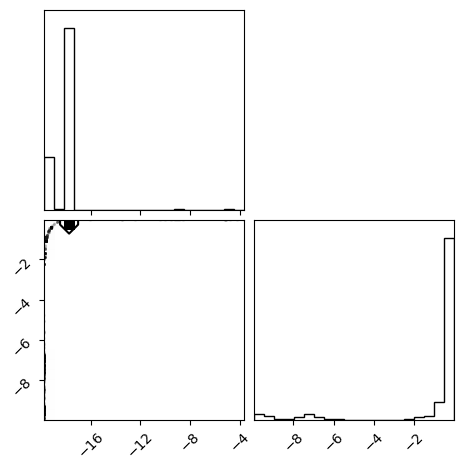

In [16]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [17]:
flat_samples

array([[-19.7580827 ,  -6.34627351],
       [-19.5961506 ,  -0.83546715],
       [-19.57529876,  -0.7903739 ],
       ...,
       [-18.01983444,  -0.02780444],
       [-18.0417457 ,  -0.02883045],
       [-18.04675602,  -0.02767996]])

In [18]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-18.028131432575222, -0.028003445941809736)

(array([2.0270e+04, 9.0100e+02, 1.0190e+03, 5.5000e+02, 6.6000e+01,
        2.5900e+02, 8.1000e+01, 9.7000e+01, 8.0390e+03, 6.8305e+04,
        1.0000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 2.7000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 1.1000e+01, 1.2000e+01, 0.0000e+00,
        4.0000e+00, 3.9000e+01, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.3000e+01, 0.0000e+00, 0.0000e+00, 3.10

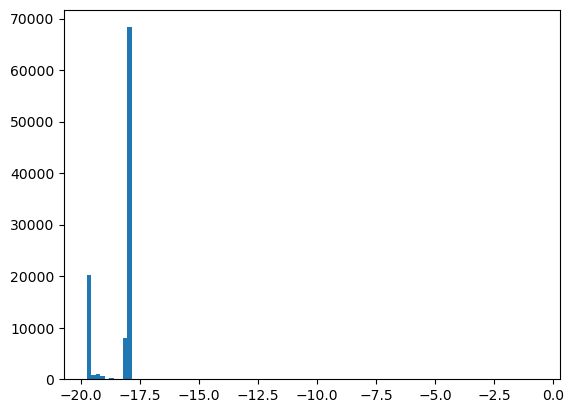

In [19]:
bins=100
plt.hist(samples[:,0], bins=bins)

(array([2.8700e+02, 5.3000e+01, 9.3900e+02, 5.7800e+02, 7.2000e+02,
        9.3100e+02, 7.1800e+02, 5.3000e+01, 2.4000e+01, 0.0000e+00,
        8.8000e+01, 3.3000e+01, 3.3000e+01, 6.0000e+01, 1.5000e+02,
        1.0800e+02, 7.9000e+01, 2.0000e+01, 4.2000e+01, 7.0000e+01,
        1.9100e+02, 8.3000e+01, 1.9200e+02, 4.3800e+02, 2.9100e+02,
        4.2000e+02, 4.0200e+02, 4.8700e+02, 3.4000e+01, 1.0140e+03,
        4.9800e+02, 4.3600e+02, 3.4400e+02, 4.1000e+01, 1.6000e+01,
        2.0000e+01, 6.0000e+00, 4.7000e+01, 3.2000e+01, 1.7000e+01,
        1.7000e+01, 1.9000e+01, 2.1000e+01, 6.0000e+01, 7.0000e+00,
        2.6000e+01, 1.0000e+00, 0.0000e+00, 5.0000e+00, 4.1000e+01,
        3.0000e+00, 1.0000e+00, 2.3000e+01, 1.3000e+01, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 9.0000e+00,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 2.00

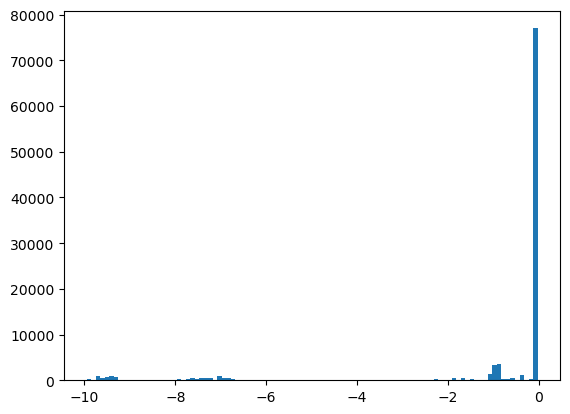

In [20]:
bins=100
plt.hist(samples[:,1], bins=bins)